# **EDA**

### Realizaremos un `E`xploratory `D`ata `A`nalysis (`EDA`) sobre los datos de interés para examinarlos con más en detalle

---

In [463]:
# Librerias a utilizar
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

---

#### Datos globales de terremotos de 1970 a 2023 :

##### `Diccionario de datos`

+    index: Un identificador único para cada fila en el DataFrame.
+    mag: La magnitud del terremoto en la escala de Richter.
+    place: La ubicación geográfica del terremoto.
+    felt: La cantidad de personas que reportaron haber sentido el terremoto.
+    cdi: La intensidad del terremoto según la escala de Intensidad de Daño Comunitario (CDI, por sus siglas en inglés).
+    mmi: La intensidad del terremoto según la escala de Intensidad de Mercalli Modificada (MMI, por sus siglas en inglés).
+    tsunami: Un valor binario que indica si el terremoto produjo un tsunami o no.
+    sig: La significancia del terremoto en función de su magnitud y distancia.
+    net: La red sismológica que registró el terremoto.
+    code: Un código identificador único para cada terremoto.
+    types: Los tipos de datos que se proporcionan para el terremoto.
+    nst: El número de estaciones que registraron el terremoto.
+    dmin: La distancia mínima a la fuente del terremoto.
+    rms: La amplitud máxima de las ondas sísmicas registradas.
+    gap: El ángulo entre las estaciones más lejanas que registraron el terremoto.
+    magType: El tipo de magnitud reportado para el terremoto.
+    type: El tipo de evento sísmico, que en este caso siempre será un terremoto.
+    year: El año en que ocurrió el terremoto.
+    month: El mes en que ocurrió el terremoto.


In [464]:
# Ingestamos el archivo parquet
df_global = pd.read_parquet("Datasets/Usa_Jap_Mex/terremotos_global.parquet")
# Observamos
df_global.sample(3)

index  mag                                  place  felt  cdi  mmi  \
135760  136440  4.3  53 km NNE of Savannah Bight, Honduras   NaN  NaN  NaN   
18604    18795  4.6     108 km SE of Karakenja, Tajikistan   NaN  NaN  NaN   
293993  294685  4.7               268 km E of Iwaki, Japan   NaN  NaN  NaN   

        tsunami  sig net      code                            types   nst  \
135760        0  284  us  p00084w3              ,origin,phase-data,   NaN   
18604         0  326  us  p0000mvs                         ,origin,   NaN   
293993        0  340  us  p000j72a  ,impact-text,origin,phase-data,  88.0   

        dmin   rms    gap magType        type  year  month  
135760   NaN  0.98    NaN      mb  earthquake  1997      7  
18604    NaN   NaN    NaN      mb  earthquake  1977      3  
293993   NaN  1.09  119.2      mb  earthquake  2011      8

In [465]:
# Observamos más en detalle
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461048 entries, 0 to 461047
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   index    461048 non-null  int64  
 1   mag      461048 non-null  float64
 2   place    459651 non-null  object 
 3   felt     38695 non-null   float64
 4   cdi      38695 non-null   float64
 5   mmi      18467 non-null   float64
 6   tsunami  461048 non-null  int64  
 7   sig      461048 non-null  int64  
 8   net      461048 non-null  object 
 9   code     461048 non-null  object 
 10  types    461048 non-null  object 
 11  nst      176184 non-null  float64
 12  dmin     140595 non-null  float64
 13  rms      406035 non-null  float64
 14  gap      273486 non-null  float64
 15  magType  461039 non-null  object 
 16  type     461048 non-null  object 
 17  year     461048 non-null  int64  
 18  month    461048 non-null  int64  
dtypes: float64(8), int64(5), object(6)
memory usage: 66.8+ MB


In [466]:
# Observamos el comportamiento de las variables numéricas
df_global.describe()

index            mag           felt           cdi  \
count  461048.000000  461048.000000   38695.000000  38695.000000   
mean   231165.300986       4.597782      78.442434      2.547202   
std    133204.071489       0.460669    1273.392820      1.728197   
min         1.000000       3.380000       0.000000      0.000000   
25%    115927.750000       4.300000       0.000000      1.000000   
50%    231212.500000       4.500000       1.000000      2.000000   
75%    346481.250000       4.800000       6.000000      3.800000   
max    461818.000000       9.100000  131619.000000      9.100000   

                mmi        tsunami            sig            nst  \
count  18467.000000  461048.000000  461048.000000  176184.000000   
mean       4.598284       0.003106     329.856902      55.702805   
std        1.739744       0.055645      76.968319      76.758335   
min        0.000000       0.000000     176.000000       0.000000   
25%        3.840000       0.000000     284.000000      16.000000   
50%        4.672000       0.000000     312.000000      28.000000   
75%        5.804500       0.000000     354.000000      60.000000   
max       10.000000       1.000000    2910.000000     929.000000   

                dmin            rms            gap           year  \
count  140595.000000  406035.000000  273486.000000  461048.000000   
mean        3.874431       0.920468     112.482951    2003.801431   
std         5.063592       0.338663      53.122950      13.416054   
min         0.000000      -1.000000       0.000000    1970.000000   
25%         1.157000       0.730000      73.000000    1995.000000   
50%         2.393000       0.920000     108.000000    2006.000000   
75%         4.495000       1.100000     142.000000    2015.000000   
max        64.498000      69.320000     360.000000    2023.000000   

               month  
count  461048.000000  
mean        6.484184  
std         3.457315  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%        10.000000  
max        12.000000

<AxesSubplot: >

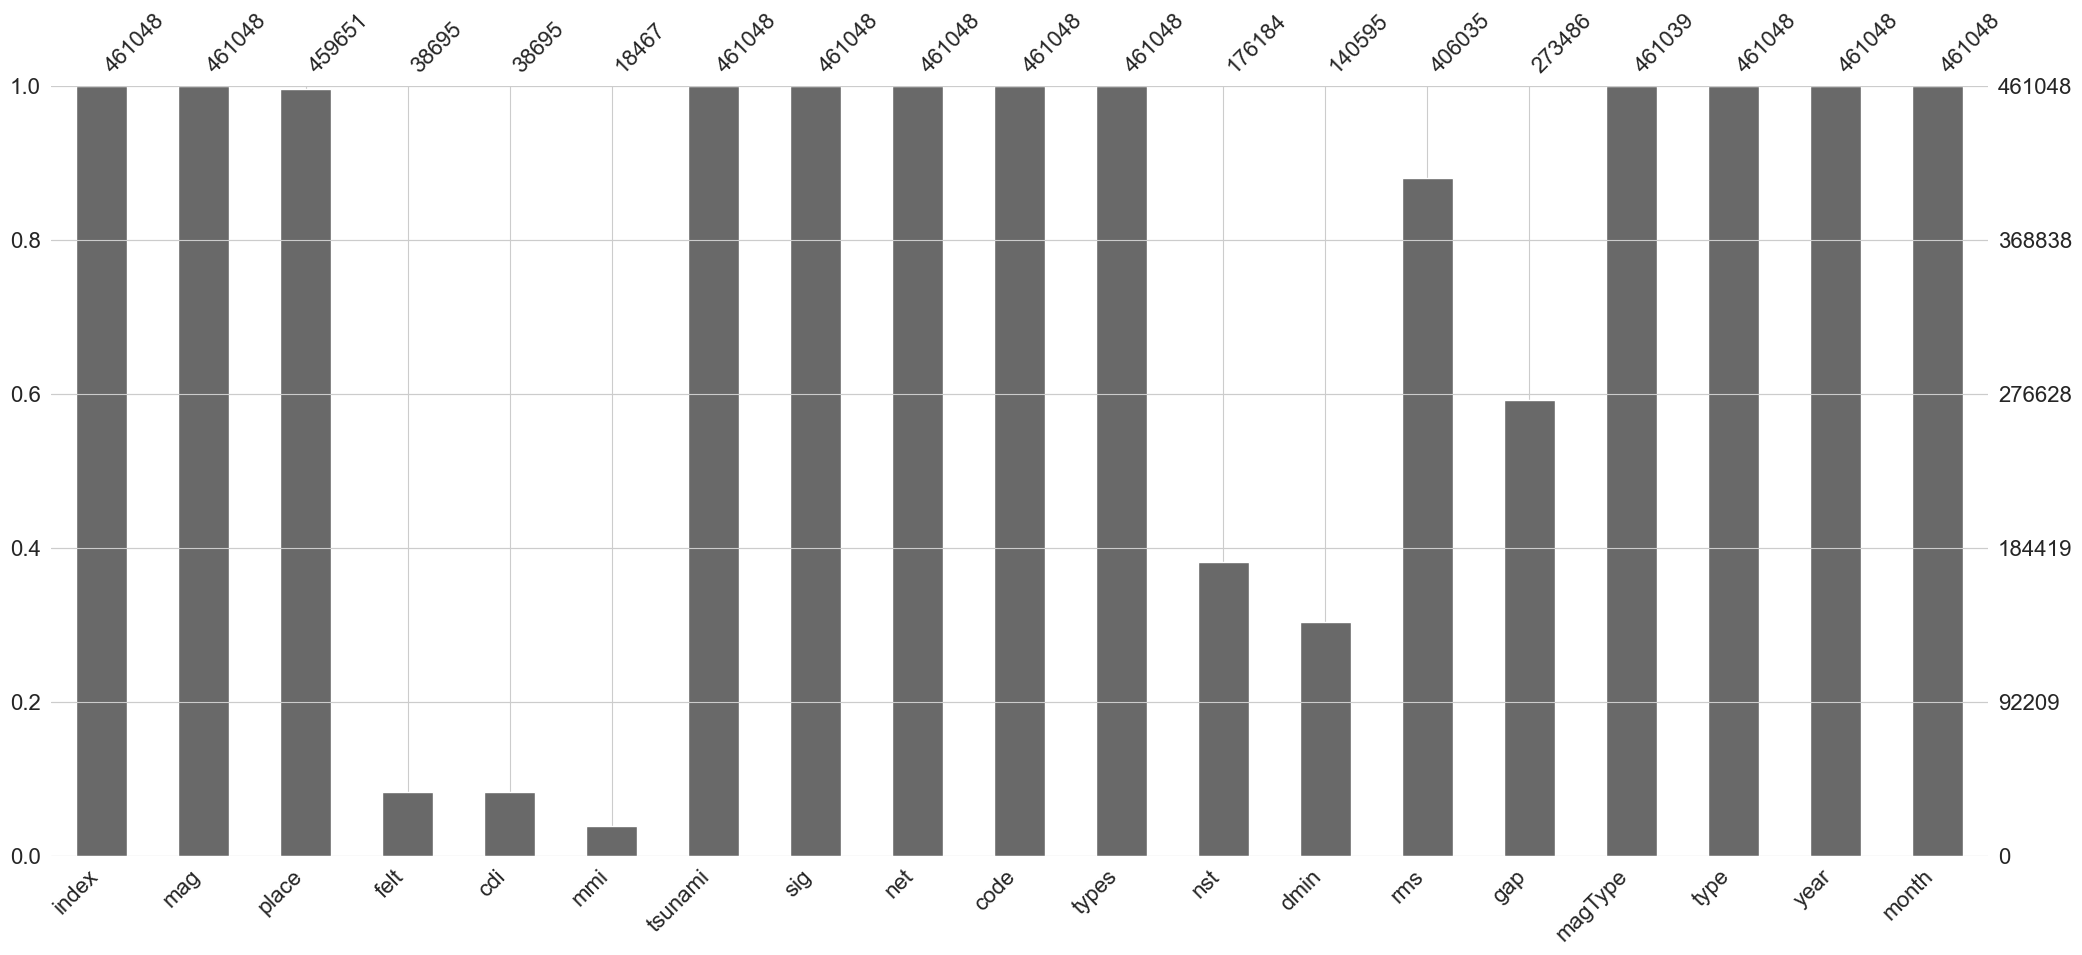

In [467]:
# Observemos los valores faltantes por columna
msno.bar(df_global)
# Se puede observar que hay columnas con demasiados valores faltantes

In [468]:
# Observamos si hay valores duplicados
df_global.duplicated().sum()

0

In [469]:
# Observamos los años con mas registros 
df_global["year"].value_counts().sort_values(ascending=False).head()

2014    16973
2021    16732
2011    15408
2005    15203
2022    15193
Name: year, dtype: int64

In [470]:
# Observamos el porcentaje de tsunamis en base al total (0 es negativo, 1 positivo)
df_global["tsunami"].value_counts(normalize=True) * 100

0    99.689403
1     0.310597
Name: tsunami, dtype: float64

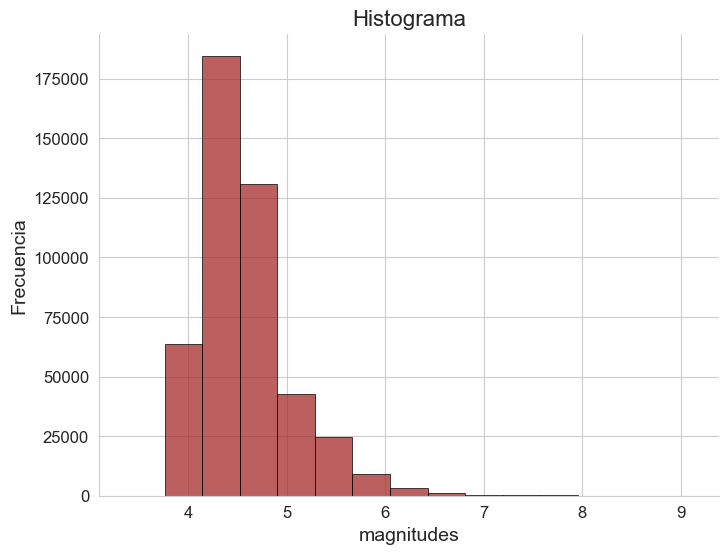

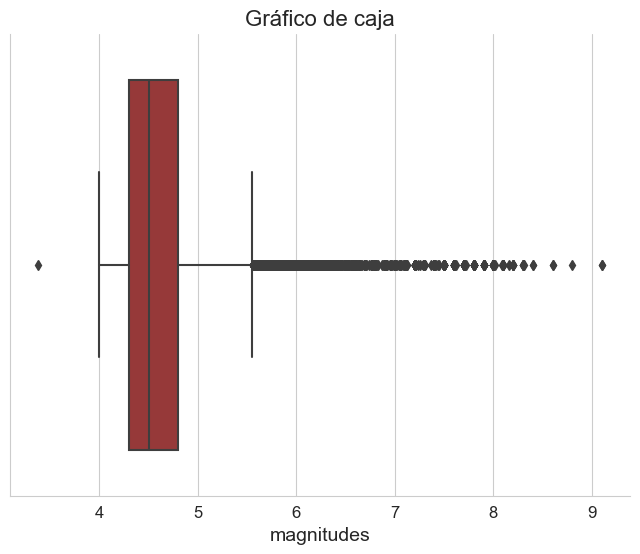

In [471]:
# Histograma de las magnitudes
plt.figure(figsize=(8,6))
sns.histplot(df_global["mag"] ,bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("magnitudes", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_global["mag"], color="brown")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("magnitudes", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

# Se pueden observar numerosos valores atípicos, lo cual en este caso es normal

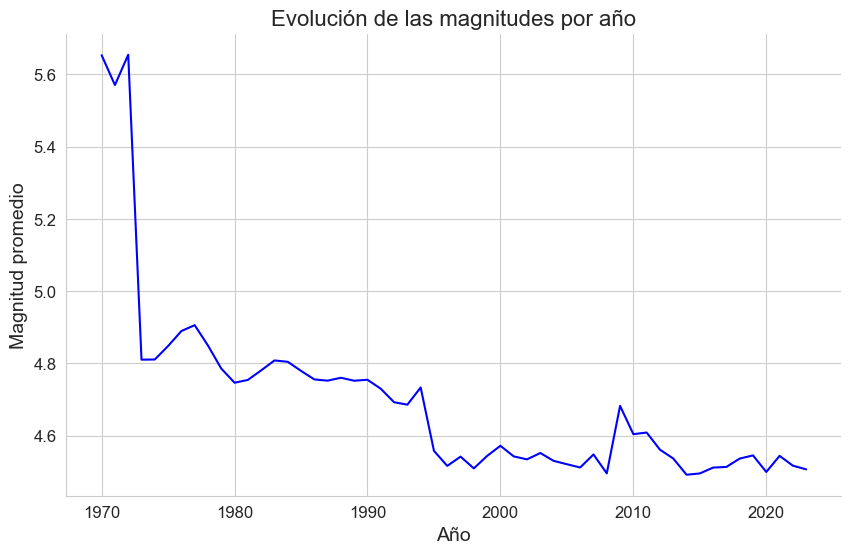

In [472]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped = df_global.groupby('year')['mag'].mean()

# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, color='blue')

# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Magnitud promedio', fontsize=14)
plt.title('Evolución de las magnitudes por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Podemos observar la evolución de las magnitudes en funcion del año

---

# USA

##### Observaremos los mismos datos anteriores, pero centrados en Estados Unidos

In [473]:
# Ingestamos el archivo json
df_usa = pd.read_json("Datasets/Usa_Jap_Mex/Usa.json")
# Observamos
df_usa

idCountry  year  month           location                  distance  \
0              1  1975      6            Alabama       3 km NNW of Fayette   
1              1  1997     10            Alabama     15 km NNW of Flomaton   
2              1  2003      4            Alabama     8 km S of Valley Head   
3              1  2004     11            Alabama        4 km W of Forkland   
4              1  1970      1   Aleutian Islands               Rat Islands   
...          ...   ...    ...                ...                       ...   
22351          1  2013      9            Wyoming  20 km W of Fort Washakie   
22352          1  2014      3            Wyoming        22 km S of Mammoth   
22353          1  2016      2            Wyoming         23 km SE of Kelly   
22354          1  2016      8            Wyoming     4 km ENE of Bondurant   
22355          1  2017     11            Wyoming      57 km S of Ten Sleep   

                                                   types      code   mag  \
0                       ,origin,shakemap,trump-shakemap,  p0000brg  4.50   
1      ,impact-text,origin,phase-data,shakemap,trump-...  p00089hq  4.80   
2      ,associate,dyfi,focal-mechanism,impact-text,lo...    605341  4.60   
3      ,associate,dyfi,impact-text,moment-tensor,orig...  p000d7vw  4.30   
4                      ,impact-text,origin,trump-origin,    800290  5.73   
...                                                  ...       ...   ...   
22351  ,dyfi,losspager,moment-tensor,origin,phase-dat...  b000jx4l  4.80   
22352  ,cap,dyfi,general-link,general-text,losspager,...  60061837  4.83   
22353  ,cap,dyfi,impact-text,losspager,moment-tensor,...  10004t1f  4.00   
22354  ,cap,dyfi,impact-text,losspager,moment-tensor,...  20006umx  4.80   
22355  ,dyfi,losspager,moment-tensor,origin,phase-dat...  2000bi6d  4.00   

          felt  cdi    mmi  tsunami  sig     net   nst     dmin   rms    gap  \
0          NaN  NaN  5.447        0  312      us   NaN      NaN   NaN    NaN   
1          NaN  NaN  6.012        0  354      us   NaN      NaN  0.98    NaN   
2      17204.0  6.0  4.987        0  926      se  21.0      NaN  0.07  154.0   
3         85.0  5.0    NaN        0  327      us  61.0      NaN  0.90   78.9   
4          NaN  NaN    NaN        0  505  iscgem   NaN      NaN   NaN    NaN   
...        ...  ...    ...      ...  ...     ...   ...      ...   ...    ...   
22351    116.0  4.3  3.570        0  404      us   NaN  0.37800  1.08   16.0   
22352     22.0  2.9  5.570        0  700      uu  35.0  0.04763  0.25   63.0   
22353    153.0  3.4  4.370        0  298      us   NaN  0.19500  1.16   18.0   
22354    578.0  3.9  4.640        0  580      us   NaN  0.37300  1.14    7.0   
22355     58.0  4.1  3.130        0  270      us   NaN  1.07400  0.74   63.0   

      magType  
0          mb  
1          mb  
2          mw  
3         mwr  
4          mw  
...       ...  
22351     mwr  
22352      mw  
22353     mwr  
22354     mwr  
22355     mwr  

[22356 rows x 19 columns]

In [474]:
# Observamos en detalle
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22356 entries, 0 to 22355
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idCountry  22356 non-null  int64  
 1   year       22356 non-null  int64  
 2   month      22356 non-null  int64  
 3   location   21054 non-null  object 
 4   distance   22356 non-null  object 
 5   types      22356 non-null  object 
 6   code       22356 non-null  object 
 7   mag        22356 non-null  float64
 8   felt       2659 non-null   float64
 9   cdi        2659 non-null   float64
 10  mmi        2719 non-null   float64
 11  tsunami    22356 non-null  int64  
 12  sig        22356 non-null  int64  
 13  net        22356 non-null  object 
 14  nst        7038 non-null   float64
 15  dmin       5808 non-null   float64
 16  rms        18513 non-null  float64
 17  gap        10069 non-null  float64
 18  magType    22354 non-null  object 
dtypes: float64(8), int64(5), object(6)
memory usag

In [475]:
# Observamos las variables numéricas
df_usa.describe()

idCountry          year         month           mag           felt  \
count    22356.0  22356.000000  22356.000000  22356.000000    2659.000000   
mean         1.0   1999.487967      6.473430      4.512716     467.561113   
std          0.0     14.711042      3.399115      0.479395    3647.503574   
min          1.0   1970.000000      1.000000      3.380000       0.000000   
25%          1.0   1987.000000      4.000000      4.180000       1.000000   
50%          1.0   2000.000000      6.000000      4.400000       5.000000   
75%          1.0   2013.000000      9.000000      4.700000      80.000000   
max          1.0   2023.000000     12.000000      8.200000  131619.000000   

               cdi          mmi       tsunami           sig          nst  \
count  2659.000000  2719.000000  22356.000000  22356.000000  7038.000000   
mean      3.071455     3.887884      0.035069    324.637950    78.947712   
std       1.649557     1.532001      0.183958     96.249933   100.758224   
min       0.000000     0.000000      0.000000    176.000000     0.000000   
25%       1.000000     2.955000      0.000000    271.000000    23.000000   
50%       3.100000     3.920000      0.000000    298.000000    45.000000   
75%       4.100000     4.730000      0.000000    354.000000    90.000000   
max       9.100000     9.296000      1.000000   1870.000000   885.000000   

              dmin           rms           gap  
count  5808.000000  18513.000000  10069.000000  
mean      0.977332      0.783407    134.149752  
std       1.324885      0.415886     64.481627  
min       0.000000     -1.000000      0.000000  
25%       0.149000      0.580000     81.100000  
50%       0.597650      0.850000    134.600000  
75%       1.387000      1.030000    179.000000  
max      24.651000     17.050000    354.000000

In [476]:
# Observamos que Estado tiene mas terremotos
df_usa["location"].value_counts().head(15)

 Alaska              14854
 California           1823
 Aleutian Islands     1425
 Hawaii                630
 Oregon                604
 Washington            363
 Nevada                327
 Georgia               163
 Idaho                 153
 Mexico                139
 Montana                95
 Oklahoma               92
 Wyoming                84
 Utah                   62
 New Mexico             38
Name: location, dtype: int64

In [477]:
# Observamos la cantidad de registros por años
df_usa["year"].value_counts().sort_values(ascending = False).head(15)

1986    754
2018    743
1980    713
2020    702
1996    692
2016    669
2017    621
2003    596
2014    586
2015    582
2010    555
2002    552
2021    552
1992    485
2008    477
Name: year, dtype: int64

---

# Japón

##### Sigue manteniendo la misma estructura de datos anteriormente vista

In [478]:
# Ingestamos
df_japon = pd.read_json("Datasets/Usa_Jap_Mex/Japón.json")
# Observamos
df_japon

idCountry  year  month                                 place  \
11              2  1970      1           45 km SSW of Obihiro, Japan   
74              2  1970      2         Volcano Islands, Japan region   
101             2  1970      3               67 km NE of Naze, Japan   
119             2  1970      3            101 km WSW of Kurio, Japan   
121             2  1970      3           4 km WSW of Takanosu, Japan   
...           ...   ...    ...                                   ...   
461039          2  2023      5  75 km ESE of Katsuren-haebaru, Japan   
461040          2  2023      5              81 km SE of Taira, Japan   
461041          2  2023      5  79 km ESE of Katsuren-haebaru, Japan   
461043          2  2023      5  82 km ESE of Katsuren-haebaru, Japan   
461044          2  2023      5                 Ryukyu Islands, Japan   

                                                    types      code   mag  \
11                       ,origin,shakemap,trump-shakemap,    800254  6.40   
74                                               ,origin,    799066  5.53   
101                                              ,origin,    798599  5.54   
119                                              ,origin,    798320  5.70   
121                                     ,origin,shakemap,    798303  5.70   
...                                                   ...       ...   ...   
461039                                ,origin,phase-data,  7000jxal  5.10   
461040                                ,origin,phase-data,  7000jxaj  5.00   
461041  ,dyfi,internal-moment-tensor,internal-origin,l...  7000jxag  5.90   
461043  ,dyfi,internal-moment-tensor,moment-tensor,ori...  7000jxaa  5.30   
461044                                ,origin,phase-data,  7000jxab  5.10   

        felt  cdi    mmi  tsunami  sig     net   nst   dmin   rms   gap  \
11       NaN  NaN  6.419        0  630  iscgem   NaN    NaN   NaN   NaN   
74       NaN  NaN    NaN        0  470  iscgem   NaN    NaN   NaN   NaN   
101      NaN  NaN    NaN        0  472  iscgem   NaN    NaN   NaN   NaN   
119      NaN  NaN    NaN        0  500  iscgem   NaN    NaN   NaN   NaN   
121      NaN  NaN  3.951        0  500  iscgem   NaN    NaN   NaN   NaN   
...      ...  ...    ...      ...  ...     ...   ...    ...   ...   ...   
461039   NaN  NaN    NaN        0  400      us  58.0  0.883  0.99  79.0   
461040   NaN  NaN    NaN        0  385      us  44.0  0.845  0.95  78.0   
461041  10.0  3.1  3.841        0  539      us  76.0  0.871  0.75  57.0   
461043   2.0  2.7    NaN        0  433      us  74.0  0.909  0.83  64.0   
461044   NaN  NaN    NaN        0  400      us  77.0  0.888  1.17  64.0   

       magType  
11          mw  
74          mw  
101         mw  
119         mw  
121         mw  
...        ...  
461039     mww  
461040      mb  
461041     mww  
461043     mww  
461044      mb  

[39841 rows x 18 columns]

In [479]:
df_japon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39841 entries, 11 to 461044
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idCountry  39841 non-null  int64  
 1   year       39841 non-null  int64  
 2   month      39841 non-null  int64  
 3   place      39841 non-null  object 
 4   types      39841 non-null  object 
 5   code       39841 non-null  object 
 6   mag        39841 non-null  float64
 7   felt       3510 non-null   float64
 8   cdi        3510 non-null   float64
 9   mmi        954 non-null    float64
 10  tsunami    39841 non-null  int64  
 11  sig        39841 non-null  int64  
 12  net        39841 non-null  object 
 13  nst        17950 non-null  float64
 14  dmin       10278 non-null  float64
 15  rms        36538 non-null  float64
 16  gap        24855 non-null  float64
 17  magType    39841 non-null  object 
dtypes: float64(8), int64(5), object(5)
memory usage: 5.8+ MB


In [480]:
df_japon.describe()

idCountry          year         month           mag         felt  \
count    39841.0  39841.000000  39841.000000  39841.000000  3510.000000   
mean         2.0   2003.943300      6.328230      4.582358    19.115670   
std          0.0     13.116885      3.417468      0.429150   109.825265   
min          2.0   1970.000000      1.000000      4.000000     0.000000   
25%          2.0   1995.000000      3.000000      4.300000     0.000000   
50%          2.0   2008.000000      6.000000      4.500000     2.000000   
75%          2.0   2013.000000      9.000000      4.800000    10.000000   
max          2.0   2023.000000     12.000000      9.100000  5680.000000   

               cdi         mmi       tsunami           sig           nst  \
count  3510.000000  954.000000  39841.000000  39841.000000  17950.000000   
mean      2.570513    4.505371      0.000502    326.866419     68.425738   
std       1.589478    1.447937      0.022400     71.330941     90.945229   
min       0.000000    0.000000      0.000000    246.000000      4.000000   
25%       1.000000    3.836500      0.000000    284.000000     20.000000   
50%       2.500000    4.298000      0.000000    312.000000     34.000000   
75%       3.600000    5.319500      0.000000    354.000000     73.000000   
max       9.100000    9.115000      1.000000   2419.000000    929.000000   

               dmin           rms           gap  
count  10278.000000  36538.000000  24855.000000  
mean       1.977038      0.889955    114.031821  
std        1.540317      0.250568     39.387350  
min        0.028000      0.000000      8.000000  
25%        1.021250      0.720000     90.000000  
50%        1.725500      0.890000    120.000000  
75%        2.560750      1.050000    135.500000  
max       44.071000      1.940000    335.700000

In [481]:
# Observamos las ubicaciones donde mas terremotos hay
df_japon["place"].value_counts()

Bonin Islands, Japan region             3496
Izu Islands, Japan region               3395
Volcano Islands, Japan region           1819
off the east coast of Honshu, Japan      369
near the east coast of Honshu, Japan     197
                                        ... 
206 km S of Itoman, Japan                  1
89 km SE of Itoman, Japan                  1
66 km NE of Misawa, Japan                  1
200 km NW of Naze, Japan                   1
81 km SE of Taira, Japan                   1
Name: place, Length: 18008, dtype: int64

In [482]:
# Observamos los registros por año
df_japon["year"].value_counts().sort_values(ascending=False).head(15)

2011    5557
2012    1335
2022    1286
2016    1204
2014    1204
2010    1177
2015    1172
2000    1159
2021    1121
2004    1061
2005    1048
2008    1036
2013    1011
2018     959
2020     906
Name: year, dtype: int64

---

# México

In [483]:
# Ingestamos el archivo
df_mex = pd.read_json("Datasets/Usa_Jap_Mex/México.json")
# Observamos
df_mex

idCountry       Fecha      Hora                          Distancia  \
0              3  1970-02-03  23:08:50        141 km al SUR de SAN MARCOS   
1              3  1970-04-29  08:01:34    62 km al SUROESTE de CD HIDALGO   
2              3  1970-04-30  02:32:58   100 km al SUROESTE de MAPASTEPEC   
3              3  1971-09-30  02:18:00  92 km al SUROESTE de PUEBLO YAQUI   
4              3  1972-10-20  02:17:46       238 km al OESTE de CIHUATLAN   
...          ...         ...       ...                                ...   
42697          3  2023-05-08  20:30:27     9 km al SUROESTE de CD IXTEPEC   
42698          3  2023-05-08  22:24:25    17 km al SURESTE de SALINA CRUZ   
42699          3  2023-05-09  00:16:55    13 km al NOROESTE de RIO GRANDE   
42700          3  2023-05-09  03:56:09       8 km al OESTE de TEHUANTEPEC   
42701          3  2023-05-09  07:53:46    56 km al NORTE de MATIAS ROMERO   

      Estado  Latitud  Longitud  Magnitud Profundidad  
0        GRO   15.524   -99.493       6.6        21.0  
1       CHIS   14.463   -92.683       7.3        44.0  
2       CHIS   14.608   -93.260       6.5        22.0  
3        SON   26.880  -110.800       6.5        14.0  
4        JAL   18.700  -106.756       6.6        10.0  
...      ...      ...       ...       ...         ...  
42697   OAX    16.490   -95.140       4.0         2.1  
42698   OAX    16.080   -95.080       4.0        12.2  
42699   OAX    16.110   -97.500       4.2         8.9  
42700   OAX    16.340   -95.310       4.6        13.9  
42701   OAX    17.380   -95.000       4.4       129.1  

[42702 rows x 9 columns]

In [484]:
# Observamos mas en detalle
df_mex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42702 entries, 0 to 42701
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idCountry    42702 non-null  int64  
 1   Fecha        42702 non-null  object 
 2   Hora         42702 non-null  object 
 3   Distancia    42702 non-null  object 
 4   Estado       42702 non-null  object 
 5   Latitud      42702 non-null  float64
 6   Longitud     42702 non-null  float64
 7   Magnitud     42702 non-null  float64
 8   Profundidad  42702 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.3+ MB


In [485]:
# Observamos comportamiento de variables numéricas
df_mex.describe()

idCountry       Latitud      Longitud      Magnitud
count    42702.0  42702.000000  42702.000000  42702.000000
mean         3.0     17.071567    -97.663709      4.226355
std          0.0      3.621830      5.506283      0.329058
min          3.0     10.271000   -120.595000      4.000000
25%          3.0     15.279500    -99.960000      4.000000
50%          3.0     16.110000    -95.236450      4.100000
75%          3.0     17.299225    -94.107925      4.300000
max          3.0     33.265800    -85.546700      8.200000

In [486]:
# Observamos los Estados donde mas terremotos hay
df_mex["Estado"].value_counts().head(15)

 OAX      14668
 CHIS     12512
 GRO       5777
 MICH      1751
 VER       1334
 JAL       1177
 BCS       1074
 BC        1038
 SIN        554
 SON        505
 COL        461
 OAX        284
 CHIS       258
 CHIH       205
 TAB        165
Name: Estado, dtype: int64

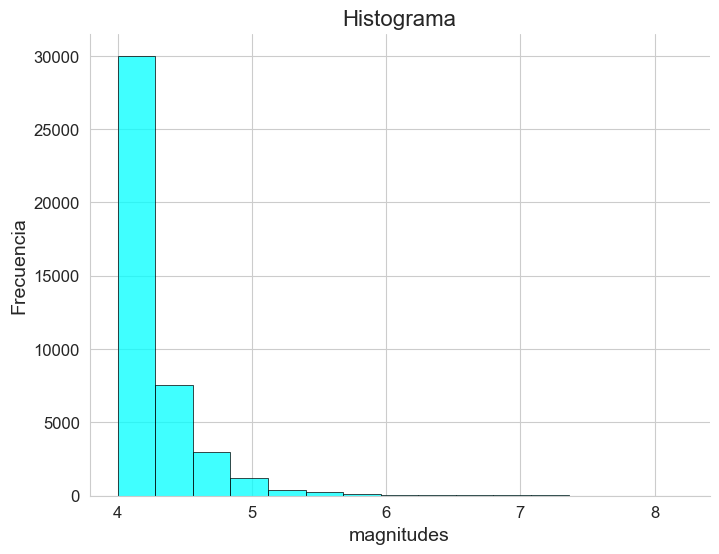

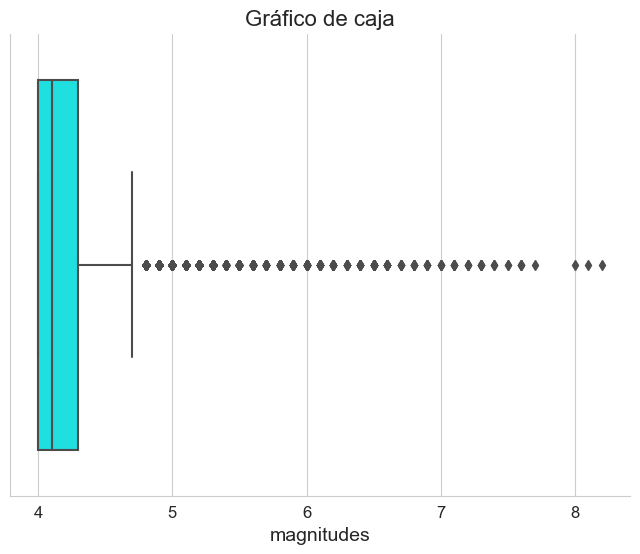

In [487]:
# Histograma de las magnitudes
plt.figure(figsize=(8,6))
sns.histplot(df_mex["Magnitud"] ,bins=15, edgecolor='black', linewidth=0.5, color = "cyan")
plt.title("Histograma", fontsize=16)
plt.xlabel("magnitudes", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Gráfico de caja de las magnitudes
plt.figure(figsize=(8,6))
sns.boxplot(x=df_mex["Magnitud"], color="cyan")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("magnitudes", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

# Se pueden observar numerosos valores atípicos, lo cual es normal en términos de magnitudes

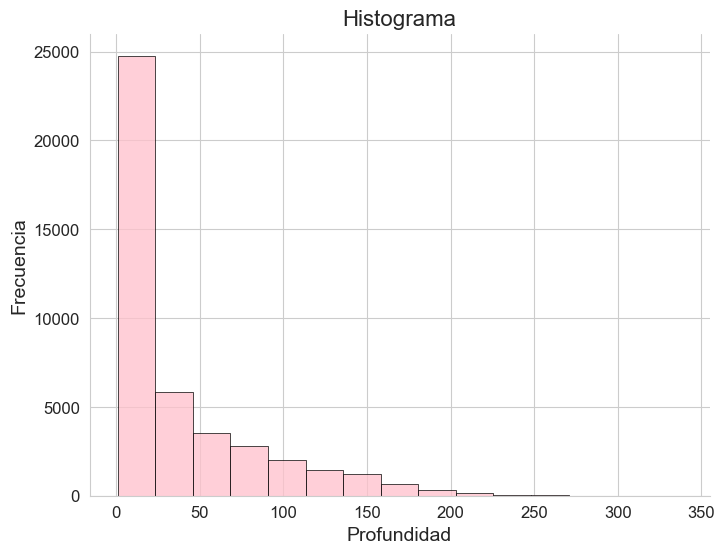

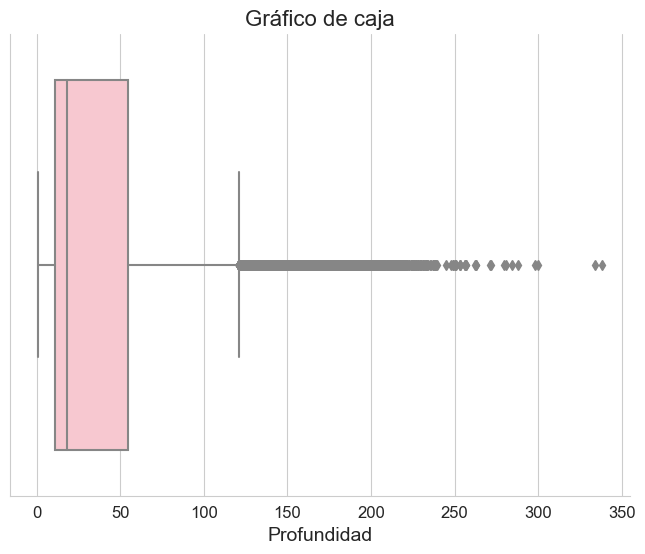

In [488]:
# Borramos los datos que no sean numéricos en "Profundidad"
df_mex = df_mex.drop(df_mex[df_mex['Profundidad'] == 'en revision'].index)
# Colocamos el tipo de dato correcto
df_mex["Profundidad"] = df_mex["Profundidad"].astype(float)


# Observamos un histograma de las profundidades
plt.figure(figsize=(8,6))
sns.histplot(df_mex["Profundidad"] ,bins=15, edgecolor='black', linewidth=0.5, color = "pink")
plt.title("Histograma", fontsize=16)
plt.xlabel("Profundidad", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# Gráfico de caja de las profundidades
plt.figure(figsize=(8,6))
sns.boxplot(x=df_mex["Profundidad"], color="pink")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("Profundidad", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

# Tambien se pueden observar numerosos valores atípicos.

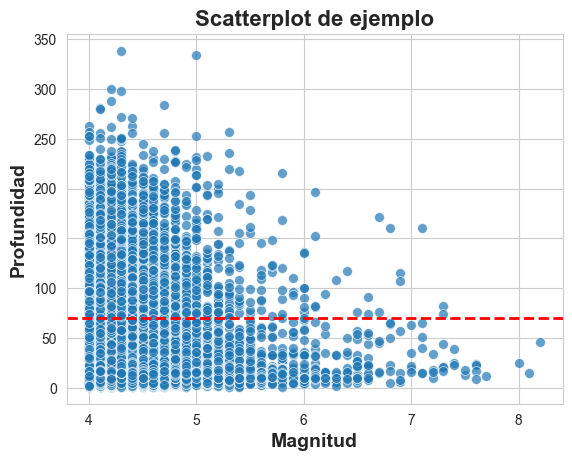

In [489]:
# Observamos un gráfico de dispersión para observar las variables "Magnitud" y "Profundidad"
x = df_mex["Magnitud"]
y = df_mex["Profundidad"]

# Creamos el scatterplot utilizando Seaborn
sns.scatterplot(x=x, y=y, s=50, alpha=0.7)

# Agregamos una línea horizontal de referencia en la profundidad de 70 km
plt.axhline(y=70, color='red', linestyle='--', linewidth=2)

# Personalizamos las etiquetas y el título
plt.xlabel("Magnitud", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Profundidad', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Scatterplot de ejemplo', fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Mostramos el gráfico
plt.show()

# Se puede observar que las magnitudes mas altas suelen tener menor profundidad. Y las mayores profundidades corresponden a magnitudes bajas.

---

# KPI 1 Aumentar la cantidad de pólizas contratadas de inmuebles
El objetivo de este KPI es aumentar la cantidad de pólizas contratadas en un 10% para viviendas que cumplan con la norma de resistencia sísmica, con respecto al año anterior que se encontraban por fuera del sistema de seguros. Objetivo: aumentar la cantidad de pólizas contratadas Indicador: 10% Plazo: anual Meta: alcanzar el 10% en un año Monitoreo: con las bases de datos que ofrecen las aseguradoras se analiza y se compara. Relevante: porque está alineado con el objetivo 2 de Implementar mecanismos de comunicación y alerta a la comunidad civil en un lenguaje intuitivamente, pues si para adquirir la póliza se exige que la vivienda tenga el cumplimiento de construcciones contra sismos se va a minimizar los daños en los edificios y la seguridad mejorará y esto puede ser asequible por internet. Para medir este KPI se requiere conocer la cantidad de pólizas adquiridas el año anterior y la cantidad de pólizas adquiridas el siguiente año.

In [490]:
# Ingestamos el archivo json (descientos seguros.json)
df_kpi1_des = pd.read_json("Datasets/KPI 1/descuentos seguros.json")

# Observamos
df_kpi1_des.sample(3)

# existe información de los años 2015 al 2021 de los Estados de Japon

Tipo de descuento  \
9   Descuento de Edificio con resistencia sismica ...   
19   Descuento de Año de construcción de la propiedad   
8   Descuento de Edificio con resistencia sismica ...   

    Cantidad de polizas nuevas  Monto Asegurado nuevo en millones de Yen  \
9                        59790                                    760162   
19                     5660128                                  54166946   
8                       427647                                   6270175   

    Primas de seguros nuevo en miles de Yenes  Cantidad de polizas vigentes  \
9                                     2623604                        156798   
19                                  213687221                      12066486   
8                                    17692529                       1152676   

    Cantidad total de seguros contratados en millones de Yen   Año  idCountry  
9                                             2048033         2020          2  
19                                          124178069         2019          2  
8                                            17111322         2020          2

In [491]:
# Observamos más en detalle
df_kpi1_des.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Tipo de descuento                                         21 non-null     object
 1   Cantidad de polizas nuevas                                21 non-null     int64 
 2   Monto Asegurado nuevo en millones de Yen                  21 non-null     int64 
 3   Primas de seguros nuevo en miles de Yenes                 21 non-null     int64 
 4   Cantidad de polizas vigentes                              21 non-null     int64 
 5   Cantidad total de seguros contratados en millones de Yen  21 non-null     int64 
 6   Año                                                       21 non-null     int64 
 7   idCountry                                                 21 non-null     int64 
dtypes: int64(7), object(1)
memory usa

In [492]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_des.describe()

Cantidad de polizas nuevas  Monto Asegurado nuevo en millones de Yen  \
count                2.100000e+01                              2.100000e+01   
mean                 1.337434e+06                              1.157396e+07   
std                  2.088693e+06                              1.875203e+07   
min                  1.046100e+04                              9.557000e+04   
25%                  2.841300e+04                              2.950980e+05   
50%                  1.036320e+05                              8.484210e+05   
75%                  2.825627e+06                              1.671133e+07   
max                  5.740396e+06                              5.457303e+07   

       Primas de seguros nuevo en miles de Yenes  \
count                               2.100000e+01   
mean                                4.740653e+07   
std                                 7.904772e+07   
min                                 6.180260e+05   
25%                                 7.693270e+05   
50%                                 3.942494e+06   
75%                                 7.886616e+07   
max                                 2.324906e+08   

       Cantidad de polizas vigentes  \
count                  2.100000e+01   
mean                   2.900016e+06   
std                    4.521618e+06   
min                    2.491500e+04   
25%                    7.645700e+04   
50%                    2.764940e+05   
75%                    6.057790e+06   
max                    1.288489e+07   

       Cantidad total de seguros contratados en millones de Yen         Año  \
count                                       2.100000e+01           21.00000   
mean                                        2.778776e+07         2020.00000   
std                                         4.518621e+07            0.83666   
min                                         2.596020e+05         2019.00000   
25%                                         8.031650e+05         2019.00000   
50%                                         2.191622e+06         2020.00000   
75%                                         4.171819e+07         2021.00000   
max                                         1.355914e+08         2021.00000   

       idCountry  
count       21.0  
mean         2.0  
std          0.0  
min          2.0  
25%          2.0  
50%          2.0  
75%          2.0  
max          2.0

<AxesSubplot: >

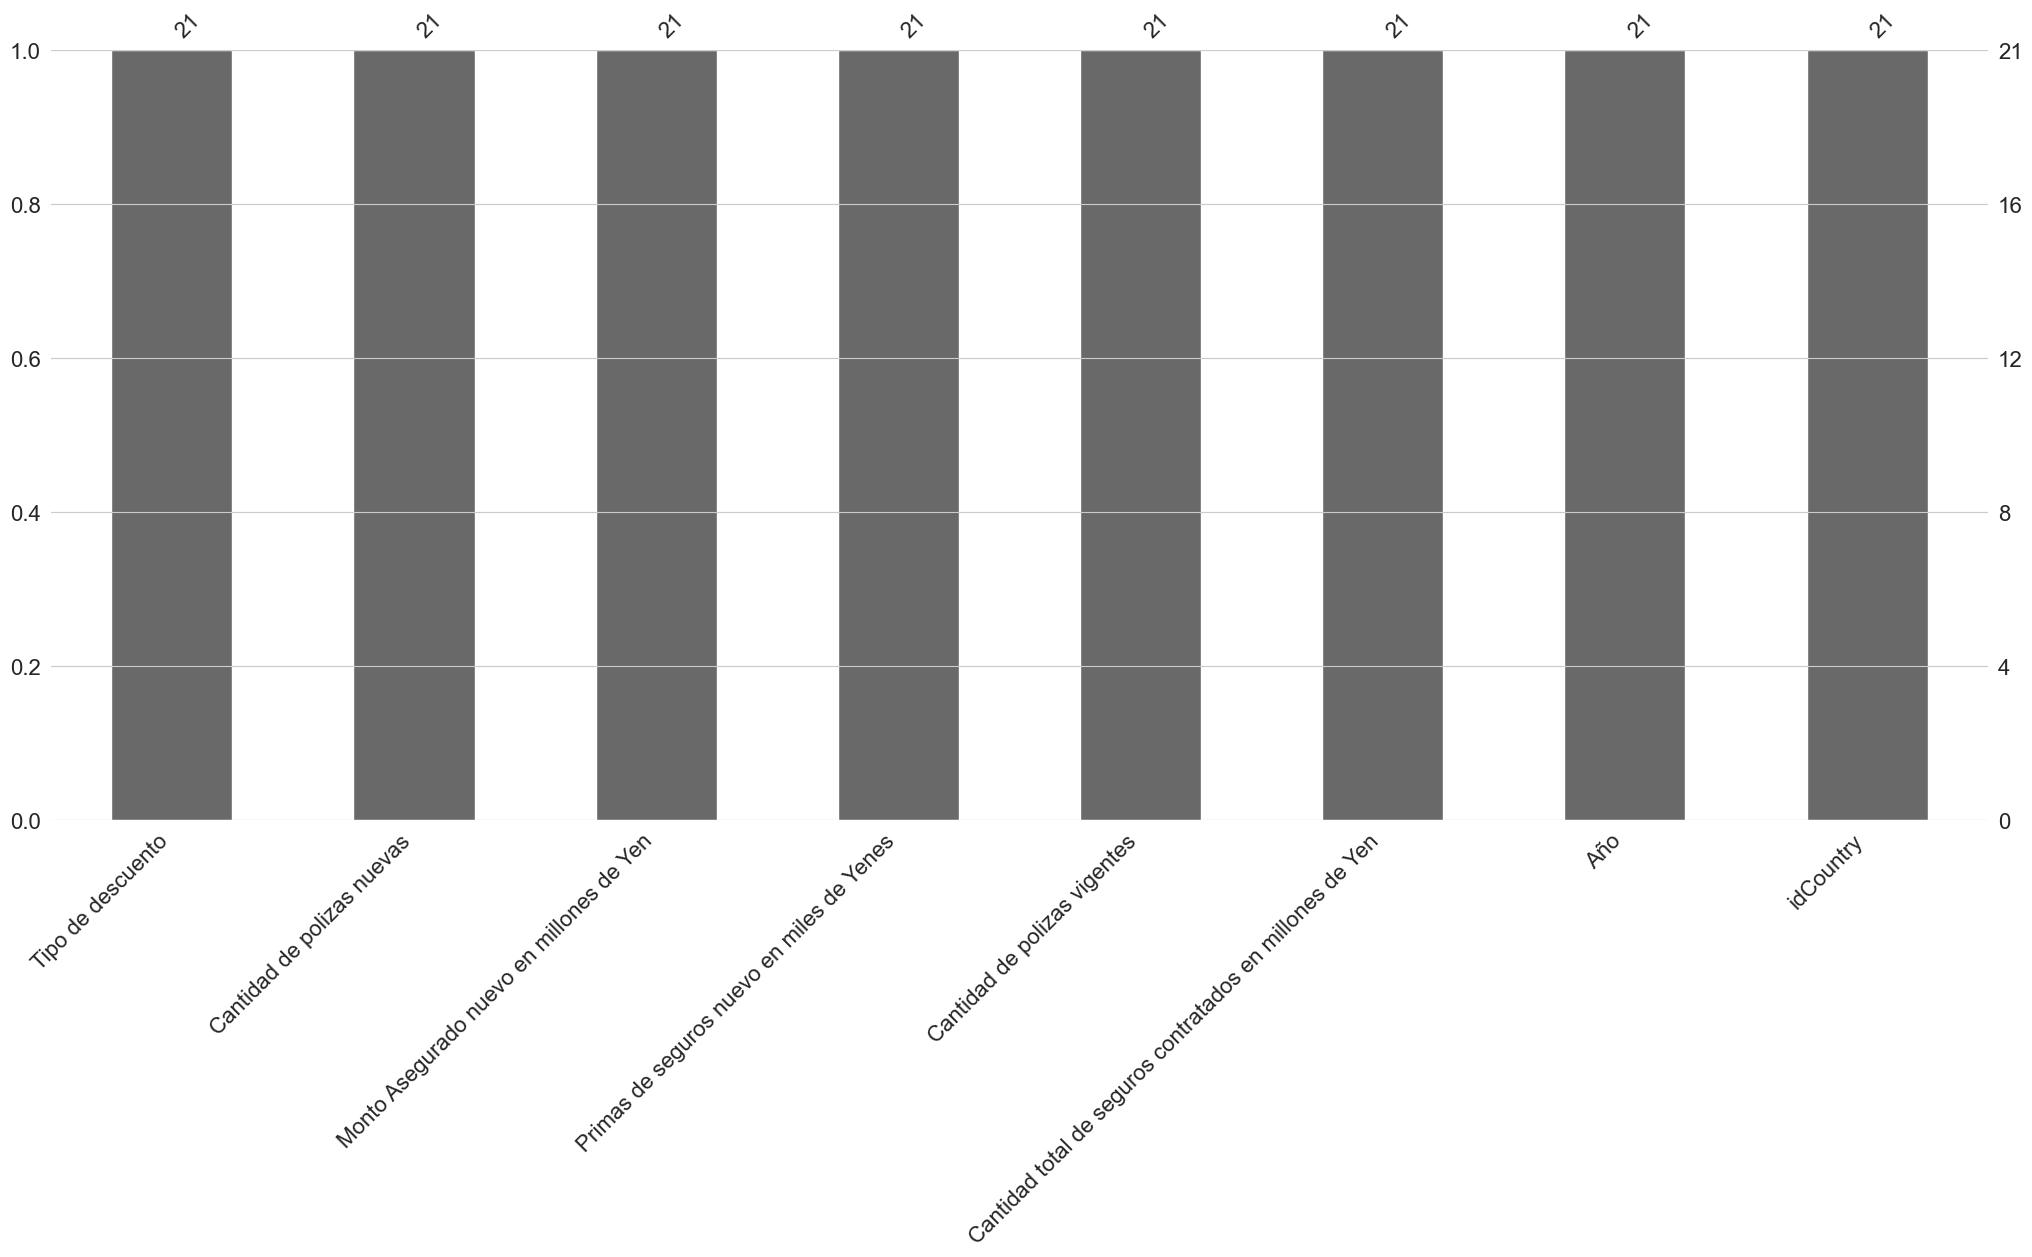

In [493]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_des)
# Se puede observar que todas las columnas tienen todos los datos

In [494]:
# Observamos si hay valores duplicados
df_kpi1_des.duplicated().sum()

0

In [495]:
#renombramos algunas columnas
df_kpi1_des = df_kpi1_des.rename(columns={"Cantidad total de seguros contratados en millones de Yen": "Monto total en millones Yen"})
df_kpi1_des = df_kpi1_des.rename(columns={"Primas de seguros nuevo en miles de Yenes": "Primas nuevas millones Yen"})


In [496]:
#descuento mas alto en cual año

# agrupar por el tipo de descuento y sumar los montos en todos los años
descuentos = df_kpi1_des.groupby('Tipo de descuento').sum()

# encontrar el año y el monto más alto de cada tipo de descuento
descuentos['Año'] = descuentos.idxmax(axis=1)

# cambiar el nombre de la columna "Monto más alto" a "Monto"
descuentos = descuentos.rename(columns={'Monto total en millones Yen': 'Monto'})

# convertir la columna "Monto" a numérica
#descuentos['Monto'] = pd.to_numeric(descuentos['Monto'], errors='coerce')

# imprimir los resultados
print(descuentos[['Año', 'Monto']])

                                                                           Año  \
Tipo de descuento                                                                
Descuento de Año de construcción de la propiedad    Primas nuevas millones Yen   
Descuento de Edificio con aislamiento Sismico       Primas nuevas millones Yen   
Descuento de Edificio con resistencia sismica B...  Primas nuevas millones Yen   
Descuento de Edificio con resistencia sismica a...  Primas nuevas millones Yen   
Descuento de Edificio con resistencia sismica m...  Primas nuevas millones Yen   
Descuento de En diagnostico de resistencia sismica  Primas nuevas millones Yen   
Sin Descuento (sin reducción de precio)             Primas nuevas millones Yen   

                                                        Monto  
Tipo de descuento                                              
Descuento de Año de construcción de la propiedad    390263111  
Descuento de Edificio con aislamiento Sismico         2185622  
Descu

In [497]:
df_kpi1_des.info

<bound method DataFrame.info of                                     Tipo de descuento  \
0       Descuento de Edificio con aislamiento Sismico   
1   Descuento de Edificio con resistencia sismica ...   
2   Descuento de Edificio con resistencia sismica ...   
3   Descuento de Edificio con resistencia sismica ...   
4   Descuento de En diagnostico de resistencia sis...   
5    Descuento de Año de construcción de la propiedad   
6             Sin Descuento (sin reducción de precio)   
7       Descuento de Edificio con aislamiento Sismico   
8   Descuento de Edificio con resistencia sismica ...   
9   Descuento de Edificio con resistencia sismica ...   
10  Descuento de Edificio con resistencia sismica ...   
11  Descuento de En diagnostico de resistencia sis...   
12   Descuento de Año de construcción de la propiedad   
13            Sin Descuento (sin reducción de precio)   
14      Descuento de Edificio con aislamiento Sismico   
15  Descuento de Edificio con resistencia sismica ...   

In [498]:
# Agrupamos los datos por año y calculamos la media de las primas
df_grouped_des = df_kpi1_des.groupby('Año')['Primas nuevas millones Yen'].mean()
print(df_grouped_des)
# la media crecio mucho mas del 2019 al 2020 y aunque crecio en 2021 no crecio con la misma intensidad que el 2019 al 2020

Año
2019    4.547773e+07
2020    4.804473e+07
2021    4.869712e+07
Name: Primas nuevas millones Yen, dtype: float64


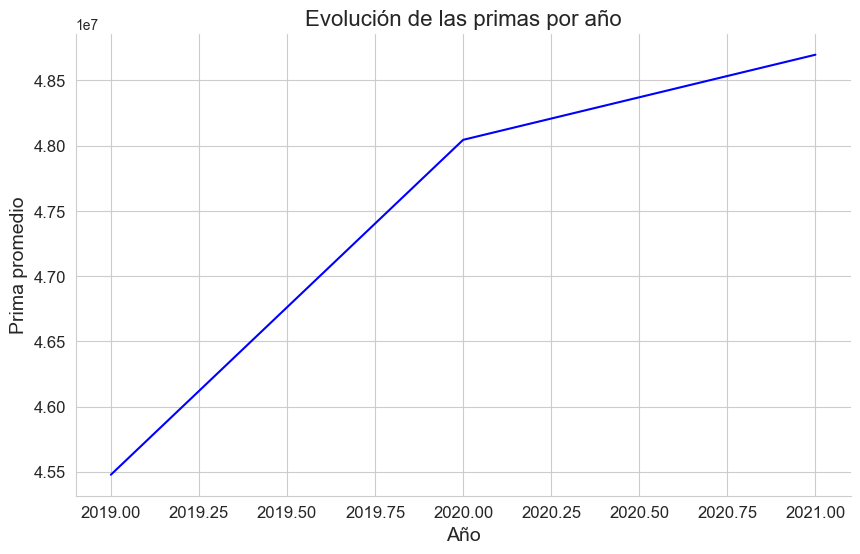

In [499]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_des, color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Prima promedio', fontsize=14)
plt.title('Evolución de las primas por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

In [500]:
# Analizamos el archivo de monto asegurado
# Ingestamos el archivo json
df_kpi1_monto = pd.read_json("Datasets/KPI 1/monto asegurado.json")
# Observamos
df_kpi1_monto.sample(3)

Año Fiscal  Cantidad de polizas emitidas  Valor Total de montos asegurados  \
3        2018                      19005841                         176604126   
0        2015                      16941425                         150272904   
5        2020                      20355462                         195021847   

   idCountry  
3          2  
0          2  
5          2

In [501]:
# Observamos más en detalle
df_kpi1_monto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Año Fiscal                        7 non-null      int64
 1   Cantidad de polizas emitidas      7 non-null      int64
 2   Valor Total de montos asegurados  7 non-null      int64
 3   idCountry                         7 non-null      int64
dtypes: int64(4)
memory usage: 280.0 bytes


In [502]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_monto.describe()

Año Fiscal  Cantidad de polizas emitidas  \
count     7.000000                  7.000000e+00   
mean   2018.000000                  1.897405e+07   
std       2.160247                  1.418998e+06   
min    2015.000000                  1.694142e+07   
25%    2016.500000                  1.798536e+07   
50%    2018.000000                  1.900584e+07   
75%    2019.500000                  2.004813e+07   
max    2021.000000                  2.080407e+07   

       Valor Total de montos asegurados  idCountry  
count                      7.000000e+00        7.0  
mean                       1.767289e+08        2.0  
std                        1.901017e+07        0.0  
min                        1.502729e+08        2.0  
25%                        1.633413e+08        2.0  
50%                        1.766041e+08        2.0  
75%                        1.905637e+08        2.0  
max                        2.024155e+08        2.0

<AxesSubplot: >

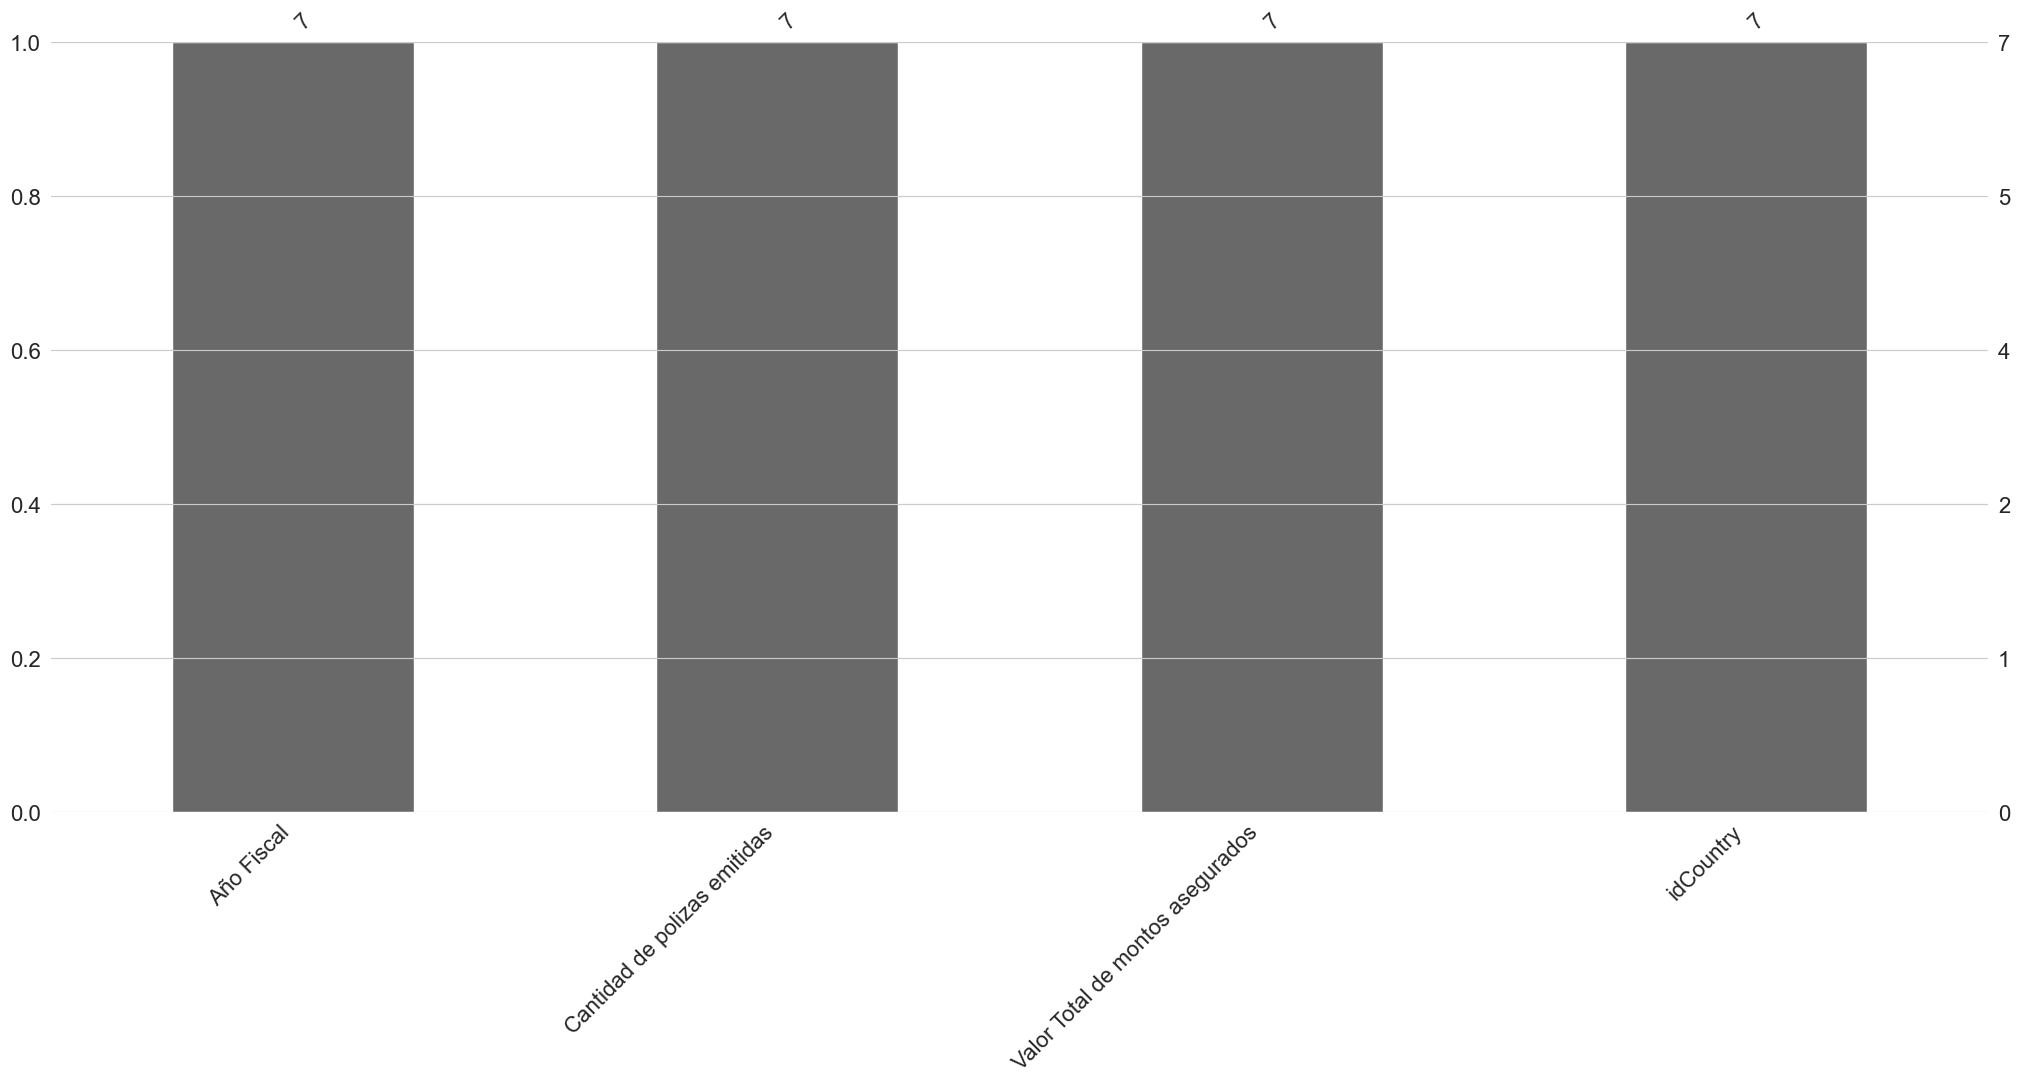

In [503]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_monto)

In [504]:
# estan completos todos los datos

# Observamos si hay valores duplicados
df_kpi1_monto.duplicated().sum()

0

In [505]:
# No hay duplicados

# Agrupar por año y sumar las cantidades de pólizas emitidas
polizas_por_anio = df_kpi1_monto.groupby('Año Fiscal')['Cantidad de polizas emitidas'].sum()

# Obtener el año con más cantidad de pólizas emitidas
anio_max_polizas = polizas_por_anio.idxmax()

print("El año con más cantidad de pólizas emitidas es:", anio_max_polizas)

El año con más cantidad de pólizas emitidas es: 2021


In [506]:
# Agrupar por año y sumar las cantidades de pólizas emitidas
monto_por_anio = df_kpi1_monto.groupby('Año Fiscal')['Valor Total de montos asegurados'].sum()

# Obtener el año con más cantidad de pólizas emitidas
anio_max_monto = monto_por_anio.idxmax()

print("El año con más monto en pólizas es:", anio_max_monto)

El año con más monto en pólizas es: 2021


In [507]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped_monto = df_kpi1_monto.groupby('Año Fiscal')['Valor Total de montos asegurados'].mean()
print(df_grouped_monto)

Año Fiscal
2015    150272904.0
2016    159628458.0
2017    167054068.0
2018    176604126.0
2019    186105521.0
2020    195021847.0
2021    202415533.0
Name: Valor Total de montos asegurados, dtype: float64


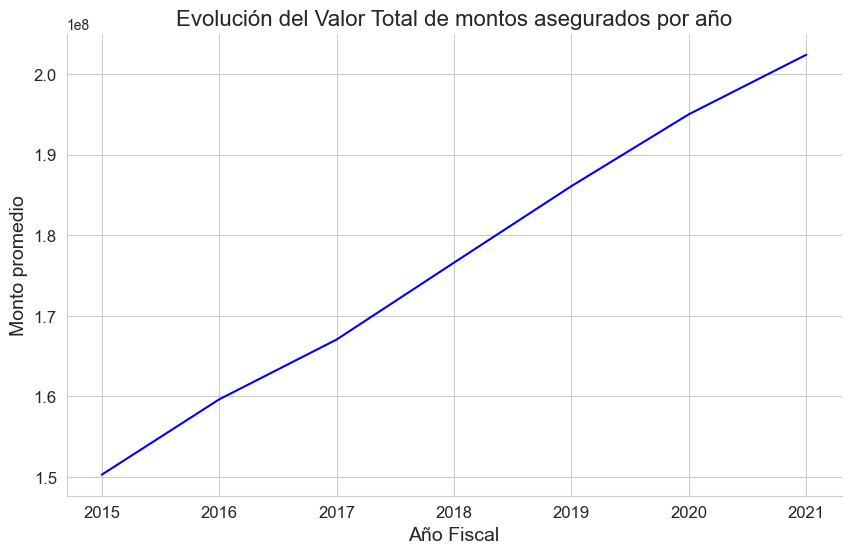

In [508]:
#Se observa que el monto asegurado ha crecido con los años

# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_monto, color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año Fiscal', fontsize=14)
plt.ylabel('Monto promedio', fontsize=14)
plt.title('Evolución del Valor Total de montos asegurados por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

In [509]:
# se observa un crecimiento constante

In [510]:
# Analizamos el archivo de nuevas polizas
# Ingestamos el archivo json
df_kpi1_nuevas = pd.read_json("Datasets/KPI 1/nuevas polizas.json")
# Observamos
df_kpi1_nuevas.sample(3)

Año  Numero de polizas en vigencia  Suma Asegurada  \
3  2018                        9308162        79432981   
0  2015                        9501454        79535689   
6  2021                        9015086        77648023   

   Primas de Polizas pagadas en miles de yenes  idCountry  
3                                    297305589          2  
0                                    245480878          2  
6                                    340879821          2

In [511]:
# Observamos más en detalle
df_kpi1_nuevas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Año                                          7 non-null      int64
 1   Numero de polizas en vigencia                7 non-null      int64
 2   Suma Asegurada                               7 non-null      int64
 3   Primas de Polizas pagadas en miles de yenes  7 non-null      int64
 4   idCountry                                    7 non-null      int64
dtypes: int64(5)
memory usage: 336.0 bytes


In [512]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_nuevas.describe()

Año  Numero de polizas en vigencia  Suma Asegurada  \
count     7.000000                   7.000000e+00    7.000000e+00   
mean   2018.000000                   9.305175e+06    7.915305e+07   
std       2.160247                   2.456344e+05    2.931130e+06   
min    2015.000000                   8.941885e+06    7.457131e+07   
25%    2016.500000                   9.156849e+06    7.756315e+07   
50%    2018.000000                   9.308162e+06    7.943298e+07   
75%    2019.500000                   9.506245e+06    8.102931e+07   
max    2021.000000                   9.559989e+06    8.288212e+07   

       Primas de Polizas pagadas en miles de yenes  idCountry  
count                                 7.000000e+00        7.0  
mean                                  2.934067e+08        2.0  
std                                   3.998954e+07        0.0  
min                                   2.454809e+08        2.0  
25%                                   2.577618e+08        2.0  
50%                                   2.973056e+08        2.0  
75%                                   3.273286e+08        2.0  
max                                   3.408798e+08        2.0

<AxesSubplot: >

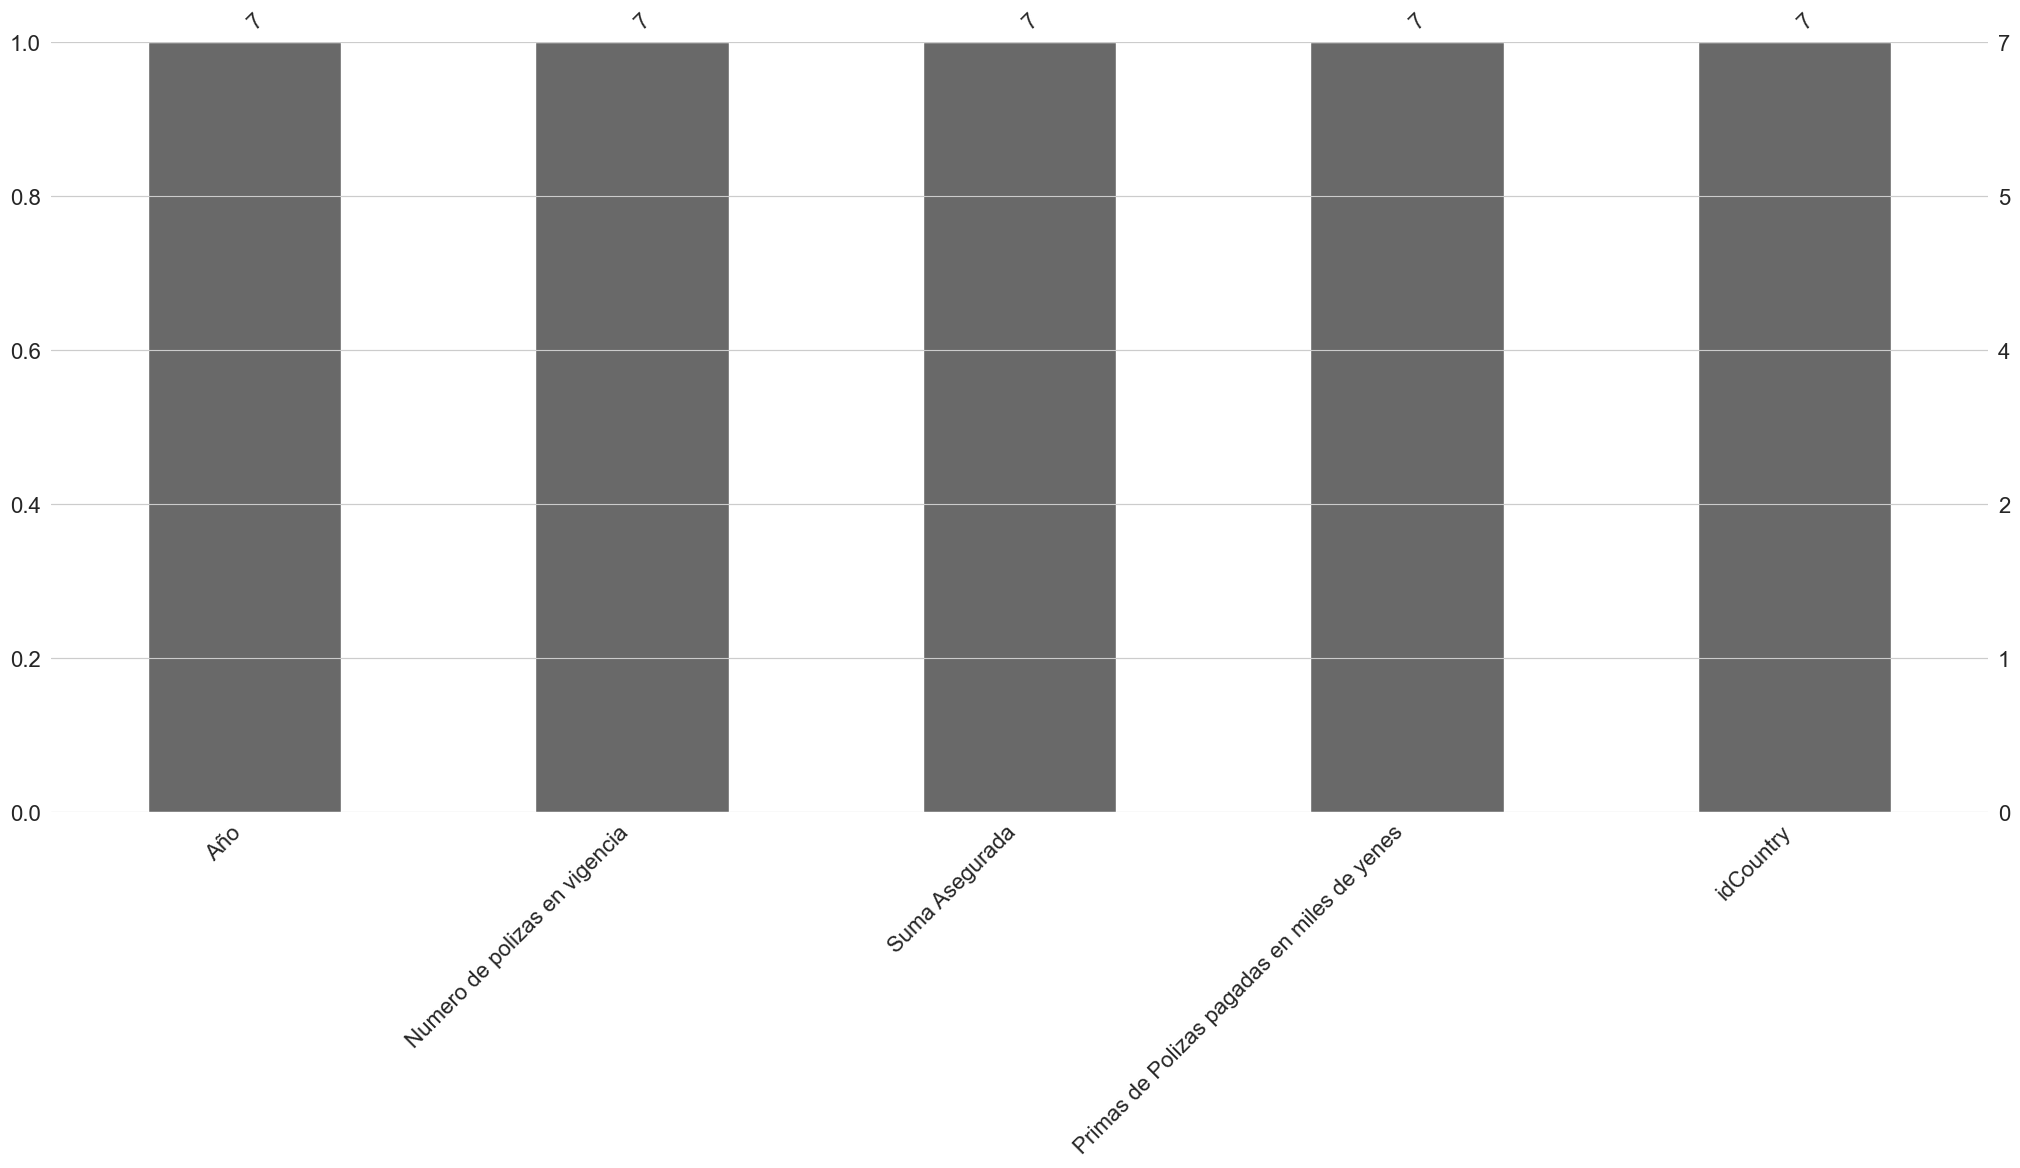

In [513]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_nuevas)

In [514]:
# se encuentran todos los datos no hay vacios

# Observamos si hay valores duplicados
df_kpi1_nuevas.duplicated().sum()

0

In [515]:
# No hay duplicados

# Agrupar por año y sumar las cantidades de pólizas vigentes
polizas_por_anio = df_kpi1_nuevas.groupby('Año')['Numero de polizas en vigencia'].sum()

# Obtener el año con más cantidad de pólizas vigentes
anio_max_polizas_new = polizas_por_anio.idxmax()

print("El año con más cantidad de pólizas vigentes es:", anio_max_polizas_new)

El año con más cantidad de pólizas vigentes es: 2020


In [516]:
# Agrupar por año y sumar las sumas aseguradas
polizas_por_anio = df_kpi1_nuevas.groupby('Año')['Suma Asegurada'].sum()

# Obtener el año con mayor valor asegurado
anio_max_polizas_aseg = polizas_por_anio.idxmax()

print("El año con mayor valor asegurado es:", anio_max_polizas_aseg)

El año con mayor valor asegurado es: 2020


In [517]:
# Agrupamos los datos por año y calculamos la media de las Suma Asegurada
df_grouped_suma = df_kpi1_nuevas.groupby('Año')['Suma Asegurada'].mean()
print(df_grouped_suma)

Año
2015    79535689.0
2016    77478280.0
2017    74571308.0
2018    79432981.0
2019    82522929.0
2020    82882120.0
2021    77648023.0
Name: Suma Asegurada, dtype: float64


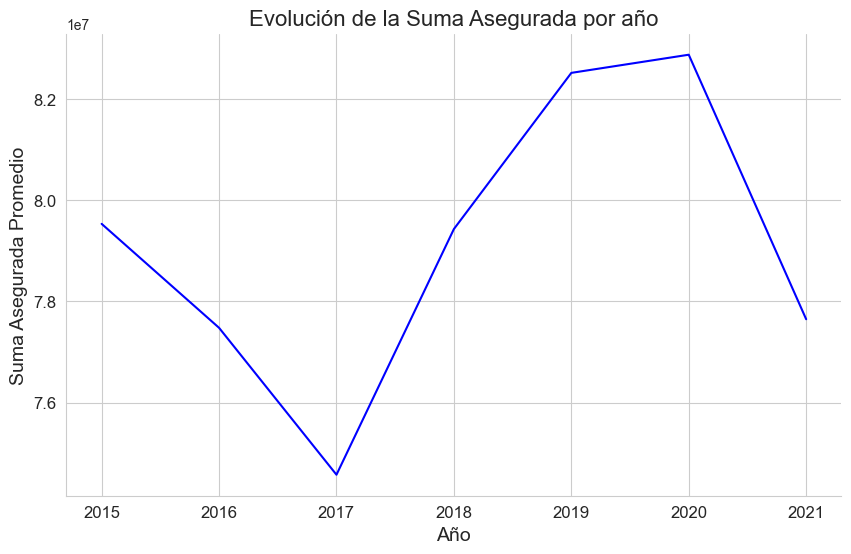

In [518]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_nuevas, x='Año', y='Suma Asegurada', color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Suma Asegurada Promedio', fontsize=14)
plt.title('Evolución de la Suma Asegurada por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

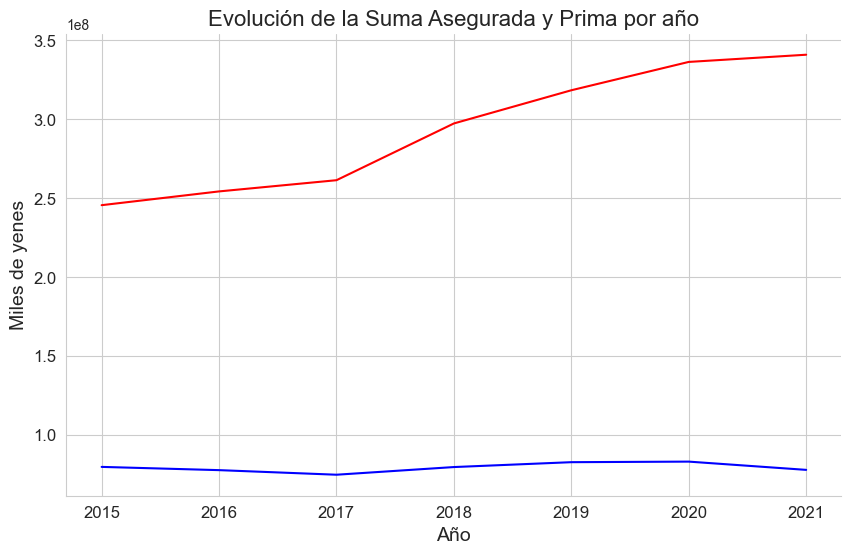

In [519]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_nuevas, x='Año', y='Suma Asegurada', color='blue')
sns.lineplot(data=df_kpi1_nuevas, x='Año', y='Primas de Polizas pagadas en miles de yenes', color='red')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Miles de yenes', fontsize=14)
plt.title('Evolución de la Suma Asegurada y Prima por año', fontsize=16)
plt.xticks(df_kpi1_nuevas['Año'], fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

In [520]:
# Analizamos el archivo de polizas en vigencia
# Ingestamos el archivo json
df_kpi1_vigente = pd.read_json("Datasets/KPI 1/polizas_en_vigencia.json")
# Observamos
df_kpi1_vigente.sample(3)

Año  Numero de polizas en vigencia  Suma Asegurada  \
4  2019                        9511036        82522929   
3  2018                        9308162        79432981   
5  2020                        9559989        82882120   

   Primas de Polizas pagadas en miles de yenes  idCountry  
4                                    318344114          2  
3                                    297305589          2  
5                                    336313105          2

In [521]:
# Observamos más en detalle
df_kpi1_vigente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Año                                          7 non-null      int64
 1   Numero de polizas en vigencia                7 non-null      int64
 2   Suma Asegurada                               7 non-null      int64
 3   Primas de Polizas pagadas en miles de yenes  7 non-null      int64
 4   idCountry                                    7 non-null      int64
dtypes: int64(5)
memory usage: 336.0 bytes


In [522]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_vigente.describe()

Año  Numero de polizas en vigencia  Suma Asegurada  \
count     7.000000                   7.000000e+00    7.000000e+00   
mean   2018.000000                   9.305175e+06    7.915305e+07   
std       2.160247                   2.456344e+05    2.931130e+06   
min    2015.000000                   8.941885e+06    7.457131e+07   
25%    2016.500000                   9.156849e+06    7.756315e+07   
50%    2018.000000                   9.308162e+06    7.943298e+07   
75%    2019.500000                   9.506245e+06    8.102931e+07   
max    2021.000000                   9.559989e+06    8.288212e+07   

       Primas de Polizas pagadas en miles de yenes  idCountry  
count                                 7.000000e+00        7.0  
mean                                  2.934067e+08        2.0  
std                                   3.998954e+07        0.0  
min                                   2.454809e+08        2.0  
25%                                   2.577618e+08        2.0  
50%                                   2.973056e+08        2.0  
75%                                   3.273286e+08        2.0  
max                                   3.408798e+08        2.0

In [523]:
# Comparamos los DataFrames
if df_kpi1_nuevas.equals(df_kpi1_vigente):
    print('Los DataFrames son iguales')
else:
    print('Los DataFrames son diferentes')

Los DataFrames son iguales


In [524]:
# Analizamos el archivo de polizas japon
# Ingestamos el archivo json
df_kpi1_pjapon = pd.read_json("Datasets/KPI 1/polizas_japon.json")
# Observamos
df_kpi1_pjapon.sample(3)

nombre Estado  Propiedades aseguradas  Monto asegurado  Primas emitidas  \
54        Ibaraki                   86727           779860          4681740   
116         Aichi                  397663           674512          1723752   
273         Kochi                   15935           123543          1046525   

     Propiedades Aseguradas  Monto asegurado.1   Tipo Construcción   año  \
54                   190009            1688865    Tipo B edificios  2019   
116                  640786            1257391  Tipo A residencias  2019   
273                   40177             313980    Tipo B edificios  2020   

     idCountry  
54           2  
116          2  
273          2

In [525]:
# Observamos más en detalle
df_kpi1_pjapon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nombre Estado           564 non-null    object
 1   Propiedades aseguradas  564 non-null    int64 
 2   Monto asegurado         564 non-null    int64 
 3   Primas emitidas         564 non-null    int64 
 4   Propiedades Aseguradas  564 non-null    int64 
 5   Monto asegurado.1       564 non-null    int64 
 6   Tipo Construcción       564 non-null    object
 7   año                     564 non-null    int64 
 8   idCountry               564 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 44.1+ KB


In [526]:
df_kpi1_pjapon = df_kpi1_pjapon.rename(columns={'Monto asegurado': 'Monto asegurado nuevo', 'Monto asegurado.1': 'Monto asegurado vigente', 'Propiedades Aseguradas': 'Propiedades Aseguradas vigentes','Propiedades aseguradas': 'Propiedades Aseguradas nuevas' })

In [527]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_pjapon.describe()

Propiedades Aseguradas nuevas  Monto asegurado nuevo  Primas emitidas  \
count                     564.000000           5.640000e+02     5.640000e+02   
mean                    63936.384752           4.309452e+05     1.765137e+06   
std                     88647.635787           7.501202e+05     4.144271e+06   
min                       701.000000           1.182000e+03     5.747000e+03   
25%                     16556.500000           5.913375e+04     1.472885e+05   
50%                     30481.000000           1.880915e+05     5.643715e+05   
75%                     65628.750000           4.213142e+05     1.429344e+06   
max                    630735.000000           6.780757e+06     4.048992e+07   

       Propiedades Aseguradas vigentes  Monto asegurado vigente          año  \
count                     5.640000e+02             5.640000e+02   564.000000   
mean                      1.430639e+05             1.034651e+06  2020.000000   
std                       1.919866e+05             1.830170e+06     0.817221   
min                       1.422000e+03             2.398000e+03  2019.000000   
25%                       3.989850e+04             1.296620e+05  2019.000000   
50%                       7.336250e+04             4.539360e+05  2020.000000   
75%                       1.545130e+05             1.042434e+06  2021.000000   
max                       1.406701e+06             1.724243e+07  2021.000000   

       idCountry  
count      564.0  
mean         2.0  
std          0.0  
min          2.0  
25%          2.0  
50%          2.0  
75%          2.0  
max          2.0

<AxesSubplot: >

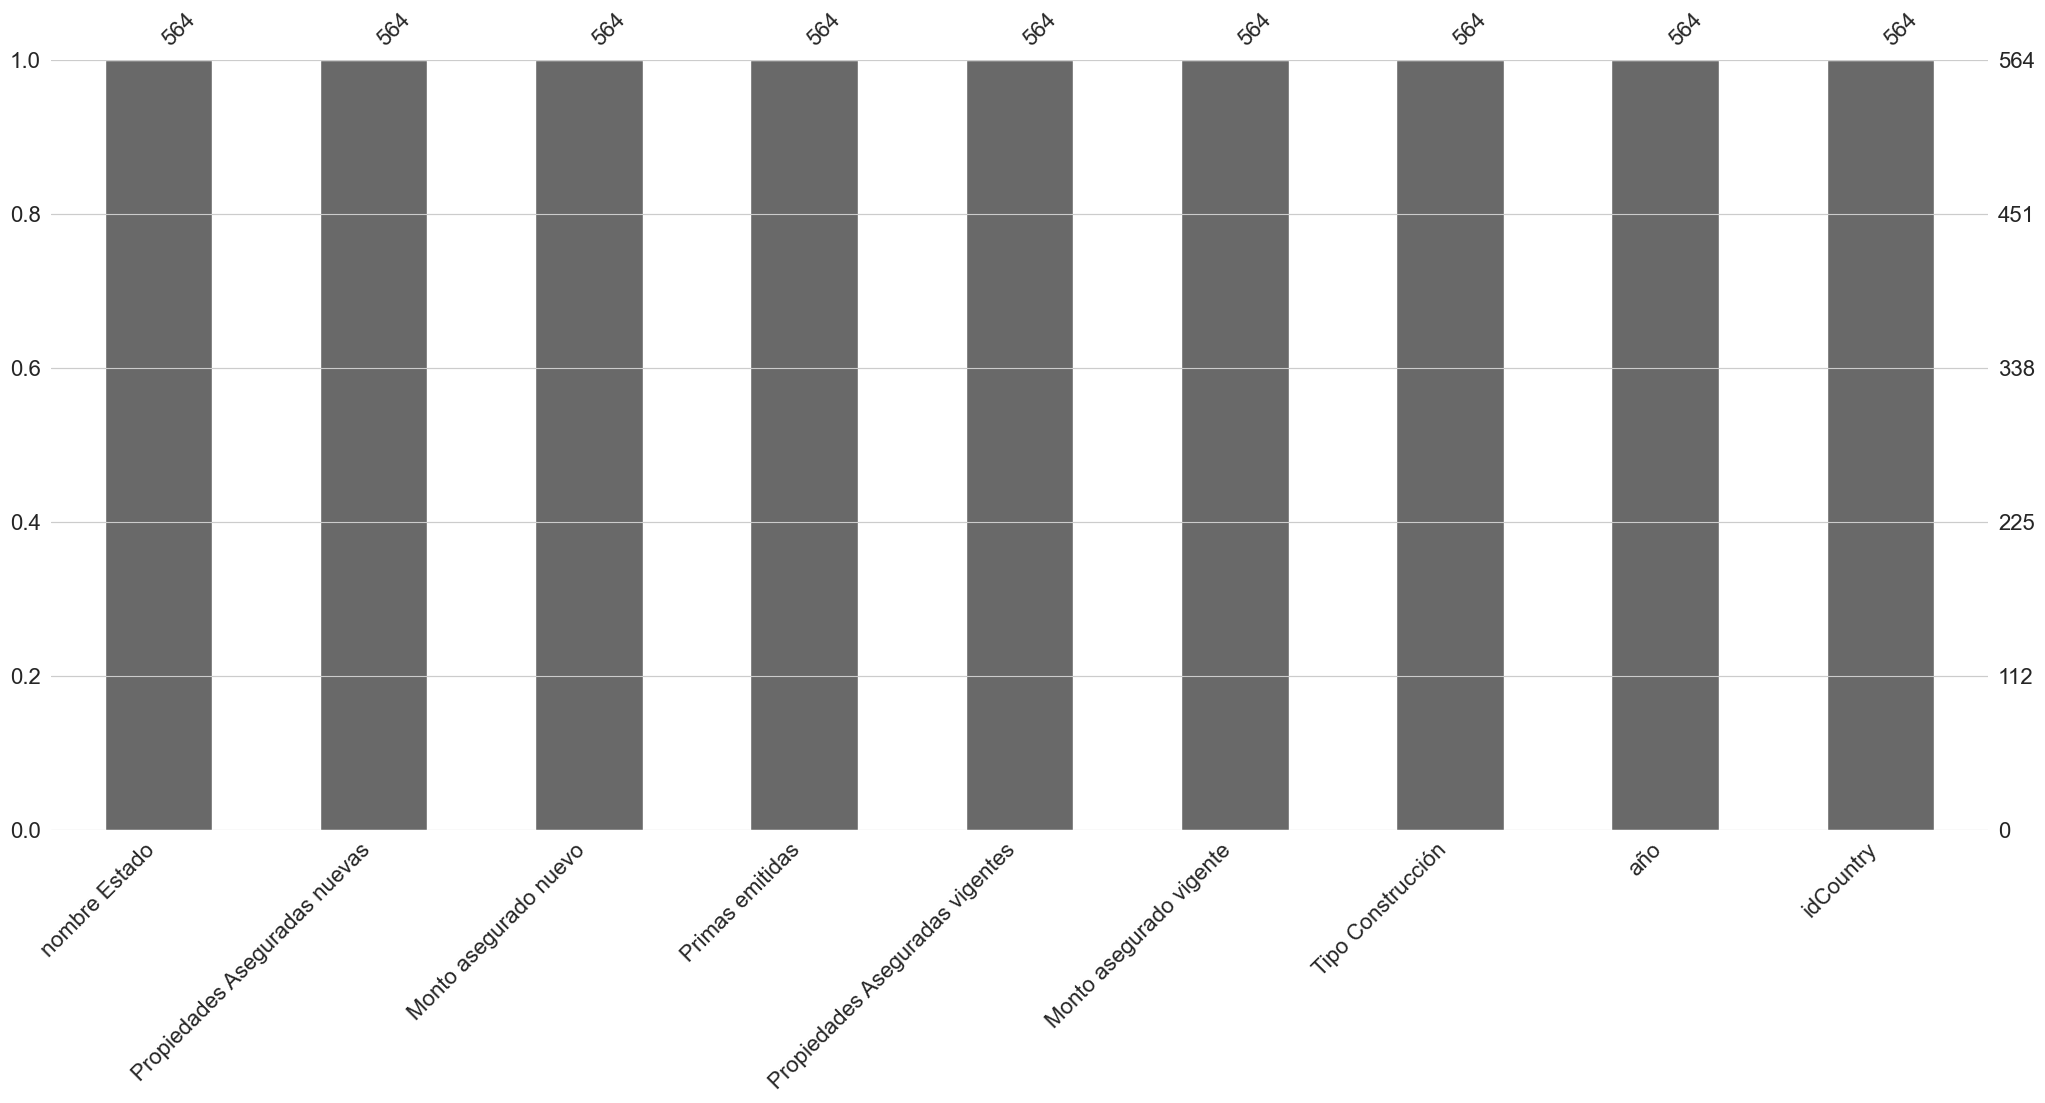

In [528]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_pjapon)

In [529]:
# la información esta completa

# Observamos si hay valores duplicados
df_kpi1_pjapon.duplicated().sum()

0

In [530]:
# Agrupamos los datos por año y calculamos la media de las Suma Asegurada
df_grouped_suma_new = df_kpi1_pjapon.groupby('año')['Monto asegurado nuevo'].mean()
print(df_grouped_suma_new)

año
2019    438951.734043
2020    440862.351064
2021    413021.414894
Name: Monto asegurado nuevo, dtype: float64


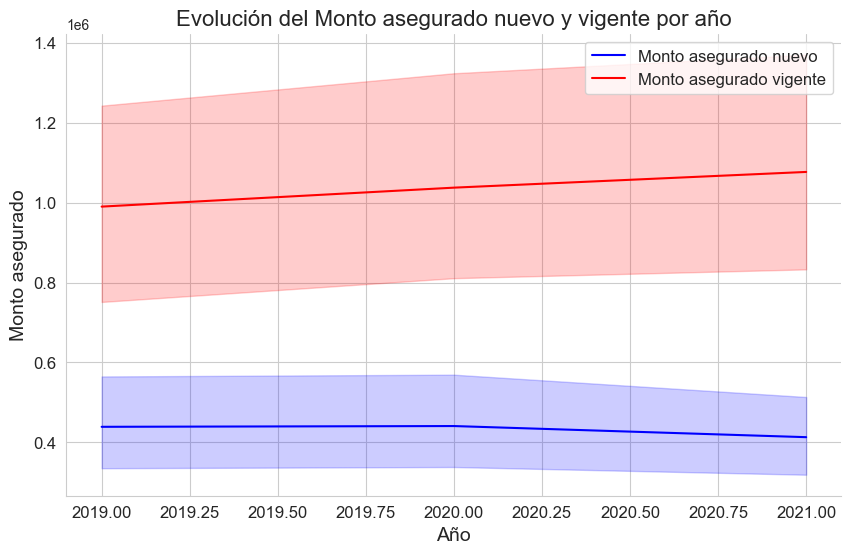

In [531]:
#se hace un grafico de lineas que permita visualizar el monto asegurado nuevo vs el monto asegurado vigente por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_pjapon, x='año', y='Monto asegurado nuevo', color='blue', label='Monto asegurado nuevo')
sns.lineplot(data=df_kpi1_pjapon, x='año', y='Monto asegurado vigente', color='red', label='Monto asegurado vigente')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Monto asegurado', fontsize=14)
plt.title('Evolución del Monto asegurado nuevo y vigente por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()

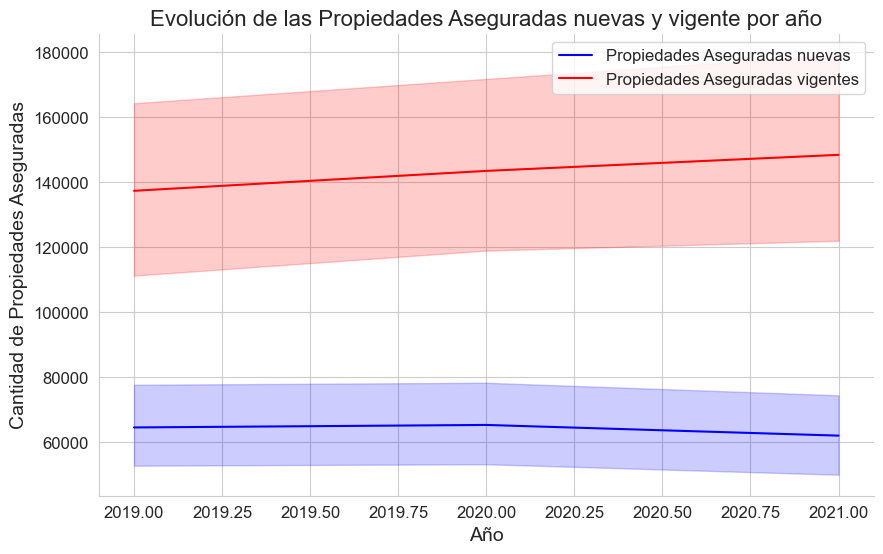

In [532]:
# se puede observar que los montos asegurados por año vigentes crece mientras que los montos nuevos se ha disminuido del 2020 al 2021
#se hace un grafico de lineas que permita visualizar la cantidad de propiedades vigentes y nuevas por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_pjapon, x='año', y='Propiedades Aseguradas nuevas', color='blue', label='Propiedades Aseguradas nuevas')
sns.lineplot(data=df_kpi1_pjapon, x='año', y='Propiedades Aseguradas vigentes', color='red', label='Propiedades Aseguradas vigentes')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Propiedades Aseguradas', fontsize=14)
plt.title('Evolución de las Propiedades Aseguradas nuevas y vigente por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()

In [533]:
# se puede observar que la cantidad de polizas vigentes por año ha crecido mientras que las polizas nuevas se ha disminuido del 2020 al 2021
# Analizamos el archivo de seguro contra terremotos
# Ingestamos el archivo json
df_kpi1_terrem = pd.read_json("Datasets/KPI 1/seguro contra terremotos.json")
# Observamos
df_kpi1_terrem.sample(3)

Prefectura  Cantidad de contratos  Monto asegurado  Prima del seguro  \
80  Hiroshima                 187993          1764333           3802669   
22      Aichi                 745576          5636287          19377951   
56      Gumma                 103654           970276           2089843   

    Cantidad de Polizas en vigor  Monto asegurado.1   Año  idCountry  
80                        443509            4475371  2020          2  
22                       1523475           14572680  2021          2  
56                        226008            2301873  2020          2

In [534]:
# Observamos más en detalle
df_kpi1_terrem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Prefectura                    141 non-null    object
 1   Cantidad de contratos         141 non-null    int64 
 2   Monto asegurado               141 non-null    int64 
 3   Prima del seguro              141 non-null    int64 
 4   Cantidad de Polizas en vigor  141 non-null    int64 
 5   Monto asegurado.1             141 non-null    int64 
 6   Año                           141 non-null    int64 
 7   idCountry                     141 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 9.9+ KB


In [535]:
df_kpi1_terrem = df_kpi1_terrem.rename(columns={'Monto asegurado': 'Monto asegurado nuevo', 'Monto asegurado.1': 'Monto asegurado vigente', ' Cantidad de contratos': ' Cantidad de polizas nuevas','Cantidad de Polizas en vigor': 'Cantidad de Polizas vigentes' })

In [536]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_terrem.describe()

Cantidad de contratos  Monto asegurado nuevo  Prima del seguro  \
count           1.410000e+02           1.410000e+02      1.410000e+02   
mean            1.991923e+05           1.723781e+06      7.060546e+06   
std             2.545747e+05           2.110029e+06      1.255507e+07   
min             2.422800e+04           2.193810e+05      5.446210e+05   
25%             5.645800e+04           5.170750e+05      1.482648e+06   
50%             9.880000e+04           9.128120e+05      2.307702e+06   
75%             2.008110e+05           1.776097e+06      6.572343e+06   
max             1.328141e+06           1.109859e+07      7.231263e+07   

       Cantidad de Polizas vigentes  Monto asegurado vigente          Año  \
count                  1.410000e+02             1.410000e+02   141.000000   
mean                   4.319172e+05             4.138602e+06  2020.000000   
std                    5.353807e+05             4.977266e+06     0.819407   
min                    5.708300e+04             5.804570e+05  2019.000000   
25%                    1.314970e+05             1.305205e+06  2019.000000   
50%                    2.203780e+05             2.160687e+06  2020.000000   
75%                    4.435090e+05             4.363734e+06  2021.000000   
max                    2.795687e+06             2.670004e+07  2021.000000   

       idCountry  
count      141.0  
mean         2.0  
std          0.0  
min          2.0  
25%          2.0  
50%          2.0  
75%          2.0  
max          2.0

<AxesSubplot: >

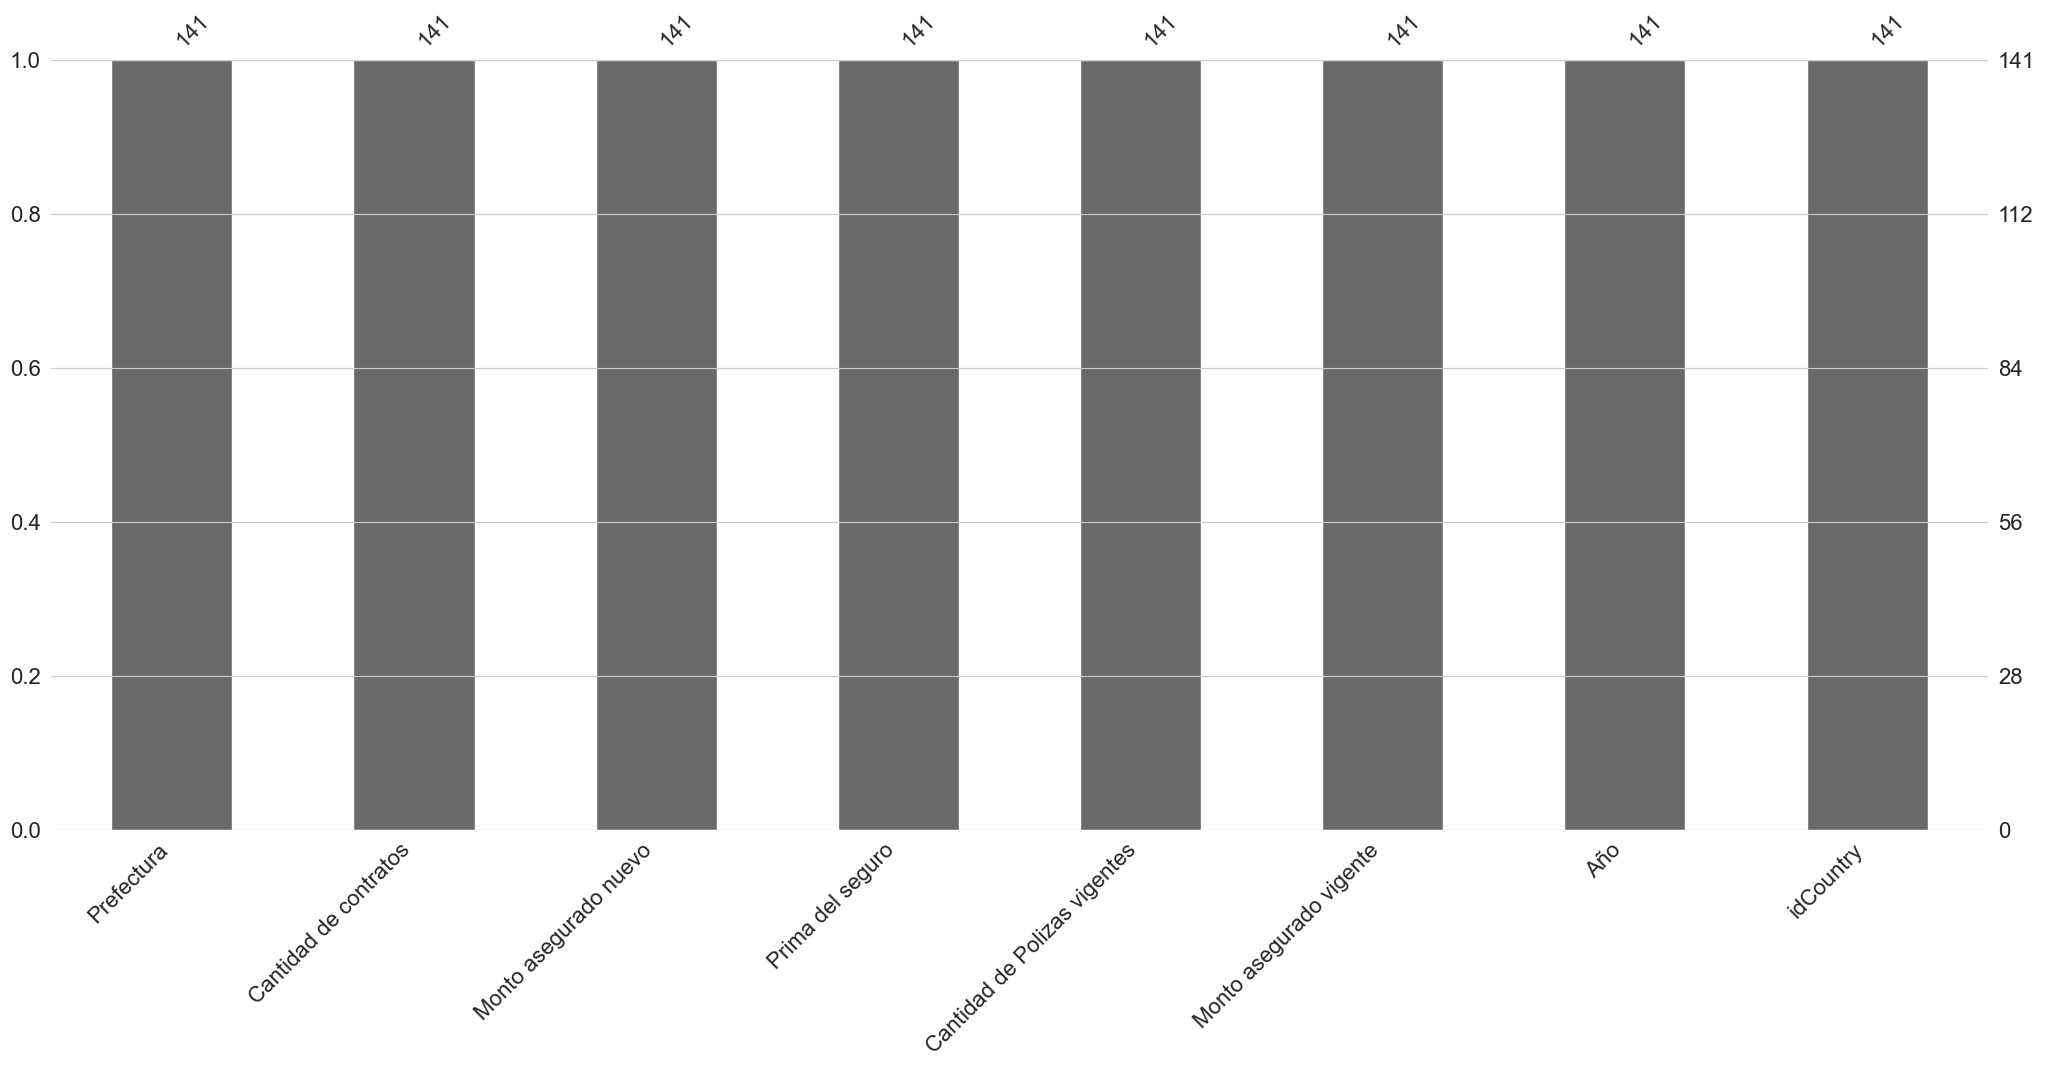

In [537]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_terrem)

In [538]:
#no faltan datos, esta completo

# Observamos si hay valores duplicados
df_kpi1_terrem.duplicated().sum()

0

In [539]:
# no hay duplicados

# Agrupamos los datos por año y calculamos la media de las Suma Asegurada
df_grouped_suma_prim = df_kpi1_terrem.groupby('Año')['Prima del seguro'].mean()
print(" Año vs prima promedio aseguradas: ", df_grouped_suma_prim)

 Año vs prima promedio aseguradas:  Año
2019    6.773279e+06
2020    7.155598e+06
2021    7.252762e+06
Name: Prima del seguro, dtype: float64


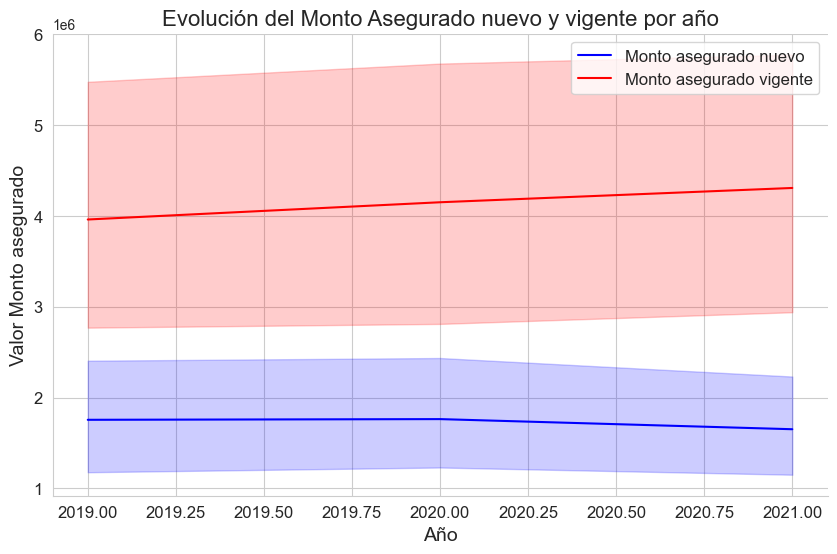

In [540]:
# los valores en promedio de las primas aumentaron para el año 2021

#se hace un grafico de lineas que permita visualizar los montos asegurados vigentes y nuevos por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Monto asegurado nuevo', color='blue', label='Monto asegurado nuevo')
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Monto asegurado vigente', color='red', label='Monto asegurado vigente')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Valor Monto asegurado', fontsize=14)
plt.title('Evolución del Monto Asegurado nuevo y vigente por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()

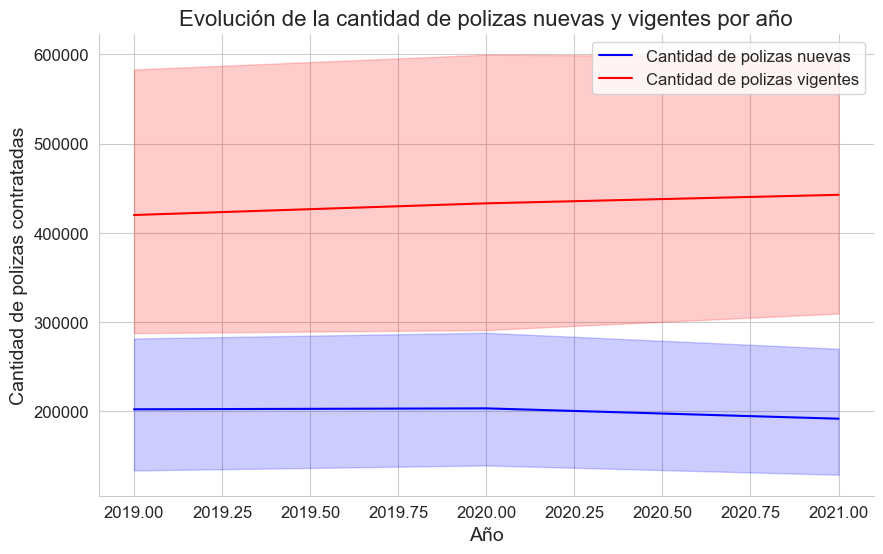

In [541]:
#se hace un grafico de lineas que permita visualizar la cantidad de polizas vigentes y nuevas por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Cantidad de contratos', color='blue', label='Cantidad de polizas nuevas')
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Cantidad de Polizas vigentes', color='red', label='Cantidad de polizas vigentes')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de polizas contratadas', fontsize=14)
plt.title('Evolución de la cantidad de polizas nuevas y vigentes por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()

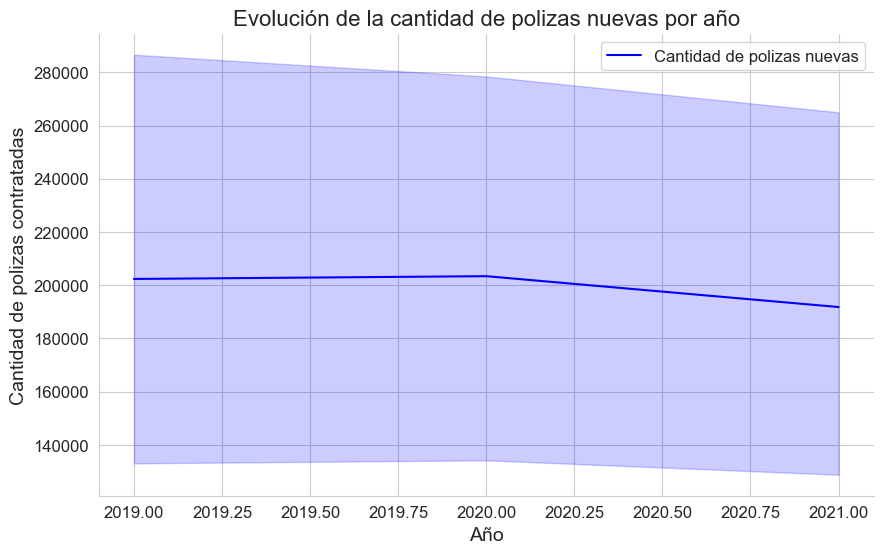

In [542]:
#se hace un grafico de lineas que permita visualizar la cantidad de polizas nuevas por año
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_kpi1_terrem, x='Año', y='Cantidad de contratos', color='blue', label='Cantidad de polizas nuevas')

# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de polizas contratadas', fontsize=14)
plt.title('Evolución de la cantidad de polizas nuevas por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine()
plt.show()

In [543]:
# se observa una disminución de compra de polizas desde el año 2020
# Analizamos el archivo de seguros_mex
# Ingestamos el archivo parquet
df_kpi1_mexico = pd.read_parquet("Datasets/KPI 1/seguros_mex.parquet")

df_kpi1_mexico.sample(3)

AñO    MONEDA ZONA SISMICA TIPO DE SEGURO SUBTIPO DE SEGURO  \
131349  2020  Nacional           B_      Terremoto              Otro   
177725  2020  Nacional           A_      Terremoto              Otro   
178034  2020  Nacional           B1      Terremoto              Otro   

        NUMERO DE PISOS  NUMERO DE UBICACIONES  PRIMA EMITIDA  PRIMA RETENIDA  \
131349                1                     14           1458             141   
177725                1                      3              8               0   
178034                2                      2           1258             944   

        PRIMA DEVENGADA  COMISION DIRECTA  VALORES TOTALES EDIFICIO  \
131349             1621                98                         0   
177725              361                 0                   1255835   
178034             1456                62                  16000000   

        VALORES TOTALES CONTENIDOS  VALORES TOTALES PeERDIDAS CONSECUENCIALES  \
131349                     5805000                                          0   
177725                     1379229                                     263337   
178034                     3000000                                    1900000   

        LIMITE MAXIMO DE RESPONSABILIDAD  idCountry  
131349                           5805000          3  
177725                           2898401          3  
178034                          20900000          3

In [544]:
# Observamos más en detalle
df_kpi1_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321792 entries, 0 to 321791
Data columns (total 16 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   AñO                                        321792 non-null  int64 
 1   MONEDA                                     321792 non-null  object
 2   ZONA SISMICA                               321792 non-null  object
 3   TIPO DE SEGURO                             321792 non-null  object
 4   SUBTIPO DE SEGURO                          321792 non-null  object
 5   NUMERO DE PISOS                            321792 non-null  int64 
 6   NUMERO DE UBICACIONES                      321792 non-null  int64 
 7   PRIMA EMITIDA                              321792 non-null  int64 
 8   PRIMA RETENIDA                             321792 non-null  int64 
 9   PRIMA DEVENGADA                            321792 non-null  int64 
 10  COMISION DIRECTA    

In [545]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_mexico.describe()

AñO  NUMERO DE PISOS  NUMERO DE UBICACIONES  PRIMA EMITIDA  \
count  321792.000000    321792.000000          321792.000000   3.217920e+05   
mean     2019.965667         3.449383              34.886887   9.413776e+04   
std         0.812306         5.766984             675.864210   2.920290e+06   
min      2019.000000         1.000000               1.000000  -2.587453e+07   
25%      2019.000000         1.000000               1.000000   3.100000e+01   
50%      2020.000000         2.000000               2.000000   1.510000e+03   
75%      2021.000000         3.000000               6.000000   1.185125e+04   
max      2021.000000        86.000000          116839.000000   1.128403e+09   

       PRIMA RETENIDA  PRIMA DEVENGADA  COMISION DIRECTA  \
count    3.217920e+05     3.217920e+05      3.217920e+05   
mean     1.374062e+04     1.022341e+05      2.841771e+03   
std      9.028476e+05     2.688615e+06      5.835531e+04   
min     -8.275172e+06    -9.652564e+06     -1.228722e+06   
25%      0.000000e+00     3.020000e+02      0.000000e+00   
50%      9.700000e+01     2.101000e+03      2.100000e+01   
75%      1.599000e+03     1.313700e+04      3.850000e+02   
max      3.509247e+08     7.931042e+08      1.056293e+07   

       VALORES TOTALES EDIFICIO  VALORES TOTALES CONTENIDOS  \
count              3.217920e+05                3.217920e+05   
mean               2.973246e+08                2.000049e+08   
std                6.266646e+09                2.389763e+09   
min                0.000000e+00                0.000000e+00   
25%                0.000000e+00                1.000000e+06   
50%                4.439930e+06                5.400000e+06   
75%                3.828155e+07                3.226768e+07   
max                1.312740e+12                3.057741e+11   

       VALORES TOTALES PeERDIDAS CONSECUENCIALES  \
count                               3.217920e+05   
mean                                9.249557e+07   
std                                 1.766256e+09   
min                                 0.000000e+00   
25%                                 0.000000e+00   
50%                                 1.533000e+05   
75%                                 5.030395e+06   
max                                 5.298241e+11   

       LIMITE MAXIMO DE RESPONSABILIDAD  idCountry  
count                      3.217920e+05   321792.0  
mean                       1.075040e+09        3.0  
std                        9.221483e+09        0.0  
min                        1.000000e+00        3.0  
25%                        4.200000e+06        3.0  
50%                        2.280000e+07        3.0  
75%                        1.906148e+08        3.0  
max                        1.011690e+12        3.0

<AxesSubplot: >

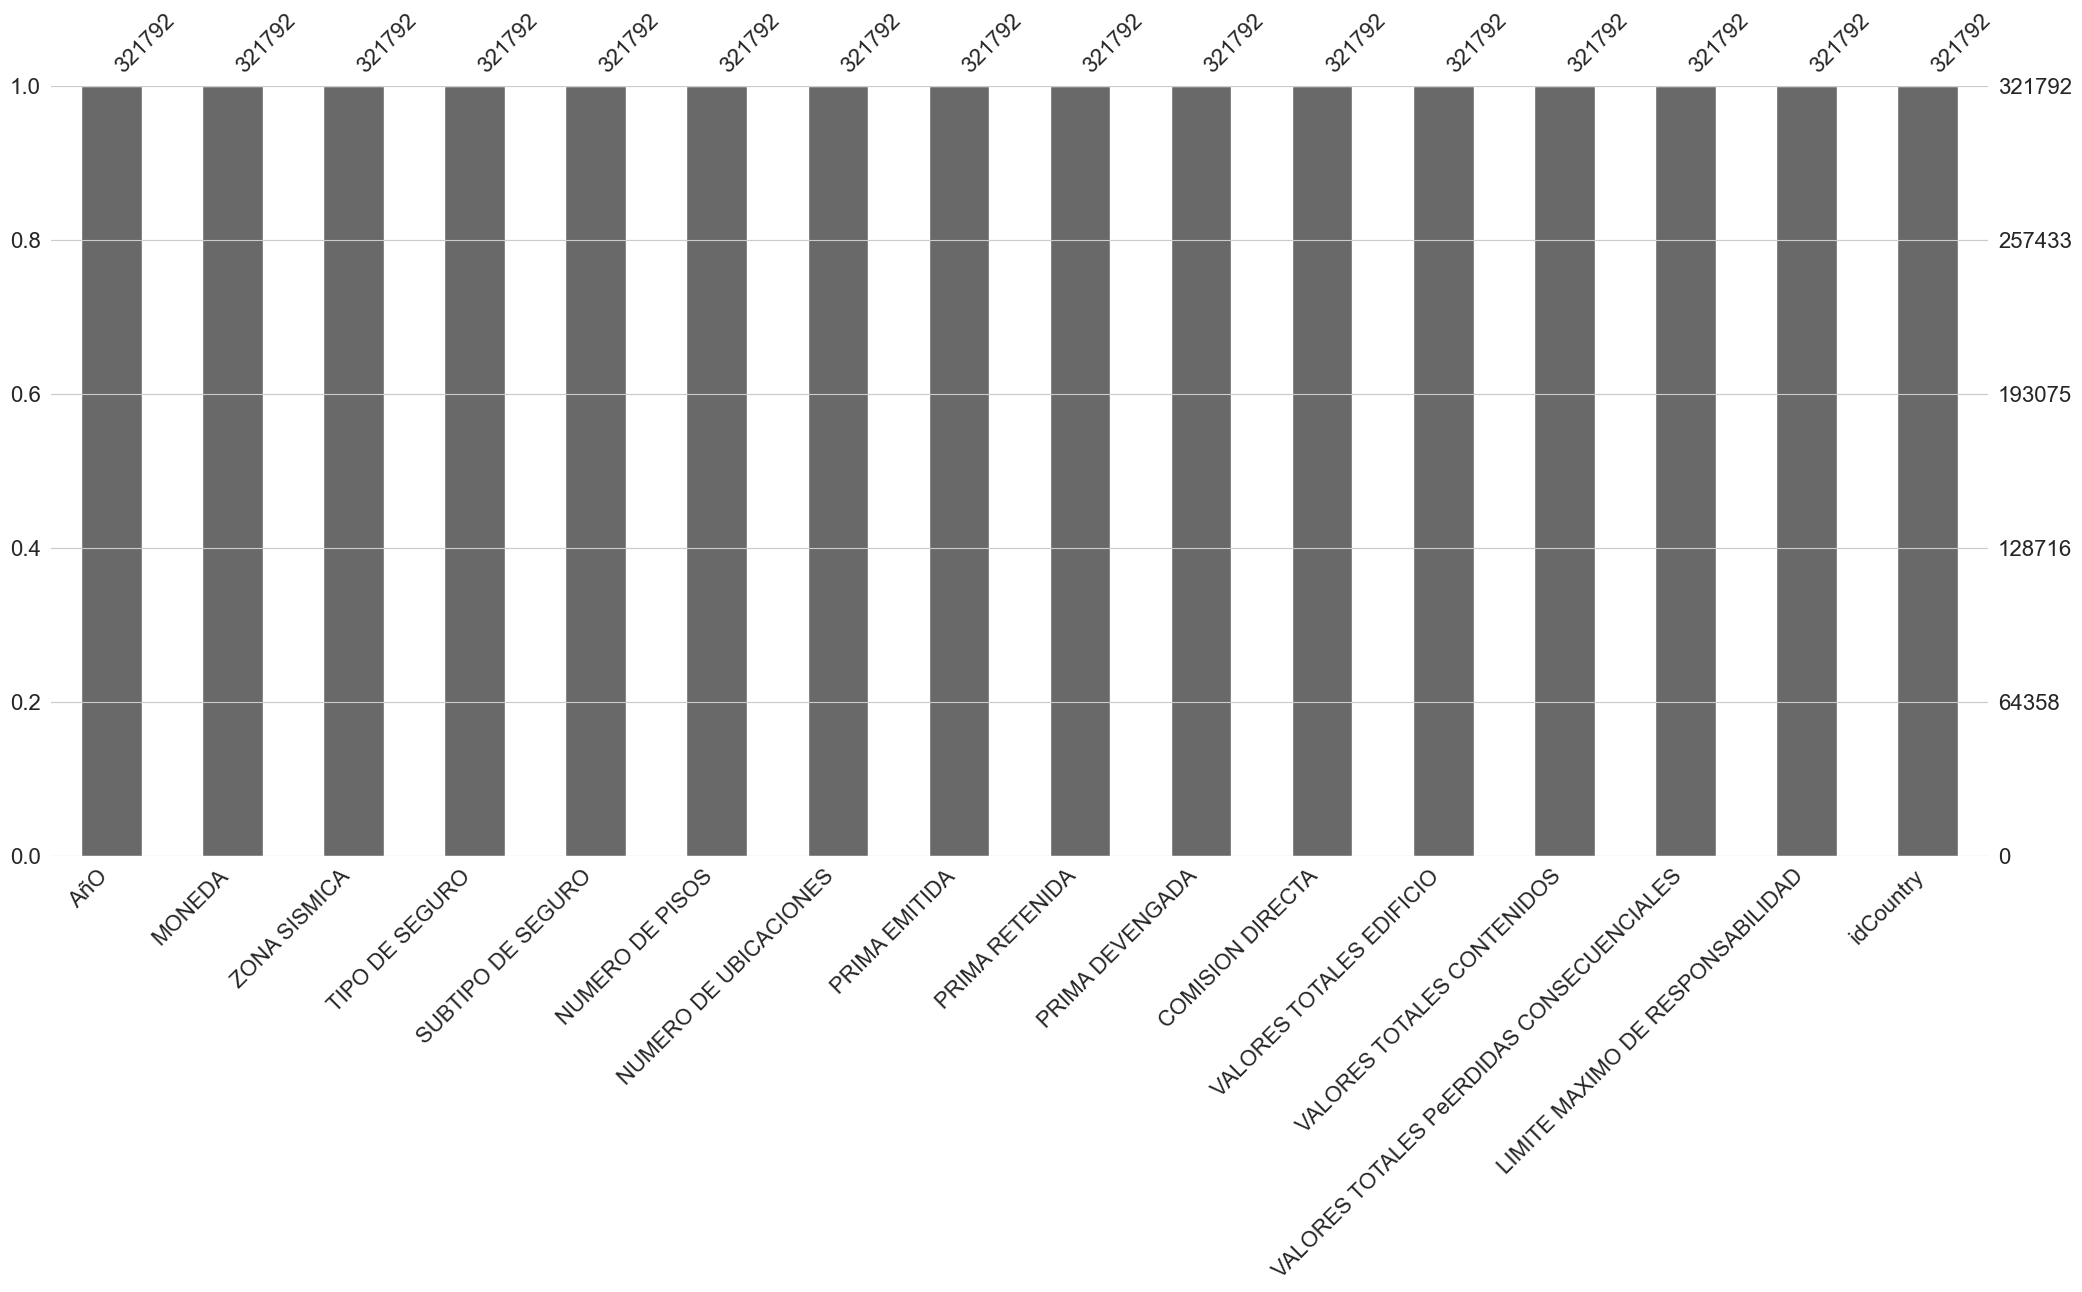

In [546]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_mexico)

In [547]:
# Observamos si hay valores duplicados
df_kpi1_mexico.duplicated().sum()

2730

In [548]:
# Observamos los años con mas registros 
df_kpi1_mexico["AñO"].value_counts().sort_values(ascending=False).head()

2019    111879
2020    109082
2021    100831
Name: AñO, dtype: int64

In [549]:
def datos_unicos(datafram_analisis):
    for column in datafram_analisis.columns:
        unique_values = datafram_analisis[column].unique()
        respuesta= print(f"Valores únicos por columna '{column}':", unique_values)
    return respuesta
datos_unicos(df_kpi1_mexico)

Valores únicos por columna 'AñO': [2019 2020 2021]
Valores únicos por columna 'MONEDA': ['Nacional' 'Extranjera' 'Indizada']
Valores únicos por columna 'ZONA SISMICA': ['A_' 'B_' 'C_' 'D_' 'E_' 'F_' 'G_' 'H1' 'I_' 'B1' 'H2' 'J_' 'Z2' 'Z3'
 'SZ' 'Z1']
Valores únicos por columna 'TIPO DE SEGURO': ['Terremoto']
Valores únicos por columna 'SUBTIPO DE SEGURO': ['Otro' 'Microseguro' 'Pymes' 'Negocio gubernamental' 'Seguro obligatorio']
Valores únicos por columna 'NUMERO DE PISOS': [ 1  2  4  3  5  7 13 10  8  6 31 25  9 11 12 16 17 20 21 23 40 14 15 35
 44 30 36 50 29 24 27 41 32 18 19 26 28 43 46 47 48 49 51 54 64 22 33 34
 59 55 38 39 37 60 42 52 67 58 53 66 45 57 56 68 69 80 86 74 82 75 70 65
 61 73 77 79 63 72 78 62 76 71 81]
Valores únicos por columna 'NUMERO DE UBICACIONES': [   1    2    3 ... 1426  943 1282]
Valores únicos por columna 'PRIMA EMITIDA': [     0    383   3511 ... 431999 368249  58454]
Valores únicos por columna 'PRIMA RETENIDA': [     0    262   2336 ... 158392  93133  

Text(0, 0.5, 'Valores numericos')

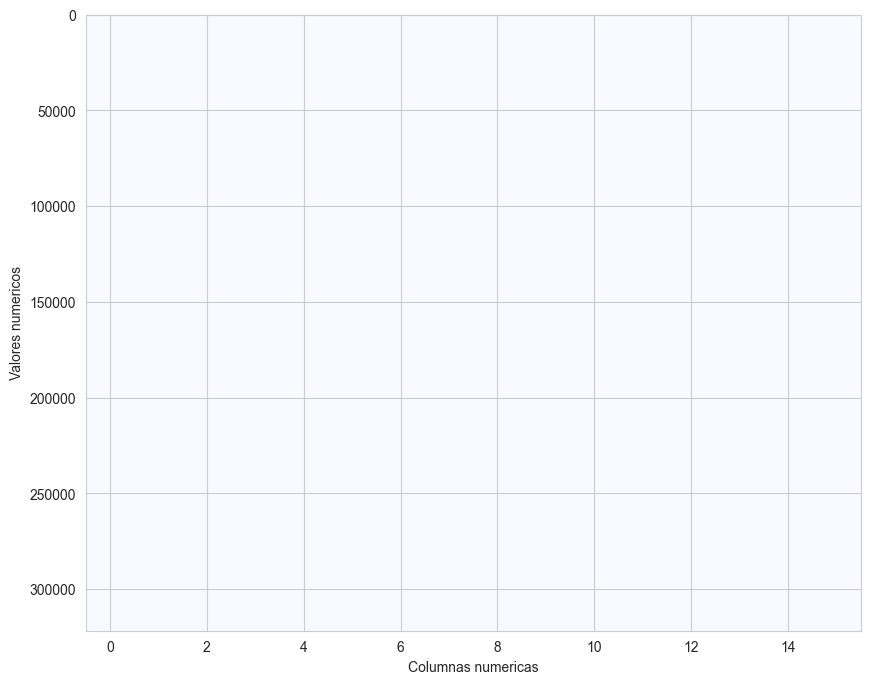

In [550]:
# revisar los valores nulos
plt.figure(figsize=(10,8))
plt.imshow(df_kpi1_mexico.isna(),aspect="auto", 
           interpolation="nearest",cmap="Blues")
plt.xlabel("Columnas numericas")
plt.ylabel("Valores numericos")

In [551]:
# no hay valores nulos

#identificacion de las columnas numericas
df_numeric_mex = df_kpi1_mexico.select_dtypes(include=['int64', 'float64'])

In [552]:
# Calcular la matriz de correlación
corr_matrix = df_numeric_mex.corr()

# Imprimir la matriz de correlación
print(corr_matrix)

                                                AñO  NUMERO DE PISOS  \
AñO                                        1.000000         0.024349   
NUMERO DE PISOS                            0.024349         1.000000   
NUMERO DE UBICACIONES                      0.008555        -0.016781   
PRIMA EMITIDA                              0.002093        -0.008008   
PRIMA RETENIDA                             0.003328        -0.003648   
PRIMA DEVENGADA                           -0.004294        -0.010368   
COMISION DIRECTA                           0.007187        -0.005946   
VALORES TOTALES EDIFICIO                   0.001178        -0.010270   
VALORES TOTALES CONTENIDOS                 0.008728        -0.025151   
VALORES TOTALES PeERDIDAS CONSECUENCIALES  0.004270        -0.014800   
LIMITE MAXIMO DE RESPONSABILIDAD           0.001170        -0.032617   
idCountry                                       NaN              NaN   

                                           NUMERO DE UBICACIONE

In [553]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped_mex = df_kpi1_mexico.groupby('AñO')['PRIMA EMITIDA'].mean()

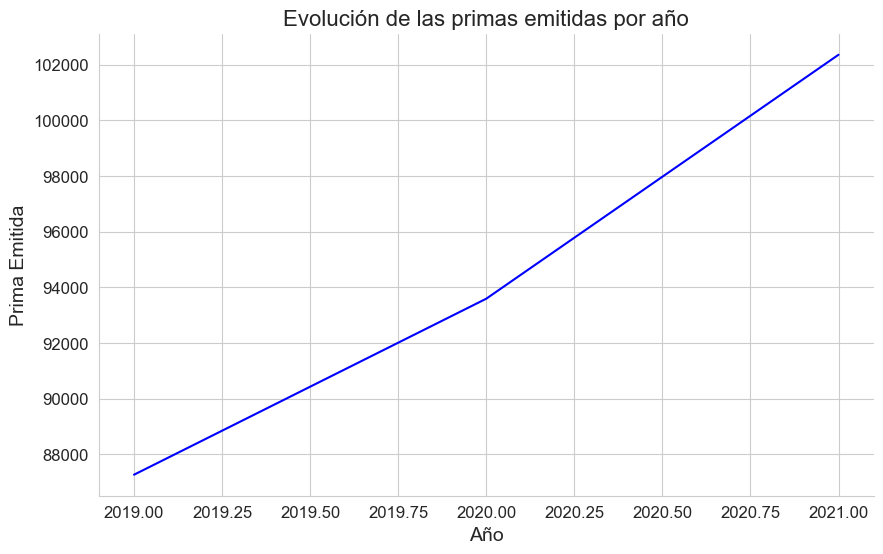

In [554]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped_mex, color='blue')
# Configuramos los ejes y la leyenda
plt.xlabel('Año', fontsize=14)
plt.ylabel('Prima Emitida', fontsize=14)
plt.title('Evolución de las primas emitidas por año', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

In [555]:
#las primas emitidas han mantenido un crecimiento, aumentando en el primer cuartenio del año 2020

# Observamos el porcentaje de Valores Totales Edificio en base al total donde se sabe los valores unicos su frecuencia
df_kpi1_mexico["VALORES TOTALES EDIFICIO"].value_counts(normalize=True) * 100

0            29.796266
2000000       0.889705
1000000       0.796477
4000000       0.603806
3000000       0.601009
               ...    
84850000      0.000311
280725160     0.000311
235435100     0.000311
684456238     0.000311
816074318     0.000311
Name: VALORES TOTALES EDIFICIO, Length: 130549, dtype: float64

In [556]:
# el valor "0" aparece en aproximadamente el 30% de las filas del DataFrame, mientras que el valor "2000000" aparece en menos del 1% de las filas.

In [557]:
# Observamos el porcentaje de la prima emitida en base al total (0 es negativo, 1 positivo)
df_kpi1_mexico["PRIMA EMITIDA"].value_counts(normalize=True) * 100

0          17.569734
2           0.279684
1           0.278130
4           0.165635
3           0.149786
             ...    
55153       0.000311
59535       0.000311
19889       0.000311
9941031     0.000311
58454       0.000311
Name: PRIMA EMITIDA, Length: 75628, dtype: float64

In [558]:
# Se tiene un 17% de los valores de la prima emitida en cero, los demas son inferiores al 1%

In [559]:
# Analizamos el archivo de tasa penetracion hogares
# Ingestamos el archivo json
df_kpi1_hogares = pd.read_json("Datasets/KPI 1/tasa penetración hogares.json")
# Observamos
df_kpi1_hogares.sample(3)

Prefecture  2015  2016  2017  2018  2019  2020  2021  \
28       Nara  61.7  63.8  64.8  68.1  70.2  72.0  73.3   
47      Total  60.2  62.1  63.0  65.2  66.7  68.3  69.0   
16   Ishikawa  53.4  56.2  57.1  59.5  60.7  62.5  63.4   

    2019 año Calendario Hogar  2020 año Calendario Hogar  \
28                       32.2                       33.4   
47                       33.1                       33.9   
16                       27.4                       28.4   

    2021 año Calendario Hogar  idCountry  
28                       34.2          2  
47                       34.6          2  
16                       29.4          2

In [560]:
# Observamos más en detalle
df_kpi1_hogares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Prefecture                 48 non-null     object 
 1   2015                       48 non-null     float64
 2   2016                       48 non-null     float64
 3   2017                       48 non-null     float64
 4   2018                       48 non-null     float64
 5   2019                       48 non-null     float64
 6   2020                       48 non-null     float64
 7   2021                       48 non-null     float64
 8   2019 año Calendario Hogar  48 non-null     float64
 9   2020 año Calendario Hogar  48 non-null     float64
 10  2021 año Calendario Hogar  48 non-null     float64
 11  idCountry                  48 non-null     int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 4.9+ KB


In [561]:
# Observamos el comportamiento de las variables numéricas
df_kpi1_hogares.describe()

2015       2016       2017       2018       2019       2020  \
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
mean   61.527083  63.766667  64.958333  67.216667  68.868750  70.410417   
std     8.901368   8.507852   8.357538   7.850798   7.626721   7.471371   
min    39.200000  45.000000  47.500000  50.100000  52.000000  53.600000   
25%    55.575000  57.725000  59.000000  62.050000  63.925000  65.725000   
50%    61.300000  62.700000  63.600000  65.350000  66.900000  68.600000   
75%    65.850000  68.125000  69.375000  71.625000  73.350000  74.625000   
max    86.200000  86.400000  86.300000  86.800000  87.000000  87.500000   

            2021  2019 año Calendario Hogar  2020 año Calendario Hogar  \
count  48.000000                  48.000000                  48.000000   
mean   71.279167                  30.260417                  31.106250   
std     7.465551                   6.457380                   6.355812   
min    54.400000                  16.600000                  17.200000   
25%    66.325000                  26.550000                  27.625000   
50%    69.850000                  30.450000                  31.300000   
75%    75.625000                  33.275000                  34.225000   
max    88.700000                  52.000000                  51.900000   

       2021 año Calendario Hogar  idCountry  
count                  48.000000       48.0  
mean                   31.897917        2.0  
std                     6.336302        0.0  
min                    17.600000        2.0  
25%                    28.475000        2.0  
50%                    32.150000        2.0  
75%                    34.925000        2.0  
max                    52.700000        2.0

<AxesSubplot: >

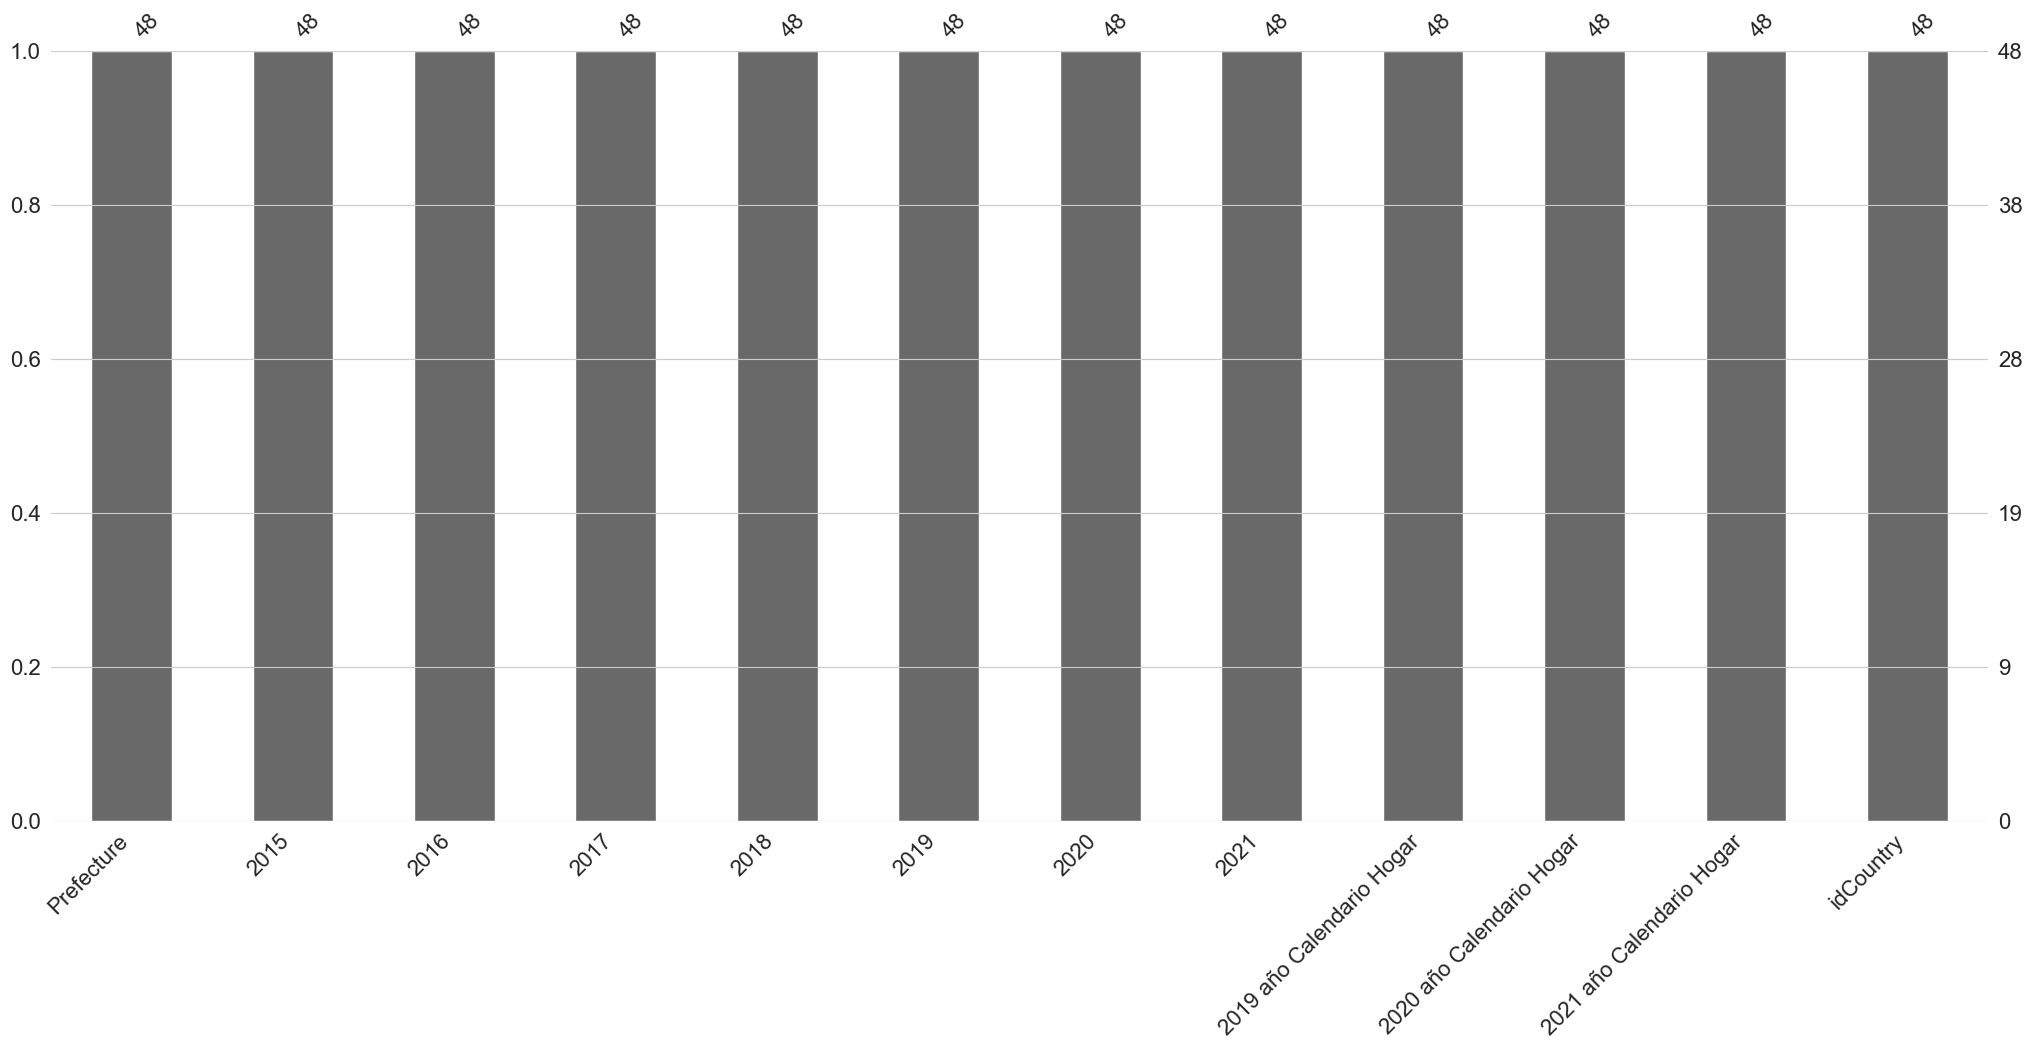

In [562]:
# Observemos los valores faltantes por columna
msno.bar(df_kpi1_hogares)

In [563]:
#no se observan valores faltantes en los datos

In [564]:
# Observamos si hay valores duplicados
df_kpi1_hogares.duplicated().sum()

0

In [565]:
# Top 5 de valores de penetración mas altos desde el 2015 al 2021
df_penetration = df_kpi1_hogares[['Prefecture', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
df_penetration.set_index('Prefecture', inplace=True) # Convertir la columna 'Prefecture' en índice del dataframe
top_prefectures = df_penetration.nlargest(5, ['2015', '2016', '2017', '2018', '2019', '2020', '2021'])
print(top_prefectures)

            2015  2016  2017  2018  2019  2020  2021
Prefecture                                          
Miyagi      86.2  86.4  86.3  86.8  87.0  87.5  88.7
Kochi       84.2  84.8  85.2  86.2  86.8  87.2  87.8
Miyazaki    76.3  79.0  80.3  81.4  83.0  83.7  84.2
Gifu        73.1  74.6  76.1  76.9  77.7  79.3  79.1
Kagoshima   73.0  76.3  78.0  80.3  81.7  83.2  83.6


In [566]:
#se observa que los valores de penetración mas altos estan por encima del 86% en Miyagi

In [567]:
# top 5 de los valores de penetración mas bajos
df_penetration_bajo = df_kpi1_hogares[['Prefecture', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
df_penetration_bajo.set_index('Prefecture', inplace=True)
bottom_prefectures = df_penetration_bajo.nsmallest(5, ['2015', '2016', '2017', '2018', '2019', '2020', '2021'])
print(bottom_prefectures[['2015', '2016', '2017', '2018', '2019', '2020', '2021']])

            2015  2016  2017  2018  2019  2020  2021
Prefecture                                          
Nagasaki    39.2  45.0  47.5  50.1  52.0  53.6  54.4
Saga        44.7  50.1  52.6  55.7  58.4  60.9  62.3
Hokkaido    51.0  52.4  53.3  56.6  59.1  60.6  61.8
Toyama      51.2  54.1  56.1  58.6  60.3  61.8  62.5
Okinawa     51.5  54.2  55.6  56.6  57.6  58.4  58.0


In [568]:
#se encuentra que el indice de penetración mas bajo esta en la prefecture Nagasaki con 54.4% de penetración en el 2021


---

# KPI 2 Reducción de fatalidades en sismos
Este KPI mide la efectividad de la metodología de comunicación preventiva y alertas tempranas en la comunidad para reducir el número de fatalidades en sismos

In [569]:
# Observamos el Datasets Fatalidades.json para el segundo KPI
df_kpi2 = pd.read_json('Datasets/KPI 2/Fatalidades.json')
df_kpi2

idCountry           date                    location  depth  magnitude  \
0            3  1663804800000      Mexico City, Michoacan  24 km        6.8   
1            3  1663545600000  Michoacan, Colima, Jalisco  15 km        7.6   
2            3  1653436800000                      Oaxaca  34 km        5.5   
3            3  1631059200000                    Guerrero  20 km        7.0   
4            3  1592870400000                      Oaxaca  26 km        7.4   
..         ...            ...                         ...    ...        ...   
350          1  -484704000000            Stillwater Range               6.8   
351          1  -488851200000                      Fallon               6.8   
352          1  -547862400000                 Kern County  24 km        5.8   
353          1  -550627200000                 Kern County  14 km        7.7   
354          1  -579571200000                      Hawaii               6.9   

     deaths  
0         3  
1         2  
2         0  
3         3  
4        10  
..      ...  
350       0  
351       0  
352       2  
353      12  
354       0  

[355 rows x 6 columns]

In [570]:
# Con el metodo describe podemos observar que por la informacion dada no se
# encuentra mayor rareza en los datos
df_kpi2.describe()

idCountry          date   magnitude       deaths
count  355.000000  3.550000e+02  355.000000   355.000000
mean     1.805634  7.237937e+11    6.500282    54.270423
std      0.727950  6.122538e+11    1.011809   587.796883
min      1.000000 -6.035040e+11    1.600000     0.000000
25%      1.000000  2.896128e+11    6.000000     0.000000
50%      2.000000  8.110368e+11    6.600000     0.000000
75%      2.000000  1.235477e+12    7.200000     1.500000
max      3.000000  1.671494e+12    9.200000  9500.000000

In [571]:
# Con el metodo info se observa que los datos estan pulcros en cuestion de nulos
# y para los tipos de datos tambien son coherentes
df_kpi2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 354
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idCountry  355 non-null    int64  
 1   date       355 non-null    int64  
 2   location   355 non-null    object 
 3   depth      355 non-null    object 
 4   magnitude  355 non-null    float64
 5   deaths     355 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 19.4+ KB


In [572]:
# Podemos observar con el metodo values_counts que no hay datos raros y
# que para la columna depth hay valores vacios

# iteramos value_counts por columna
for i in df_kpi2.columns:
    print(df_kpi2[i].value_counts())


2    154
1    135
3     66
Name: idCountry, dtype: int64
 1299801600000    3
 709689600000     2
 834364800000     2
 1314057600000    2
-51408000000      2
                 ..
 1102291200000    1
 1102982400000    1
 1106092800000    1
 1111276800000    1
-579571200000     1
Name: date, Length: 347, dtype: int64
Honshu                              9
Sanriku                             7
Oaxaca                              7
Alaska                              7
Hokkaido                            7
                                   ..
Near S. Coast Of Honshu             1
Honshu (N, Aomori, Misawa)          1
Honshu (Ito, Ajiro)                 1
Honshu (Chiba Perfecture, Tokyo)    1
Tokkaido, Oshima                    1
Name: location, Length: 252, dtype: int64
         28
10 km    10
7 km     10
39 km    10
40 km     9
         ..
29 km     1
66 km     1
51 km     1
63 km     1
46 km     1
Name: depth, Length: 62, dtype: int64
6.7    19
6.9    17
7.0    17
6.8    16
7.5    16
7.2  

Text(0.5, 1.0, 'Histograma de intervalos de la escala de Richter')

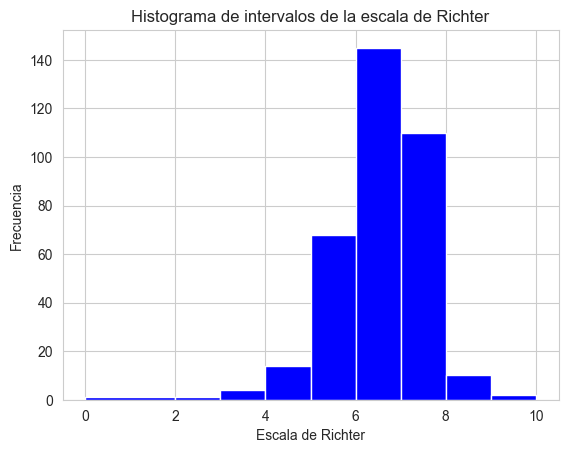

In [573]:
# Aqui podemos observar que la mayoria de los sismos registrados tienen mayor
# tendencia a estar en el rango de magnitud 5 y 8

# Normalizamos la fecha
df_kpi2['date'] = pd.to_datetime(df_kpi2['date'], unit='ms')
df_kpi2_copia = df_kpi2.copy()

# Intervalos de richter
richter_intervals = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Creamos un historgrama para dichos intervalos
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df_kpi2_copia['magnitude'], bins=richter_intervals, color='blue')

ax.set_xlabel('Escala de Richter')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de intervalos de la escala de Richter')

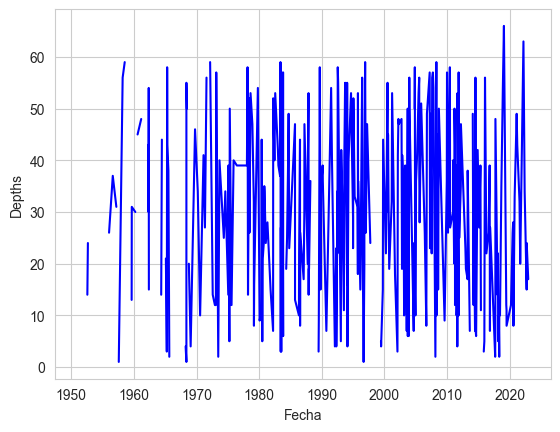

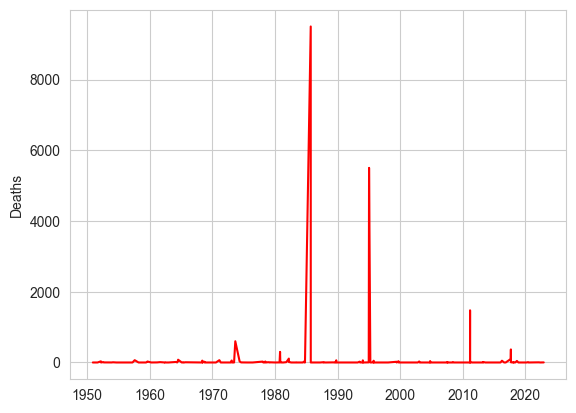

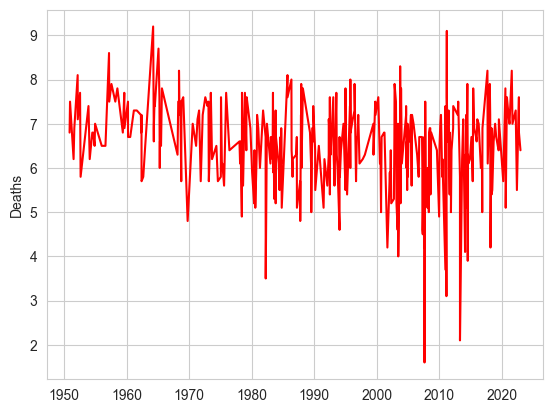

In [574]:
# Aqui podemos observar los distintos tipos de correlaciones entre la profundidad,
# magnitud y numero de muertes, nos podemos fijar que normalmente hay muertes es
# cuando hay profundidad menor a 20 km, y magnitud mayor a 7

df_kpi2_copia['depth'] = df_kpi2_copia['depth'].str.replace(' km', '')
df_kpi2_copia = df_kpi2_copia.sort_values('date')
df_kpi2_copia['depth'] = pd.to_numeric(df_kpi2_copia['depth'], downcast='integer')

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

# Configuramos el primer grafico
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Depths')
ax1.plot(df_kpi2_copia['date'], df_kpi2_copia['depth'], color='blue')

# Configuramos el segundo grafico
ax2.set_ylabel('Deaths')
ax2.plot(df_kpi2_copia['date'], df_kpi2_copia['deaths'], color='red')

# Configuramos el tercer grafico
ax3.set_ylabel('Deaths')
ax3.plot(df_kpi2_copia['date'], df_kpi2_copia['magnitude'], color='red')

# Mostramos el gráfico
plt.show()

In [575]:
# Aqui podemos apreciar los distintos tipos de correlacion, en este caso en una matriz
# de correlacion, podemo ver que la correlacion positiva mas alta es de la magnitud con el pais, las muertes con el pais
# y la muertes con la magnitud hacen sentido de su correlacion
df_kpi2_copia.corr()

C:\Users\Jose J\AppData\Local\Temp\ipykernel_20392\318659300.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kpi2_copia.corr()


idCountry     depth  magnitude    deaths
idCountry   1.000000 -0.027786   0.207563  0.097824
depth      -0.027786  1.000000  -0.067322  0.078212
magnitude   0.207563 -0.067322   1.000000  0.105198
deaths      0.097824  0.078212   0.105198  1.000000

---

# KPI 3 Aumentar la participación ante simulacros sismicos
El objetivo de este KPI es aumentar en un 5% la cantidad de participantes en simulacros para el próximo año.

In [576]:
#Cargamos el dataframe Nro. 1

df_kpi3_simulacros_categorias = pd.read_json('Datasets/KPI 3/Participantes_simulacros_categorias.json')

In [577]:
# En este dataframe podemos observar la cantidad de participantes en simulacro
# por categoria
df_kpi3_simulacros_categorias

Categoria     Valor   Año  idSimulacro
0                 Individuals/Families     40127  2015            1
1            Childcare and Pre-Schools    174239  2015            1
2           K-12 Schools and Districts  29033389  2015            1
3            Colleges and Universities   3622510  2015            1
4                     Local Government    907190  2015            1
..                                 ...       ...   ...          ...
229       Agriculture/Livestock Sector         9  2023            1
230             Volunteer Radio Groups       874  2023            1
231  Science/Engineering Organizations      1513  2023            1
232                Media Organizations       272  2023            1
233                              Other      1759  2023            1

[234 rows x 4 columns]

In [578]:
# Observamos que esta totalmente limpio de nulos y tiene coherencia entre sus dtypes
df_kpi3_simulacros_categorias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Categoria    234 non-null    object
 1   Valor        234 non-null    int64 
 2   Año          234 non-null    int64 
 3   idSimulacro  234 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.1+ KB


In [579]:
# Aqui no se observan irregularidades en los minimos y maximos de los datos
df_kpi3_simulacros_categorias.describe()

Valor          Año  idSimulacro
count  2.340000e+02   234.000000        234.0
mean   1.493023e+06  2019.000000          1.0
std    4.672065e+06     2.587524          0.0
min    9.000000e+00  2015.000000          1.0
25%    8.080250e+03  2017.000000          1.0
50%    3.289050e+04  2019.000000          1.0
75%    5.288132e+05  2021.000000          1.0
max    3.092062e+07  2023.000000          1.0

In [580]:
# Dataframe totalmente limpio
for i in df_kpi3_simulacros_categorias.columns:
    print(df_kpi3_simulacros_categorias[i].value_counts())

Individuals/Families                                9
Childcare and Pre-Schools                           9
Media Organizations                                 9
Science/Engineering Organizations                   9
Volunteer Radio Groups                              9
Agriculture/Livestock Sector                        9
Animal Shelter/Service Providers                    9
Youth Organizations                                 9
Volunteer/Service Clubs                             9
Museums, Libraries, Parks, etc.                     9
Faith-based Organizations                           9
Preparedness Organizations                          9
Neighborhood Groups                                 9
Non-Profit Organizations                            9
Disability/AFN Organizations                        9
Senior Facilities/Communities                       9
Healthcare                                          9
Hotels and Other Lodgings                           9
Businesses                  

In [581]:
# No resulta nada util el buscar correlaciones con un dataframe con tan pocas columnas
df_kpi3_simulacros_categorias.corr()

C:\Users\Jose J\AppData\Local\Temp\ipykernel_20392\78673539.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kpi3_simulacros_categorias.corr()


Valor       Año  idSimulacro
Valor        1.000000 -0.089745          NaN
Año         -0.089745  1.000000          NaN
idSimulacro       NaN       NaN          NaN

In [582]:
df_kpi3_simulacros_categorias.columns

Index(['Categoria', 'Valor', 'Año', 'idSimulacro'], dtype='object')

Año     Valor
0  2015  37284155
1  2016  49797831
2  2017  51621942
3  2018  56323477
4  2019  60335749
5  2020  25050731
6  2021  27889753
7  2022  39777841
8  2023   1286018

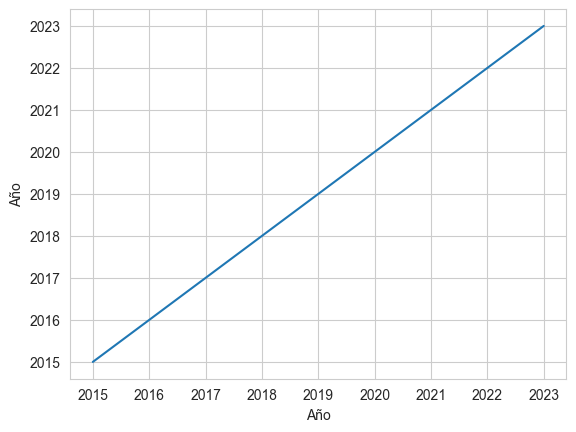

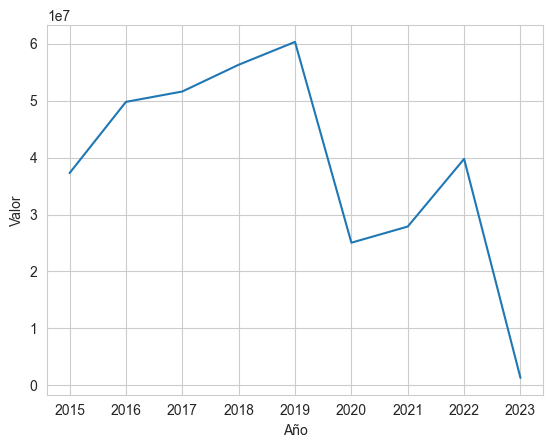

In [583]:
# Aqui podemos observar que en los ultimos 8 años el 2019 fue donde mayor numero de participacion hubo
# y desde entonces a venido una tendencia bajista
data_plot = df_kpi3_simulacros_categorias[['Valor', 'Año']].groupby('Año',as_index=False).agg(sum)

# Graficamos para cada columna con respecto al año
for i in data_plot.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel('Año')
    ax.set_ylabel(i)
    ax.plot(data_plot['Año'],data_plot[i])
data_plot

In [584]:
# Cargamos el DataFrame Nro. 2
df_kpi3_simulacros_paises = pd.read_json('Datasets/KPI 3/Participantes_simulacros_paises.json')

In [585]:
# Aqui podemos observar la cantidad de participantes por pais
df_kpi3_simulacros_paises

pais participantes   año  idCountry  idSimulacro
0    Alaska        126981  2015          1            1
1    Alaska        126833  2016          1            1
2    Alaska        126395  2017          1            1
3    Alaska        140632  2018          1            1
4    Alaska        176560  2019          1            1
..      ...           ...   ...        ...          ...
123  Mexico     8,731,167  2018          3            1
124  Mexico     9,730,616  2019          3            1
125  Mexico           297  2020          3            1
126  Mexico     5,071,926  2021          3            1
127  Mexico     6,003,647  2022          3            1

[128 rows x 5 columns]

In [586]:
df_kpi3_simulacros_paises['participantes'] = df_kpi3_simulacros_paises['participantes'].str.replace(',','')
df_kpi3_simulacros_paises

pais participantes   año  idCountry  idSimulacro
0    Alaska        126981  2015          1            1
1    Alaska        126833  2016          1            1
2    Alaska        126395  2017          1            1
3    Alaska        140632  2018          1            1
4    Alaska        176560  2019          1            1
..      ...           ...   ...        ...          ...
123  Mexico       8731167  2018          3            1
124  Mexico       9730616  2019          3            1
125  Mexico           297  2020          3            1
126  Mexico       5071926  2021          3            1
127  Mexico       6003647  2022          3            1

[128 rows x 5 columns]

In [587]:
# DataFrame totalmente limpio, algo que resulta muy bueno, exceptuando por
# el dtype de la columna participantes
df_kpi3_simulacros_paises.info()
df_kpi3_simulacros_paises['participantes'] = pd.to_numeric(df_kpi3_simulacros_paises['participantes'],downcast='integer')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pais           128 non-null    object
 1   participantes  128 non-null    object
 2   año            128 non-null    int64 
 3   idCountry      128 non-null    int64 
 4   idSimulacro    128 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.0+ KB


In [588]:
df_kpi3_simulacros_paises.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pais           128 non-null    object
 1   participantes  128 non-null    int32 
 2   año            128 non-null    int64 
 3   idCountry      128 non-null    int64 
 4   idSimulacro    128 non-null    int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 5.5+ KB


In [589]:
# No podemos observar la columna mas importante por el posible error en participantes
df_kpi3_simulacros_paises.describe()

participantes          año   idCountry  idSimulacro
count   1.280000e+02   128.000000  128.000000        128.0
mean    1.468305e+06  2018.500000    1.187500          1.0
std     2.849623e+06     2.300291    0.528704          0.0
min     2.970000e+02  2015.000000    1.000000          1.0
25%     3.221075e+04  2016.750000    1.000000          1.0
50%     1.269070e+05  2018.500000    1.000000          1.0
75%     9.817690e+05  2020.250000    1.000000          1.0
max     1.084908e+07  2022.000000    3.000000          1.0

In [590]:
# Toda la informacion esta muy limpia tambien
for i in df_kpi3_simulacros_paises.columns:
    print(df_kpi3_simulacros_paises[i].value_counts())

Alaska              8
Arizona             8
California          8
Colorado            8
Hawaii              8
Idaho               8
Montana             8
Nevada              8
New Mexico          8
Oregon              8
Texas               8
Utah                8
Washington State    8
Wyoming             8
Japan               8
Mexico              8
Name: pais, dtype: int64
732982     2
126981     1
32463      1
664986     1
1020036    1
          ..
22787      1
42624      1
85231      1
66629      1
6003647    1
Name: participantes, Length: 127, dtype: int64
2015    16
2016    16
2017    16
2018    16
2019    16
2020    16
2021    16
2022    16
Name: año, dtype: int64
1    112
2      8
3      8
Name: idCountry, dtype: int64
1    128
Name: idSimulacro, dtype: int64


In [591]:
# Podemos ver un poco de correlacion con el pais y la cantidad de participantes, lo que nos puede indicar
# que hay paises mas propensos a participar
df_kpi3_simulacros_paises.corr()

C:\Users\Jose J\AppData\Local\Temp\ipykernel_20392\3399967299.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kpi3_simulacros_paises.corr()


participantes           año     idCountry  idSimulacro
participantes       1.000000 -2.187997e-02  4.373743e-01          NaN
año                -0.021880  1.000000e+00 -2.345606e-14          NaN
idCountry           0.437374 -2.345606e-14  1.000000e+00          NaN
idSimulacro              NaN           NaN           NaN          NaN

In [592]:
df_kpi3_simulacros_paises.columns

Index(['pais', 'participantes', 'año', 'idCountry', 'idSimulacro'], dtype='object')

año  participantes
0  2015       20563773
1  2016       21449128
2  2017       29024962
3  2018       29678014
4  2019       31893353
5  2020       12744462
6  2021       18368224
7  2022       24221117

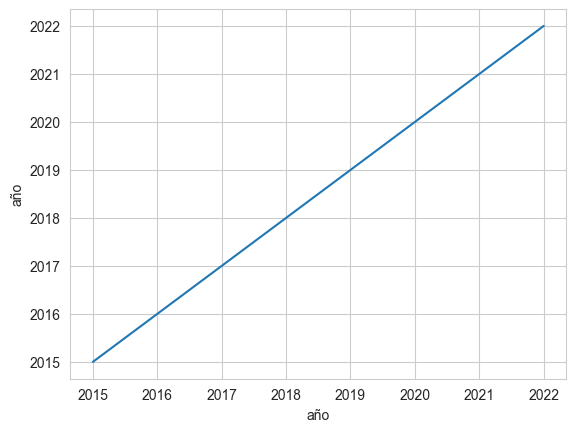

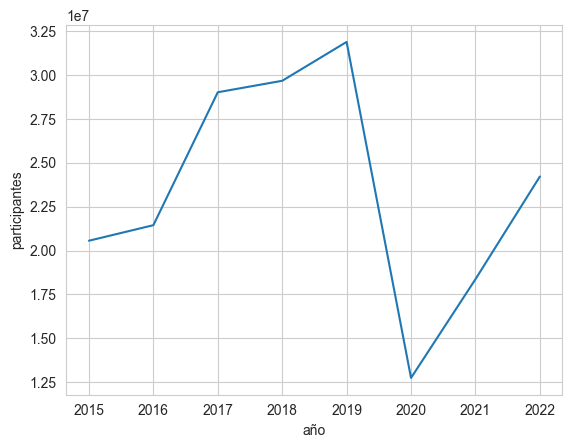

In [593]:
# Se observa un comportamiento parecido con respecto a los participantes y los participantes de las
# categorias
data_plot = df_kpi3_simulacros_paises[['participantes', 'año']].groupby('año',as_index=False).agg(sum)

# Graficamos para cada columna con respecto al año
for i in data_plot.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel('año')
    ax.set_ylabel(i)
    ax.plot(data_plot['año'],data_plot[i])
data_plot

---

# KPI 4 Aumentar la adquisición de  seguros de vida con cobertura en riesgo sísmico
Aumentar en un 15% el número de personas que estén cubiertas por seguros que protejan contra riesgo sísmico en un plazo de 1 año, comparando el número actual de personas aseguradas con el número de habitantes en la zona de alto riesgo sísmico. 

In [594]:
#Cargamos los dataframes

# Observamos el DF Nro. 1
df_kpi4_polizas_de_vida = pd.read_csv('Datasets_csv/seguros_vida_japon1_(kpi4).csv')
df_kpi4_polizas_de_vida.tail(6)

Año fiscal                                     Tipo de Seguro  \
30        2021          Seguro Ordinario de Accidentes Personales   
31        2021   Seguro de Accidentes Personales de Tipo Familiar   
32        2021         Seguro de Accidentes Personales de Tráfico   
33        2021  Seguro de accidentes personales de tráfico de ...   
34        2021  Seguro de accidentes personales para viajeros ...   
35        2021  Seguro de accidentes personales para viajeros ...   

    Cantidad de Polizas  \
30              4092178   
31               340383   
32              1529360   
33               352971   
34               428351   
35                83613   

    Numero de personas nuevas aseguradas para accidentes personales  \
30                                           23411228                 
31                                            1959327                 
32                                            5705939                 
33                                             749457                 
34                                            1646059                 
35                                              95797                 

    Valor de la prima en miles de Yen  Numero de reclamos pagados  \
30                          180002396                      617040   
31                           44858307                      298502   
32                           10827923                       21944   
33                            6412728                       16762   
34                             493518                        1884   
35                            7981879                       31755   

    Reclamos pagados en miles de Yen  idCountry  
30                          67836103          2  
31                          21443593          2  
32                           3477256          2  
33                           2032099          2  
34                            244141          2  
35                           5282789          2

---

In [595]:
# Con el metodo describe podemos verificar que todo esta en orden
# no hay datos extraños
df_kpi4_polizas_de_vida.describe()

Año fiscal  Cantidad de Polizas  \
count    36.000000         3.600000e+01   
mean   2018.500000         1.414200e+06   
std       1.732051         1.293130e+06   
min    2016.000000         2.330900e+04   
25%    2017.000000         3.342852e+05   
50%    2018.500000         9.976505e+05   
75%    2020.000000         2.831368e+06   
max    2021.000000         4.092178e+06   

       Numero de personas nuevas aseguradas para accidentes personales  \
count                                       3.600000e+01                 
mean                                        6.821176e+06                 
std                                         7.812580e+06                 
min                                         2.569500e+04                 
25%                                         1.532331e+06                 
50%                                         4.324386e+06                 
75%                                         7.314359e+06                 
max                                         2.386047e+07                 

       Valor de la prima en miles de Yen  Numero de reclamos pagados  \
count                       3.600000e+01                   36.000000   
mean                        4.460463e+07               178962.722222   
std                         6.135823e+07               225780.287216   
min                         3.701080e+05                 1884.000000   
25%                         7.883064e+06                19058.500000   
50%                         1.311016e+07                29462.500000   
75%                         4.972408e+07               312540.250000   
max                         1.800024e+08               669998.000000   

       Reclamos pagados en miles de Yen  idCountry  
count                      3.600000e+01       36.0  
mean                       1.975041e+07        2.0  
std                        2.658500e+07        0.0  
min                        2.441410e+05        2.0  
25%                        2.756708e+06        2.0  
50%                        5.269513e+06        2.0  
75%                        2.499107e+07        2.0  
max                        7.953128e+07        2.0

In [596]:
# Con el metodo info podemos apreciar que es un dataset corto
# y por lo tanto bastante limpio
df_kpi4_polizas_de_vida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Año fiscal                                                       36 non-null     int64 
 1   Tipo de Seguro                                                   36 non-null     object
 2   Cantidad de Polizas                                              36 non-null     int64 
 3   Numero de personas nuevas aseguradas para accidentes personales  36 non-null     int64 
 4   Valor de la prima en miles de Yen                                36 non-null     int64 
 5   Numero de reclamos pagados                                       36 non-null     int64 
 6   Reclamos pagados en miles de Yen                                 36 non-null     int64 
 7   idCountry                                               

In [597]:
# Con esta iteracion podemos aprecias que los valores para cada fila estanen orden
# no hay valores vacios ni incoherentes
for i in df_kpi4_polizas_de_vida.columns:
    print(df_kpi4_polizas_de_vida[i].value_counts())

2016    6
2017    6
2018    6
2019    6
2020    6
2021    6
Name: Año fiscal, dtype: int64
Seguro Ordinario de Accidentes Personales                      6
Seguro de Accidentes Personales de Tipo Familiar               6
Seguro de Accidentes Personales de Tráfico                     6
Seguro de accidentes personales de tráfico de tipo familiar    6
Seguro de accidentes personales para viajeros nacionales       6
Seguro de accidentes personales para viajeros extranjeros      6
Name: Tipo de Seguro, dtype: int64
2867418    1
272120     1
1584006    1
337563     1
1038247    1
2819352    1
3767991    1
344636     1
1615406    1
383559     1
349554     1
23309      1
4092178    1
340383     1
1529360    1
352971     1
428351     1
324452     1
3611769    1
3148050    1
1510849    1
1493117    1
234503     1
832938     1
3505066    1
2926685    1
273409     1
266667     1
1185279    1
957054     1
3036818    1
3231817    1
299290     1
1543428    1
299978     1
83613      1
Name: Cantidad d

In [598]:
# Podemos observar aqui con la matriz de correlacion algo que nos hace mucho sentido y es que la mayoria
# de las columnas estan bastantes correlacionadas positivamente entre si, exceptuando por el año fiscal y el idCountry
df_kpi4_polizas_de_vida.corr()

C:\Users\Jose J\AppData\Local\Temp\ipykernel_20392\1737674152.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kpi4_polizas_de_vida.corr()


Año fiscal  \
Año fiscal                                            1.000000   
Cantidad de Polizas                                  -0.123387   
Numero de personas nuevas aseguradas para accid...   -0.096010   
Valor de la prima en miles de Yen                    -0.025448   
Numero de reclamos pagados                           -0.025089   
Reclamos pagados en miles de Yen                     -0.068013   
idCountry                                                  NaN   

                                                    Cantidad de Polizas  \
Año fiscal                                                    -0.123387   
Cantidad de Polizas                                            1.000000   
Numero de personas nuevas aseguradas para accid...             0.794196   
Valor de la prima en miles de Yen                              0.691641   
Numero de reclamos pagados                                     0.581073   
Reclamos pagados en miles de Yen                               0.659734   
idCountry                                                           NaN   

                                                    Numero de personas nuevas aseguradas para accidentes personales  \
Año fiscal                                                                                  -0.096010                 
Cantidad de Polizas                                                                          0.794196                 
Numero de personas nuevas aseguradas para accid...                                           1.000000                 
Valor de la prima en miles de Yen                                                            0.900288                 
Numero de reclamos pagados                                                                   0.789312                 
Reclamos pagados en miles de Yen                                                             0.877498                 
idCountry                                                                                         NaN                 

                                                    Valor de la prima en miles de Yen  \
Año fiscal                                                                  -0.025448   
Cantidad de Polizas                                                          0.691641   
Numero de personas nuevas aseguradas para accid...                           0.900288   
Valor de la prima en miles de Yen                                            1.000000   
Numero de reclamos pagados                                                   0.966796   
Reclamos pagados en miles de Yen                                             0.993111   
idCountry                                                                         NaN   

                                                    Numero de reclamos pagados  \
Año fiscal                                                           -0.025089   
Cantidad de Polizas                                                   0.581073   
Numero de personas nuevas aseguradas para accid...                    0.789312   
Valor de la prima en miles de Yen                                     0.966796   
Numero de reclamos pagados                                            1.000000   
Reclamos pagados en miles de Yen                                      0.973734   
idCountry                                                                  NaN   

                                                    Reclamos pagados en miles de Yen  \
Año fiscal                                                                 -0.068013   
Cantidad de Polizas                                                         0.659734   
Numero de personas nuevas aseguradas para accid...                          0.877498   
Valor de la prima en miles de Yen                                           0.993111   
Numero de reclamos pagados                                                  0.973734   
Reclamos pagados en miles de Yen                                       

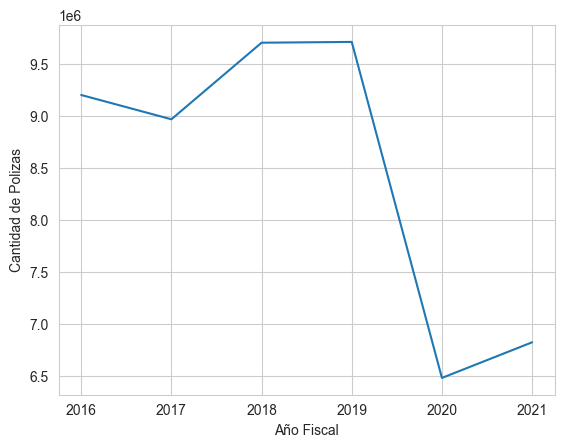

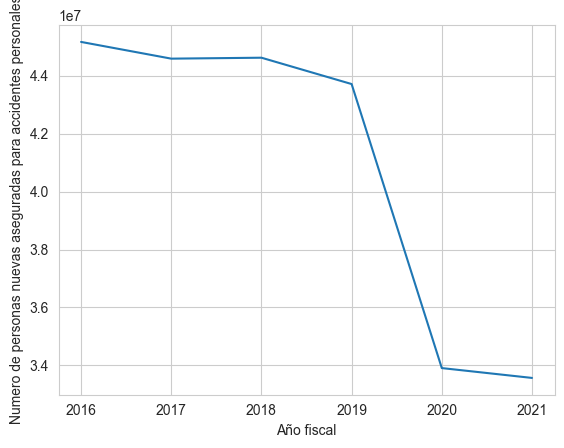

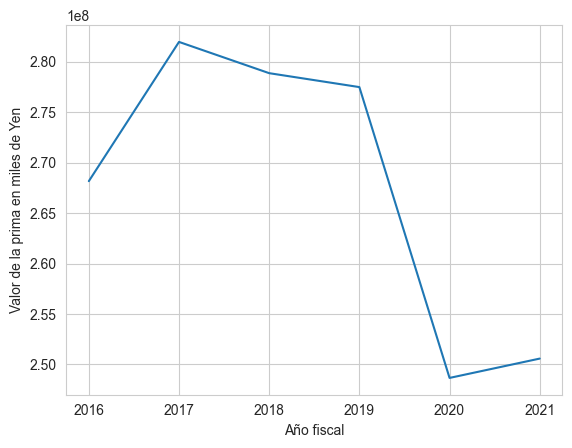

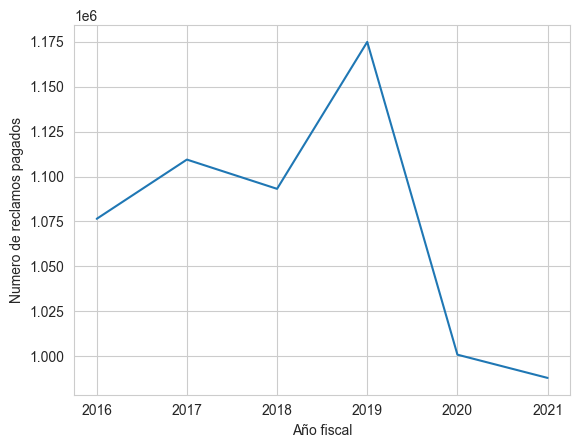

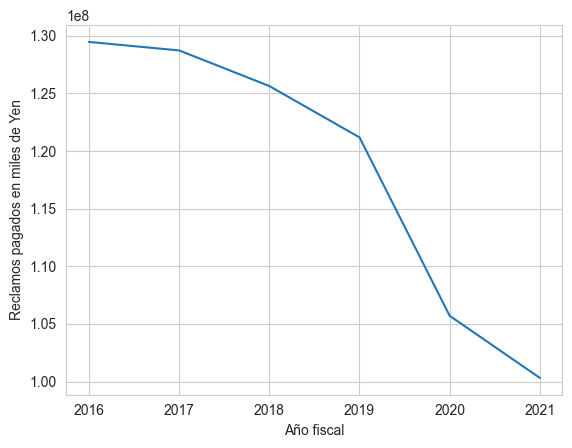

In [599]:
# Aqui podemos ver que para el 2020 hubo una disminucion en torno a la cantidad de todas las columnas numericas
# 

# Agrupamos por la suma de polizas al año
plot_data = df_kpi4_polizas_de_vida[['Año fiscal', 'Cantidad de Polizas','Numero de personas nuevas aseguradas para accidentes personales','Valor de la prima en miles de Yen','Numero de reclamos pagados','Reclamos pagados en miles de Yen']].groupby('Año fiscal',as_index=False).agg(sum)

# Hacemos el plot para ver el comportamiento de cada columna con respecto al año fiscal
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
ax1.set_ylabel('Cantidad de Polizas')
ax1.set_xlabel('Año Fiscal')
ax1.plot(plot_data['Año fiscal'], plot_data['Cantidad de Polizas'])

ax2.set_ylabel('Numero de personas nuevas aseguradas para accidentes personales')
ax2.set_xlabel('Año fiscal')
ax2.plot(plot_data['Año fiscal'], plot_data['Numero de personas nuevas aseguradas para accidentes personales'])

ax3.set_ylabel('Valor de la prima en miles de Yen')
ax3.set_xlabel('Año fiscal')
ax3.plot(plot_data['Año fiscal'], plot_data['Valor de la prima en miles de Yen'])

ax4.set_ylabel('Numero de reclamos pagados')
ax4.set_xlabel('Año fiscal')
ax4.plot(plot_data['Año fiscal'], plot_data['Numero de reclamos pagados'])

ax5.set_ylabel('Reclamos pagados en miles de Yen')
ax5.set_xlabel('Año fiscal')
ax5.plot(plot_data['Año fiscal'], plot_data['Reclamos pagados en miles de Yen'])

In [600]:
# Observamos el DF Nro. 2
df_kpi4_nuevos_contratos_ordinarios = pd.read_csv('Datasets_csv/seguros_vida_japon2_(kpi4).csv')
df_kpi4_nuevos_contratos_ordinarios.columns
df_kpi4_nuevos_contratos_ordinarios.rename(columns={'Monto asegurado en Million Yen ' : 'Muerte o discapacidad posterior al accidente Monto asegurado en Million Yen',
       'Prima o cuota del seguro en miles de yen' :'Muerte o discapacidad posterior al accidente Prima o cuota del seguro en miles de yen',
       'No de Asegurados' : 'Hospitalización No de Asegurados',
       'Monto diario de seguro en Miles de Yen ' : 'Hospitalización Monto diario de seguro en Miles de Yen',
       'Primas Escritas Thousand Yen ' : 'Hospitalización Primas Escritas Thousand Yen',
         'No de Asegurados.1' : 'Visita ambulatoria No de Asegurados',
       'Cantidad de asegurados por dia Thousand Yen ' : 'Visita ambulatoria Cantidad de asegurados por dia Thousand Yen',
       'primas escritas Thousand Yen ' : 'Visita ambulatoria Primas Escritas Thousand Yen'},inplace=True)

In [601]:
# Observamos
df_kpi4_nuevos_contratos_ordinarios

Clase de ocupación  No de Polizas  \
0                                     Clase A         422559   
1                                     Clase B          82105   
2     Contrato aplicado al promedio ponderado        3579086   
3   Sin covertura de accidnete no ocupacional           8428   
4                                     Clase A         799844   
5                                     Clase B         117103   
6     Contrato aplicado al promedio ponderado        2834240   
7   Sin covertura de accidnete no ocupacional          16804   
8                                     Clase A         842385   
9                                     Clase B         125710   
10    Contrato aplicado al promedio ponderado        2625671   
11  Sin covertura de accidnete no ocupacional          18003   

    Muerte o discapacidad posterior al accidente No de Asegurados  \
0                                             5720506               
1                                              472719               
2                                            13890042               
3                                              570781               
4                                             6668831               
5                                              537431               
6                                            13046439               
7                                              581706               
8                                             6977077               
9                                              600090               
10                                           12952793               
11                                             593398               

    Muerte o discapacidad posterior al accidente Monto asegurado en Million Yen  \
0                                            26234887                             
1                                             2686584                             
2                                            55614160                             
3                                             3743596                             
4                                            28987534                             
5                                             3022152                             
6                                            53177143                             
7                                             3831332                             
8                                            30820823                             
9                                             3476480                             
10                                           55559580                             
11                                            3856711                             

    Muerte o discapacidad posterior al accidente Prima o cuota del seguro en miles de yen  \
0                                            17356297                                       
1                                             2649981                                       
2                                            49662554                                       
3                                             1576600                                       
4                                            19860663                                       
5                                             3140868                                       
6                                            47763845                                       
7                                             1584966                                       
8                                            21028140                                       
9                                             3320751                                       
10                                           48217467                                       
11                                            1436213                                       

    Ho

In [602]:
# Obsevamos con el metodo info que el dataframe esta bastante limpio
df_kpi4_nuevos_contratos_ordinarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Clase de ocupación                                                                     12 non-null     object
 1   No de Polizas                                                                          12 non-null     int64 
 2   Muerte o discapacidad posterior al accidente No de Asegurados                          12 non-null     int64 
 3   Muerte o discapacidad posterior al accidente Monto asegurado en Million Yen            12 non-null     int64 
 4   Muerte o discapacidad posterior al accidente Prima o cuota del seguro en miles de yen  12 non-null     int64 
 5   Hospitalización No de Asegurados                                                       

In [603]:
df_kpi4_nuevos_contratos_ordinarios.describe()

No de Polizas  \
count   1.200000e+01   
mean    9.559948e+05   
std     1.291041e+06   
min     8.428000e+03   
25%     6.607950e+04   
50%     2.741345e+05   
75%     1.288206e+06   
max     3.579086e+06   

       Muerte o discapacidad posterior al accidente No de Asegurados  \
count                                       1.200000e+01               
mean                                        5.217651e+06               
std                                         5.493772e+06               
min                                         4.727190e+05               
25%                                         5.789748e+05               
50%                                         3.160298e+06               
75%                                         8.471006e+06               
max                                         1.389004e+07               

       Muerte o discapacidad posterior al accidente Monto asegurado en Million Yen  \
count                                       1.200000e+01                             
mean                                        2.258425e+07                             
std                                         2.223328e+07                             
min                                         2.686584e+06                             
25%                                         3.676817e+06                             
50%                                         1.504580e+07                             
75%                                         3.640990e+07                             
max                                         5.561416e+07                             

       Muerte o discapacidad posterior al accidente Prima o cuota del seguro en miles de yen  \
count                                       1.200000e+01                                       
mean                                        1.813320e+07                                       
std                                         1.977089e+07                                       
min                                         1.436213e+06                                       
25%                                         2.383727e+06                                       
50%                                         1.033852e+07                                       
75%                                         2.771207e+07                                       
max                                         4.966255e+07                                       

       Hospitalización No de Asegurados  \
count                      1.200000e+01   
mean                       4.035041e+06   
std                        4.259482e+06   
min                        3.586630e+05   
25%                        3.964560e+05   
50%                        2.440735e+06   
75%                        6.597610e+06   
max                        1.048693e+07   

       Hospitalización Monto diario de seguro en Miles de Yen  \
count                                       1.200000e+01        
mean                                        1.895527e+07        
std                                         2.093345e+07        
min                                         1.728985e+06        
25%                                         2.271500e+06        
50%                                         1.030987e+07        
75%                                         2.898348e+07        
max                                         5.251092e+07        

       Hospitalización Primas Escritas Thousand Yen  \
count                                  1.200000e+01   
mean                                   1.295647e+07   
std                                    1.662516e+07   
min                                    7.420950e+05   
25%                                    1.053061e+06   
50%                                    5.095351e+06   
75%                                    1.763392e+07   
max                                    4.238459e+07   

       Visita ambulatoria No de

In [604]:
# Con esta iteracion podemos observar que para cada columna hay una coherencia de datos, no hay datos vacios
# y dan la impresion de estar bien

for i in df_kpi4_nuevos_contratos_ordinarios.columns:
    print(df_kpi4_nuevos_contratos_ordinarios[i].value_counts())

Clase A                                      3
Clase B                                      3
Contrato aplicado al promedio ponderado      3
Sin covertura de accidnete no ocupacional    3
Name: Clase de ocupación, dtype: int64
422559     1
82105      1
3579086    1
8428       1
799844     1
117103     1
2834240    1
16804      1
842385     1
125710     1
2625671    1
18003      1
Name: No de Polizas, dtype: int64
5720506     1
472719      1
13890042    1
570781      1
6668831     1
537431      1
13046439    1
581706      1
6977077     1
600090      1
12952793    1
593398      1
Name: Muerte o discapacidad posterior al accidente No de Asegurados, dtype: int64
26234887    1
2686584     1
55614160    1
3743596     1
28987534    1
3022152     1
53177143    1
3831332     1
30820823    1
3476480     1
55559580    1
3856711     1
Name: Muerte o discapacidad posterior al accidente Monto asegurado en Million Yen, dtype: int64
17356297    1
2649981     1
49662554    1
1576600     1
19860663    1

In [605]:
# Con esta matriz de correlacion podemos observar que toda la data esta muy correlacionada positivamente
df_kpi4_nuevos_contratos_ordinarios.corr(numeric_only=True)

No de Polizas  \
No de Polizas                                            1.000000   
Muerte o discapacidad posterior al accidente No...       0.957128   
Muerte o discapacidad posterior al accidente Mo...       0.943711   
Muerte o discapacidad posterior al accidente Pr...       0.974811   
Hospitalización No de Asegurados                         0.950474   
Hospitalización Monto diario de seguro en Miles...       0.973884   
Hospitalización Primas Escritas Thousand Yen             0.992754   
Visita ambulatoria No de Asegurados                      0.882471   
Visita ambulatoria Cantidad de asegurados por d...       0.897740   
Visita ambulatoria Primas Escritas Thousand Yen          0.932606   
Total primas escritas Thousand Yen                       0.979260   
Ano                                                      0.039667   
idCountry                                                     NaN   

                                                    Muerte o discapacidad posterior al accidente No de Asegurados  \
No de Polizas                                                                                0.957128               
Muerte o discapacidad posterior al accidente No...                                           1.000000               
Muerte o discapacidad posterior al accidente Mo...                                           0.998764               
Muerte o discapacidad posterior al accidente Pr...                                           0.994504               
Hospitalización No de Asegurados                                                             0.999338               
Hospitalización Monto diario de seguro en Miles...                                           0.995036               
Hospitalización Primas Escritas Thousand Yen                                                 0.969499               
Visita ambulatoria No de Asegurados                                                          0.977503               
Visita ambulatoria Cantidad de asegurados por d...                                           0.983458               
Visita ambulatoria Primas Escritas Thousand Yen                                              0.989841               
Total primas escritas Thousand Yen                                                           0.994957               
Ano                                                                                         -0.009106               
idCountry                                                                                         NaN               

                                                    Muerte o discapacidad posterior al accidente Monto asegurado en Million Yen  \
No de Polizas                                                                                0.943711                             
Muerte o discapacidad posterior al accidente No...                                           0.998764                             
Muerte o discapacidad posterior al accidente Mo...                                           1.000000                             
Muerte o discapacidad posterior al accidente Pr...                                           0.990915                             
Hospitalización No de Asegurados                                                             0.999526                             
Hospitalización Monto diario de seguro en Miles...                                           0.992041                             
Hospitalización Primas Escritas Thousand Yen                                                 0.960483                             
Visita ambulatoria No de Asegurados                                                          0.982775                             
Visita ambulatoria Cantidad de asegurados por d...                                           0.987264                             
Visita ambulatoria Primas Escritas Thousand Yen                                              0.988798                             
Total

Ano  No de Polizas  \
0  2019        3611769   
1  2020        3767991   
2  2021        4092178   

   Muerte o discapacidad posterior al accidente No de Asegurados  \
0                                           21123358               
1                                           20834407               
2                                           20654048               

   Muerte o discapacidad posterior al accidente Monto asegurado en Million Yen  \
0                                           93713594                             
1                                           89018161                             
2                                           88279227                             

   Muerte o discapacidad posterior al accidente Prima o cuota del seguro en miles de yen  \
0                                           74002571                                       
1                                           72350342                                       
2                                           71245432                                       

   Hospitalización No de Asegurados  \
0                          16710897   
1                          16065703   
2                          15643896   

   Hospitalización Monto diario de seguro en Miles de Yen  \
0                                           77944042        
1                                           74725672        
2                                           74793567        

   Hospitalización Primas Escritas Thousand Yen  \
0                                      51234098   
1                                      51254985   
2                                      52988517   

   Visita ambulatoria No de Asegurados  \
0                             11991936   
1                             11418159   
2                             11144667   

   Visita ambulatoria Cantidad de asegurados por dia Thousand Yen  \
0                                           27001485                
1                                           25753519                
2                                           25503401                

   Visita ambulatoria Primas Escritas Thousand Yen  \
0                                         54147403   
1                                         54469555   
2                                         55768441   

   Total primas escritas Thousand Yen   
0                            179384077  
1                            178074885  
2                            180002394

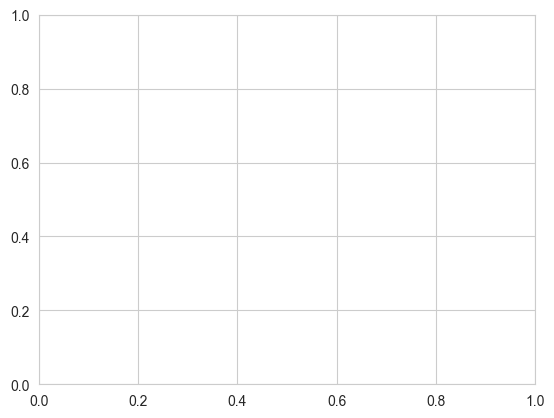

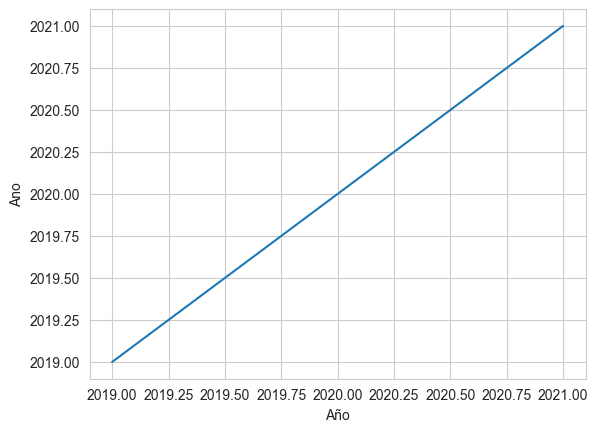

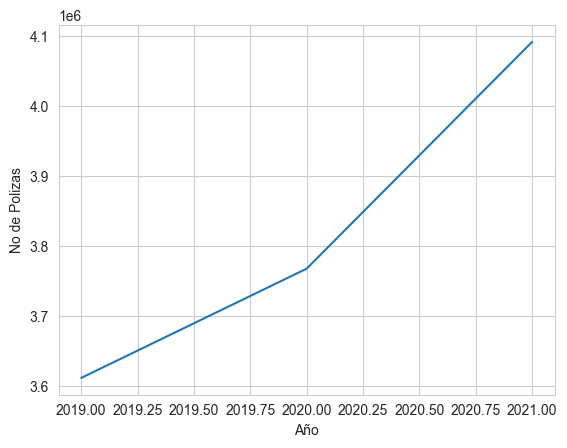

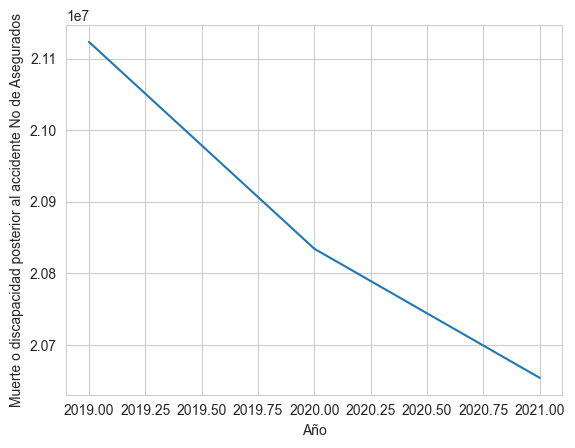

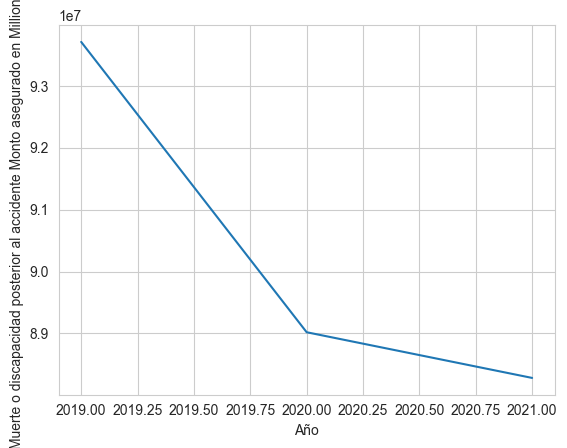

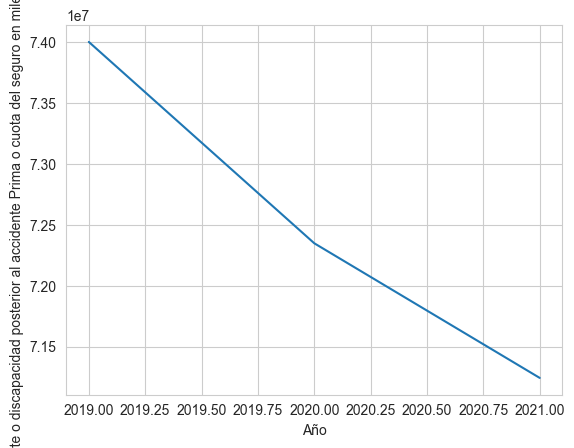

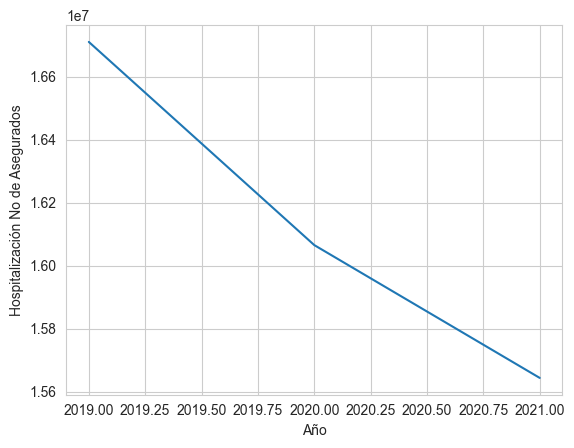

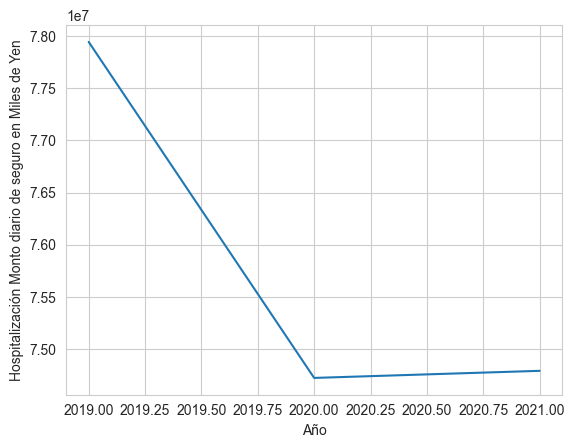

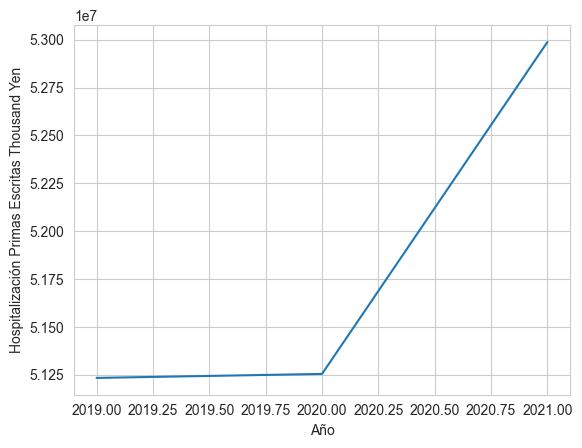

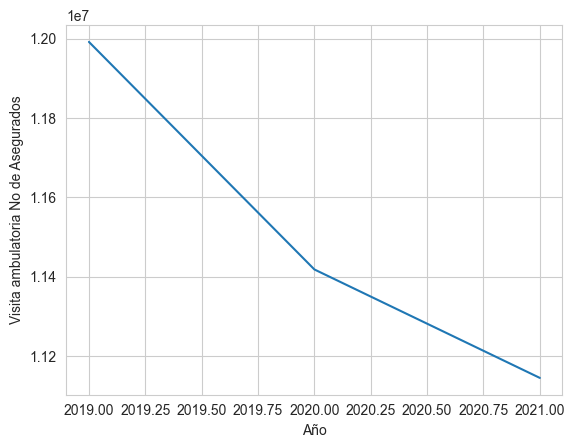

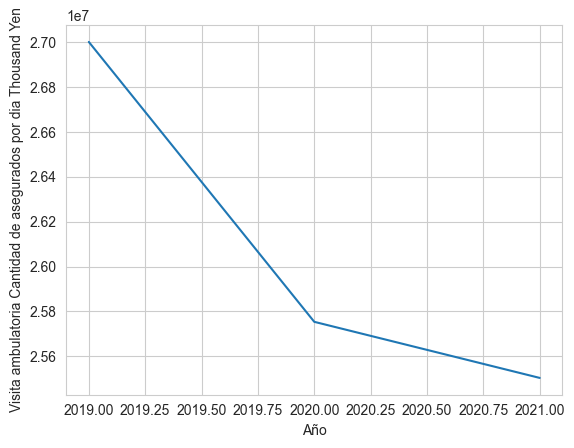

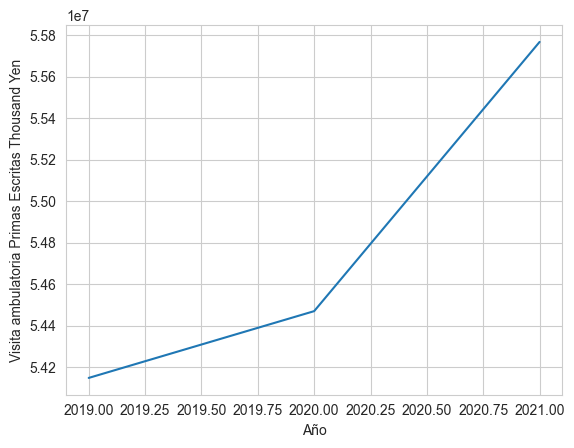

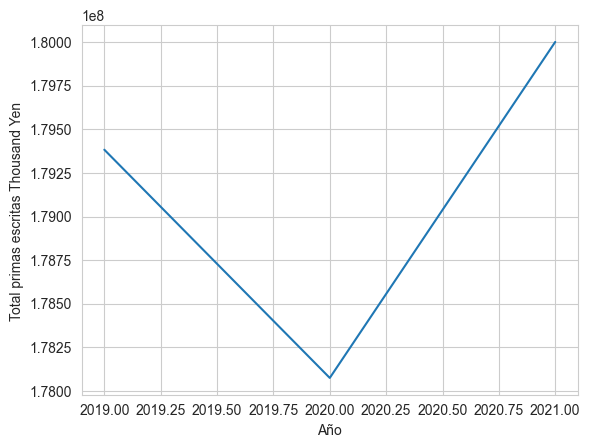

In [606]:
# En esta ocacion podemos observar que la mayoria de la columnas a travez de los años fueron decayendo
# exceptuando algunas de primas escritas y nro de polizas

# Agrupamos por año cada columna
fig, ax = plt.subplots()
data_plot = df_kpi4_nuevos_contratos_ordinarios[['No de Polizas',
       'Muerte o discapacidad posterior al accidente No de Asegurados',
       'Muerte o discapacidad posterior al accidente Monto asegurado en Million Yen',
       'Muerte o discapacidad posterior al accidente Prima o cuota del seguro en miles de yen',
       'Hospitalización No de Asegurados',
       'Hospitalización Monto diario de seguro en Miles de Yen',
       'Hospitalización Primas Escritas Thousand Yen',
       'Visita ambulatoria No de Asegurados',
       'Visita ambulatoria Cantidad de asegurados por dia Thousand Yen',
       'Visita ambulatoria Primas Escritas Thousand Yen',
       'Total primas escritas Thousand Yen ', 'Ano']].groupby('Ano',as_index=False).agg(sum)

# Graficamos para cada columna con respecto al año
for i in data_plot.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel('Año')
    ax.set_ylabel(i)
    ax.plot(data_plot['Ano'],data_plot[i])
data_plot

In [607]:
# Observemos el DataFrame Nro. 3
 
df_kpi4_reclamos_tipo_ordinarios = pd.read_csv('Datasets_csv/seguros_vida_japon3_(kpi4).csv')
df_kpi4_reclamos_tipo_ordinarios

Clase de ocupación  \
0                                     Clase A   
1                                     Clase B   
2     Contrato aplicado al promedio ponderado   
3   Sin covertura de accidnete no ocupacional   
4                                     Clase A   
5                                     Clase B   
6     Contrato aplicado al promedio ponderado   
7   Sin covertura de accidnete no ocupacional   
8                                     Clase A   
9                                     Clase B   
10    Contrato aplicado al promedio ponderado   
11  Sin covertura de accidnete no ocupacional   

    Cantidad Pagos de reclamaciones por muerte   Reclamos pagados por muerte  \
0                                           568                      2608280   
1                                            57                       439551   
2                                          2689                      7817789   
3                                             5                         8559   
4                                           631                      3252942   
5                                            80                       676123   
6                                          2457                      7563776   
7                                            10                        32298   
8                                           689                      3179148   
9                                            71                       488016   
10                                         2472                      7853487   
11                                           13                        40409   

    Cantidad Pagos de reclamos por inhabilidad permanente  \
0                                                3590       
1                                                 521       
2                                               10430       
3                                                 348       
4                                                4018       
5                                                 626       
6                                               11653       
7                                                 343       
8                                                4354       
9                                                 619       
10                                              12481       
11                                                390       

    Reclamos pagados por Inabilidad Permanente  \
0                                      4430708   
1                                       991732   
2                                      9936437   
3                                       353948   
4                                      5032650   
5                                      1210634   
6                                     10754590   
7                                       377602   
8                                      5975296   
9                                      1273985   
10                                    11399685   
11                                      449290   

    Cantidad Reclamos por Hospitalización  \
0                                   24228   
1                                    1855   
2                                   76547   
3                                     954   
4                                   25875   
5                                    2094   
6                                   75192   
7                                     918   
8                                   28130   
9                                    2378   
10                                  75518   
11                                    978   

    Pagos reclamaciones por hospitalización  \
0                                   2995234   
1                                    346385   
2                                  10750517   
3                                    110739   
4                                   3353411   
5                                  

In [608]:
#Podemos observar que el dataFrame es corto y limpio de nulos 

df_kpi4_reclamos_tipo_ordinarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Clase de ocupación                                     12 non-null     object
 1   Cantidad Pagos de reclamaciones por muerte             12 non-null     int64 
 2   Reclamos pagados por muerte                            12 non-null     int64 
 3   Cantidad Pagos de reclamos por inhabilidad permanente  12 non-null     int64 
 4   Reclamos pagados por Inabilidad Permanente             12 non-null     int64 
 5   Cantidad Reclamos por Hospitalización                  12 non-null     int64 
 6   Pagos reclamaciones por hospitalización                12 non-null     int64 
 7   Cantidad de reclamaciones pagadas por cirugia          12 non-null     int64 
 8   Pagos por cirugia reclamados                           12 non-

In [609]:
# Se puede observar con el metodo describe que no hay algun valor muy fuera de lo normal

df_kpi4_reclamos_tipo_ordinarios.describe()

Cantidad Pagos de reclamaciones por muerte   \
count                                    12.000000   
mean                                    811.833333   
std                                    1073.649836   
min                                       5.000000   
25%                                      46.000000   
50%                                     324.000000   
75%                                    1131.000000   
max                                    2689.000000   

       Reclamos pagados por muerte  \
count                 1.200000e+01   
mean                  2.830032e+06   
std                   3.194880e+06   
min                   8.559000e+03   
25%                   3.397655e+05   
50%                   1.642202e+06   
75%                   4.330650e+06   
max                   7.853487e+06   

       Cantidad Pagos de reclamos por inhabilidad permanente  \
count                                          12.000000       
mean                                         4114.416667       
std                                          4735.155243       
min                                           343.000000       
25%                                           488.250000       
50%                                          2108.000000       
75%                                          5873.000000       
max                                         12481.000000       

       Reclamos pagados por Inabilidad Permanente  \
count                                1.200000e+01   
mean                                 4.348880e+06   
std                                  4.291626e+06   
min                                  3.539480e+05   
25%                                  8.561215e+05   
50%                                  2.852346e+06   
75%                                  6.965581e+06   
max                                  1.139968e+07   

       Cantidad Reclamos por Hospitalización  \
count                              12.000000   
mean                            26222.250000   
std                             31664.391004   
min                               918.000000   
25%                              1635.750000   
50%                             13303.000000   
75%                             39895.500000   
max                             76547.000000   

       Pagos reclamaciones por hospitalización  \
count                             1.200000e+01   
mean                              3.658824e+06   
std                               4.482594e+06   
min                               1.047030e+05   
25%                               2.938920e+05   
50%                               1.744614e+06   
75%                               5.454531e+06   
max                               1.081813e+07   

       Cantidad de reclamaciones pagadas por cirugia  \
count                                      12.000000   
mean                                    17448.666667   
std                                     21192.795008   
min                                       857.000000   
25%                                      1337.250000   
50%                                      8559.500000   
75%                                     25941.750000   
max                                     51215.000000   

       Pagos por cirugia reclamados  \
count                  1.200000e+01   
mean                   9.465546e+05   
std                    1.204283e+06   
min                    5.332300e+04   
25%                    7.556100e+04   
50%                    3.998280e+05   
75%                    1.339830e+06   
max                    2.903362e+06   

       Cantidad de reclamaciones por visita ambulatoria  \
count                                         12.000000   
mean                                      109905.916667   
std                                       113517.126773   
min                                         9026.000000   
25%                                        10301.750000   
50%                        

In [610]:
# Con esta iteracion del value_counts para todas las columnas podemos ver que los valores de cada columna son
# coherentes

for i in df_kpi4_reclamos_tipo_ordinarios.columns:
    print(df_kpi4_reclamos_tipo_ordinarios[i].value_counts())

Clase A                                      3
Clase B                                      3
Contrato aplicado al promedio ponderado      3
Sin covertura de accidnete no ocupacional    3
Name: Clase de ocupación, dtype: int64
568     1
57      1
2689    1
5       1
631     1
80      1
2457    1
10      1
689     1
71      1
2472    1
13      1
Name: Cantidad Pagos de reclamaciones por muerte , dtype: int64
2608280    1
439551     1
7817789    1
8559       1
3252942    1
676123     1
7563776    1
32298      1
3179148    1
488016     1
7853487    1
40409      1
Name: Reclamos pagados por muerte, dtype: int64
3590     1
521      1
10430    1
348      1
4018     1
626      1
11653    1
343      1
4354     1
619      1
12481    1
390      1
Name: Cantidad Pagos de reclamos por inhabilidad permanente, dtype: int64
4430708     1
991732      1
9936437     1
353948      1
5032650     1
1210634     1
10754590    1
377602      1
5975296     1
1273985     1
11399685    1
449290      1
Name: Recla

In [611]:
# Podemos observar que toda la tabla esta muy correlacionada positivamente entre si exceptuando por el año
df_kpi4_reclamos_tipo_ordinarios.corr()

C:\Users\Jose J\AppData\Local\Temp\ipykernel_20392\1913257359.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kpi4_reclamos_tipo_ordinarios.corr()


Cantidad Pagos de reclamaciones por muerte   \
Cantidad Pagos de reclamaciones por muerte                                             1.000000   
Reclamos pagados por muerte                                                            0.988262   
Cantidad Pagos de reclamos por inhabilidad perm...                                     0.986294   
Reclamos pagados por Inabilidad Permanente                                             0.967171   
Cantidad Reclamos por Hospitalización                                                  0.994071   
Pagos reclamaciones por hospitalización                                                0.996650   
Cantidad de reclamaciones pagadas por cirugia                                          0.995857   
Pagos por cirugia reclamados                                                           0.998862   
Cantidad de reclamaciones por visita ambulatoria                                       0.949940   
Pagos de reclamaciones por visita ambulatoria                                          0.945491   
Cantidad total de reclamaciones                                                        0.970897   
Pagos totales pagados en reclamaciones                                                 0.979434   
Ano                                                                                    0.007347   
idCountry                                                                                   NaN   

                                                    Reclamos pagados por muerte  \
Cantidad Pagos de reclamaciones por muerte                             0.988262   
Reclamos pagados por muerte                                            1.000000   
Cantidad Pagos de reclamos por inhabilidad perm...                     0.992920   
Reclamos pagados por Inabilidad Permanente                             0.992533   
Cantidad Reclamos por Hospitalización                                  0.997470   
Pagos reclamaciones por hospitalización                                0.995603   
Cantidad de reclamaciones pagadas por cirugia                          0.996006   
Pagos por cirugia reclamados                                           0.989778   
Cantidad de reclamaciones por visita ambulatoria                       0.982256   
Pagos de reclamaciones por visita ambulatoria                          0.981207   
Cantidad total de reclamaciones                                        0.993090   
Pagos totales pagados en reclamaciones                                 0.997677   
Ano                                                                   -0.022918   
idCountry                                                                   NaN   

                                                    Cantidad Pagos de reclamos por inhabilidad permanente  \
Cantidad Pagos de reclamaciones por muerte                                                   0.986294       
Reclamos pagados por muerte                                                                  0.992920       
Cantidad Pagos de reclamos por inhabilidad perm...                                           1.000000       
Reclamos pagados por Inabilidad Permanente                                                   0.989356       
Cantidad Reclamos por Hospitalización                                                        0.994769       
Pagos reclamaciones por hospitalización                                                      0.995154       
Cantidad de reclamaciones pagadas por cirugia                                                0.995772       
Pagos por cirugia reclamados                                                                 0.992065       
Cantidad de reclamaciones por visita ambulatoria                                             0.970090       
Pagos de reclamaciones por visita ambulatoria                                                0.968760       
Cantidad total de reclamaciones                                                              0.984675       
Pagos totale

Ano  Cantidad Pagos de reclamaciones por muerte   \
0  2019                                         3245   
1  2020                                         3178   
2  2021                                         3319   

   Reclamos pagados por muerte  \
0                     11561060   
1                     11525139   
2                     10874179   

   Cantidad Pagos de reclamos por inhabilidad permanente  \
0                                              17844       
1                                              16640       
2                                              14889       

   Reclamos pagados por Inabilidad Permanente  \
0                                    19098256   
1                                    17375476   
2                                    15712825   

   Cantidad Reclamos por Hospitalización  \
0                                 107004   
1                                 104079   
2                                 103584   

   Pagos reclamaciones por hospitalización  \
0                                 15038936   
1                                 14664076   
2                                 14202875   

   Cantidad de reclamaciones pagadas por cirugia  \
0                                          71537   
1                                          69259   
2                                          68588   

   Pagos por cirugia reclamados  \
0                       3855136   
1                       3760918   
2                       3742601   

   Cantidad de reclamaciones por visita ambulatoria  \
0                                            470368   
1                                            421843   
2                                            426660   

   Pagos de reclamaciones por visita ambulatoria  \
0                                       26333119   
1                                       23921307   
2                                       23303612   

   Cantidad total de reclamaciones  Pagos totales pagados en reclamaciones  
0                           669998                                75886515  
1                           614999                                71246923  
2                           617040                                67836101

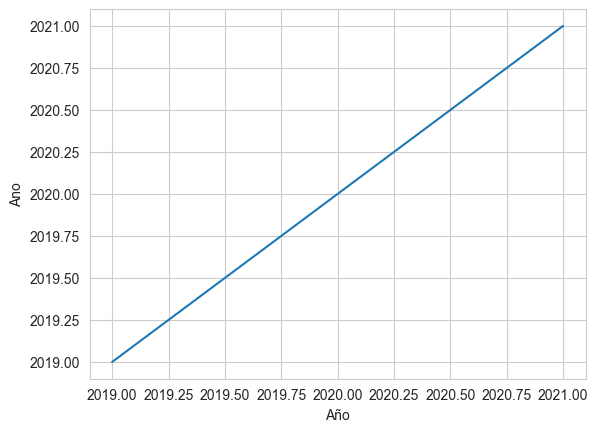

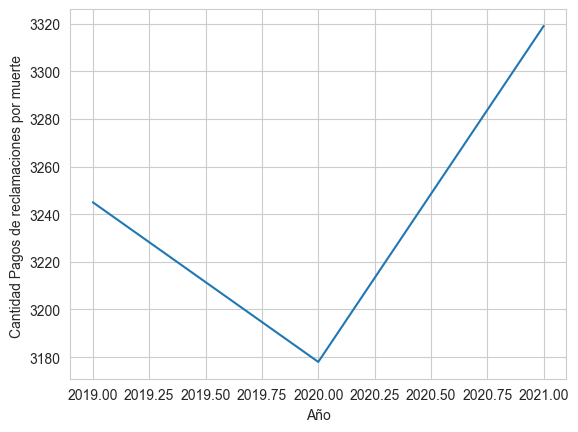

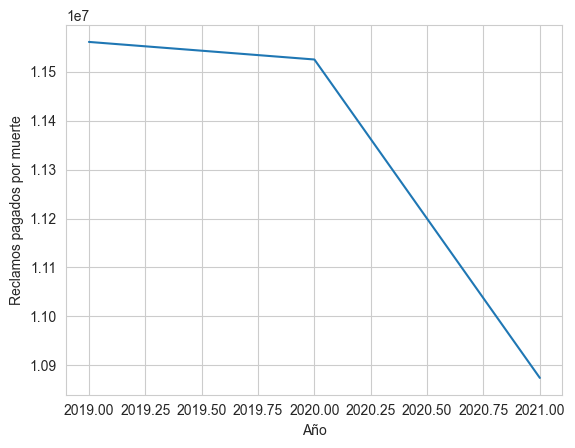

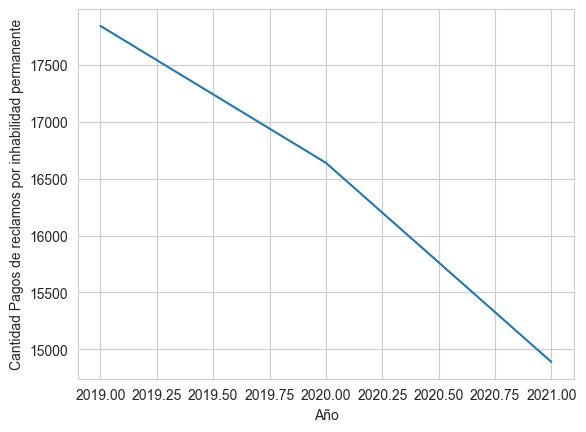

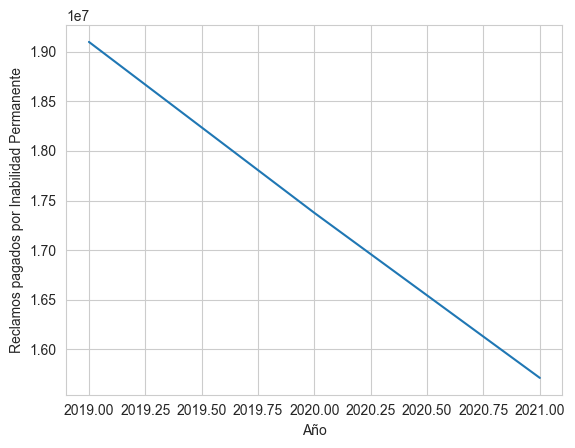

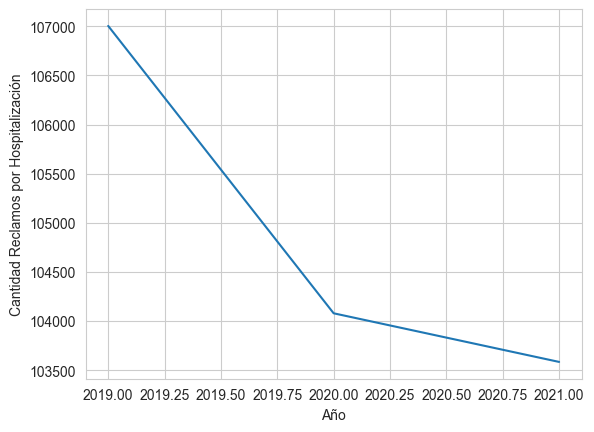

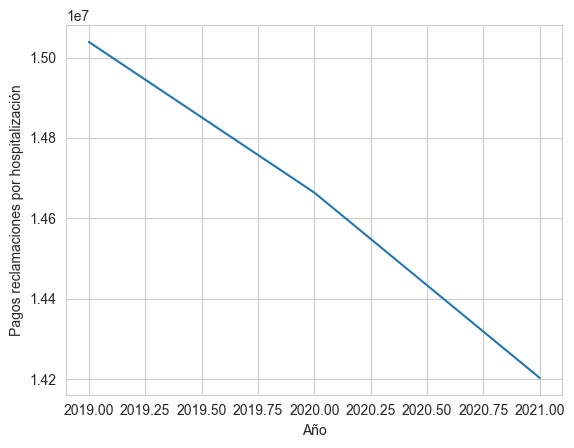

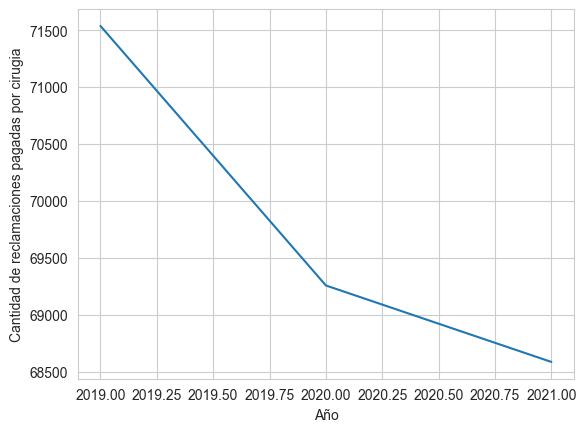

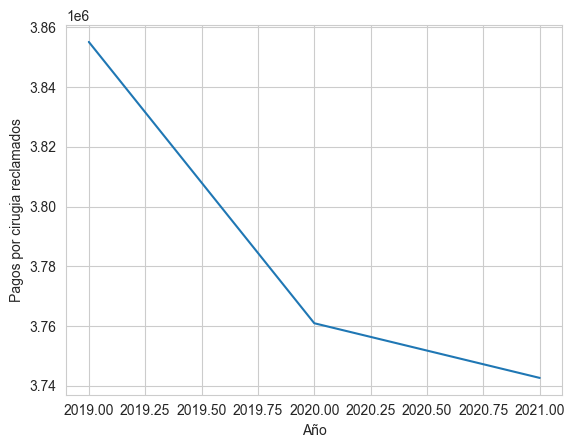

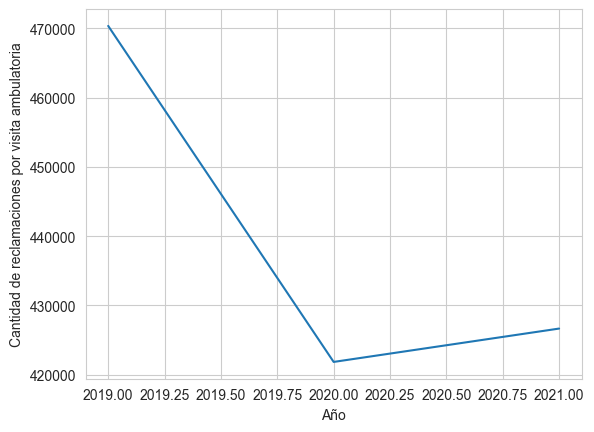

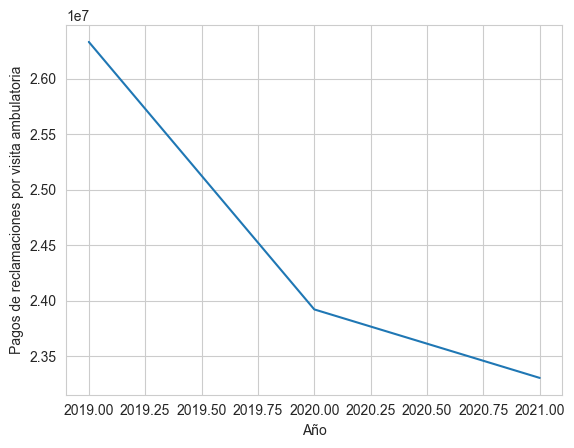

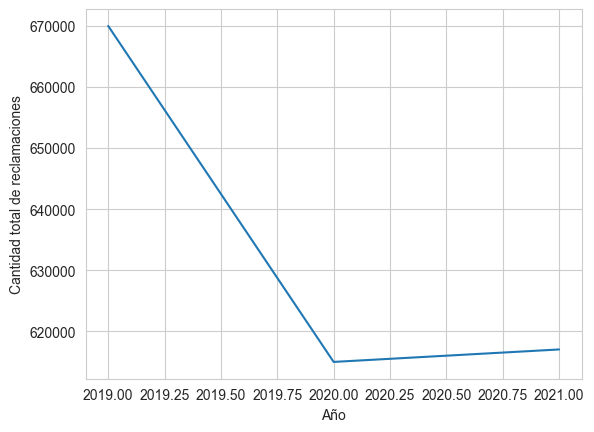

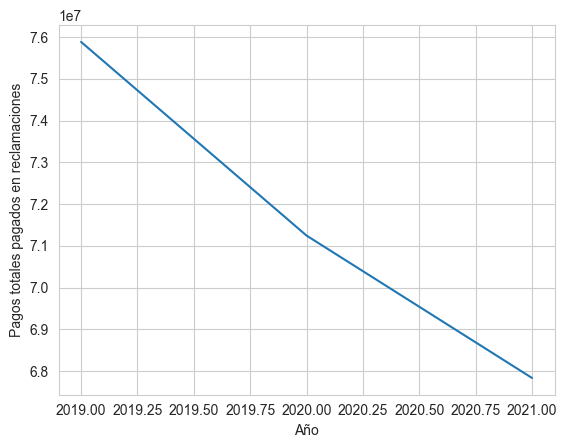

In [612]:
# Podemos observar que la mayoria del comportamiento es bajista excepto cabe destacar la cantidad de reclamaciones
# por muerte, pero en general el total de pagado en reclamaciones y la cantidad de las mismas fue ne descenso

data_plot = df_kpi4_reclamos_tipo_ordinarios[['Cantidad Pagos de reclamaciones por muerte ',
       'Reclamos pagados por muerte',
       'Cantidad Pagos de reclamos por inhabilidad permanente',
       'Reclamos pagados por Inabilidad Permanente',
       'Cantidad Reclamos por Hospitalización',
       'Pagos reclamaciones por hospitalización',
       'Cantidad de reclamaciones pagadas por cirugia',
       'Pagos por cirugia reclamados',
       'Cantidad de reclamaciones por visita ambulatoria',
       'Pagos de reclamaciones por visita ambulatoria',
       'Cantidad total de reclamaciones',
       'Pagos totales pagados en reclamaciones', 'Ano']].groupby('Ano',as_index=False).agg(sum)

# Graficamos para cada columna con respecto al año
for i in data_plot.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel('Año')
    ax.set_ylabel(i)
    ax.plot(data_plot['Ano'],data_plot[i])
data_plot

In [613]:
# Observemos el DataFrame Nro. 4
df_kpi4_nuevos_contratos_ordinarios_descuento_cobertura_ocupacional = pd.read_csv('Datasets_csv/seguros_vida_japon4_(kpi4).csv')

In [614]:
# Observamos que tiene datos para las cantidad de asegurados, montos asegurados y sus primas para distintos tipos de situacion

df_kpi4_nuevos_contratos_ordinarios_descuento_cobertura_ocupacional

Clase Ocupacional Nuevos Contratos  \
0                                             Clase A   
1                                             Clase A   
2                                             Clase A   
3                                             Clase B   
4                                             Clase B   
5                                             Clase B   
6                                  Promedio ponderado   
7                           Acuerdos aplicables, etc.   
8   Contrato al que se aplica la tasa promedio pon...   
9                                               Total   
10                                              Total   
11                                              Total   
12                                            Clase A   
13                                            Clase A   
14                                            Clase A   
15                                            Clase B   
16                                            Clase B   
17                                            Clase B   
18                                        prima media   
19                                Contratos elegibles   
20  Contrato al cual se aplica la tasa promedio po...   
21                                Suma Total Aplicado   
22                             Suma Total no aplicado   
23                                              Total   
24                                            Clase A   
25                                            Clase A   
26                                            Clase A   
27                                            Clase B   
28                                            Clase B   
29                                            Clase B   
30                                        prima media   
31                                Contratos elegibles   
32  Contrato al cual se aplica la tasa promedio po...   
33                                Suma Total Aplicado   
34                             Suma Total no aplicado   
35                                              Total   

   Descuento por cobertura de accidentes laborales  No de Polizas  \
0                                           Aplica          61712   
1                                        No Aplica         360847   
2                                         Subtotal         422559   
3                                           Aplica          35393   
4                                        No Aplica          46712   
5                                         Subtotal          82105   
6                                           Aplica          68914   
7                                        No Aplica        3510172   
8                                         Subtotal        3579086   
9                                           Aplica         166019   
10                                       No Aplica        3917731   
11                                        Subtotal        4083750   
12                                        Aplicado          70416   
13                                     No Aplicado         729428   
14                                        Subtotal         799844   
15                                        Aplicado          40833   
16                                     No Aplicado          76270   
17                                        Subtotal         117103   
18                                        Aplicado          54677   
19                                     No Aplicado        2779563   
20                                        Subtotal        2834240   
21                                        Aplicado         165926   
22                                     No Aplicado        3585261   
23                                        Subtotal        3751187   
24                                        Aplicado          77545   
25                                     No Aplicado         764840   
26                                        Subt

In [615]:
# Nos podemos percatar que la informacion esta bastante limpia, sin nulos y ademas censilla
df_kpi4_nuevos_contratos_ordinarios_descuento_cobertura_ocupacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Clase Ocupacional Nuevos Contratos                            36 non-null     object
 1   Descuento por cobertura de accidentes laborales               36 non-null     object
 2   No de Polizas                                                 36 non-null     int64 
 3   Muerte / Incapacidad Permanente No de Asegurados              36 non-null     int64 
 4   Muerte / Incapacidad Permanente Monto Asegurado Million Yen   36 non-null     int64 
 5   Muerte / Incapacidad Permanente Prima Escrita Thousand Yen    36 non-null     int64 
 6   Hospitalizacion No de Asegurados                              36 non-null     int64 
 7   Hospitalizacion Monto Asegurado Por Dia Thousand Yen          36 non-null     int6

In [616]:
# Esta informacion no nos aporta en este caso informacion util para esta situacion 
df_kpi4_nuevos_contratos_ordinarios_descuento_cobertura_ocupacional.describe()

No de Polizas  Muerte / Incapacidad Permanente No de Asegurados  \
count   3.600000e+01                                      3.600000e+01   
mean    1.269856e+06                                      6.762881e+06   
std     1.538525e+06                                      7.012027e+06   
min     3.539300e+04                                      1.959010e+05   
25%     7.480650e+04                                      7.209248e+05   
50%     2.678740e+05                                      3.512238e+06   
75%     2.793232e+06                                      1.291208e+07   
max     4.083750e+06                                      2.052996e+07   

       Muerte / Incapacidad Permanente Monto Asegurado Million Yen   \
count                                       3.600000e+01              
mean                                        2.884215e+07              
std                                         2.764973e+07              
min                                         9.650500e+05              
25%                                         5.479240e+06              
50%                                         1.933886e+07              
75%                                         5.035385e+07              
max                                         8.985688e+07              

       Muerte / Incapacidad Permanente Prima Escrita Thousand Yen   \
count                                       3.600000e+01             
mean                                        2.366673e+07             
std                                         2.533201e+07             
min                                         1.257563e+06             
25%                                         2.642538e+06             
50%                                         1.092764e+07             
75%                                         4.722317e+07             
max                                         7.256636e+07             

       Hospitalizacion No de Asegurados  \
count                      3.600000e+01   
mean                       5.249468e+06   
std                        5.449787e+06   
min                        1.698880e+05   
25%                        5.285590e+05   
50%                        2.667632e+06   
75%                        9.871017e+06   
max                        1.632065e+07   

       Hospitalizacion Monto Asegurado Por Dia Thousand Yen   \
count                                       3.600000e+01       
mean                                        2.450276e+07       
std                                         2.600507e+07       
min                                         7.476470e+05       
25%                                         2.662552e+06       
50%                                         1.126768e+07       
75%                                         4.934858e+07       
max                                         7.560762e+07       

       Hospitalizacion Prima Escrita Thousand Yen   \
count                                 3.600000e+01   
mean                                  1.701878e+07   
std                                   2.016643e+07   
min                                   5.403470e+05   
25%                                   1.087003e+06   
50%                                   5.205380e+06   
75%                                   3.830681e+07   
max                                   5.220597e+07   

       Visita Ambulatoria No de Asegurados  \
count                         3.600000e+01   
mean                          3.712471e+06   
std                           3.658833e+06   
min                           1.598070e+05   
25%                           4.894492e+05   
50%                           2.300969e+06   
75%                           6.081571e+06   
max                           1.161241e+07   

       Visita Ambulatoria Monto Asegurado Por Dia Thousand Yen   \
count                                       3.600000e+01          
mean                                        8.484296e+06          
s

In [617]:
# En esta ocasion si podemos observar que en la columna clase ocupacional hay una incoherencia en ciertas
# traducciones que no son constantes
# Ademas de esto el resto de la informacion resulto correcta y sin irregularidades


for i in df_kpi4_nuevos_contratos_ordinarios_descuento_cobertura_ocupacional.columns:
    print(df_kpi4_nuevos_contratos_ordinarios_descuento_cobertura_ocupacional[i].value_counts())

Clase A                                                  9
Clase B                                                  9
Total                                                    5
prima media                                              2
Contratos elegibles                                      2
Contrato al cual se aplica la tasa promedio ponderada    2
Suma Total Aplicado                                      2
Suma Total no aplicado                                   2
Promedio ponderado                                       1
Acuerdos aplicables, etc.                                1
Contrato al que se aplica la tasa promedio ponderada     1
Name: Clase Ocupacional Nuevos Contratos, dtype: int64
Subtotal       12
Aplicado        8
No Aplicado     8
Aplica          4
No Aplica       4
Name: Descuento por cobertura de accidentes laborales, dtype: int64
61712      1
360847     1
2834240    1
165926     1
3585261    1
3751187    1
77545      1
764840     1
842385     1
44071      1
81639   

In [618]:
df_kpi4_nuevos_contratos_ordinarios_descuento_cobertura_ocupacional.corr(numeric_only=True)

No de Polizas  \
No de Polizas                                            1.000000   
Muerte / Incapacidad Permanente No de Asegurados         0.975915   
Muerte / Incapacidad Permanente Monto Asegurado...       0.952343   
Muerte / Incapacidad Permanente Prima Escrita T...       0.983661   
Hospitalizacion No de Asegurados                         0.972397   
Hospitalizacion Monto Asegurado Por Dia Thousan...       0.982007   
Hospitalizacion Prima Escrita Thousand Yen               0.996055   
Visita Ambulatoria No de Asegurados                      0.942923   
Visita Ambulatoria Monto Asegurado Por Dia Thou...       0.942544   
Visita Ambulatoria Prima Escrita Thousand Yen            0.966553   
Total Prima Escrita Thousand Yen                         0.987439   
Año                                                      0.043954   
idCountry                                                     NaN   

                                                    Muerte / Incapacidad Permanente No de Asegurados  \
No de Polizas                                                                               0.975915   
Muerte / Incapacidad Permanente No de Asegurados                                            1.000000   
Muerte / Incapacidad Permanente Monto Asegurado...                                          0.991864   
Muerte / Incapacidad Permanente Prima Escrita T...                                          0.997751   
Hospitalizacion No de Asegurados                                                            0.999526   
Hospitalizacion Monto Asegurado Por Dia Thousan...                                          0.997621   
Hospitalizacion Prima Escrita Thousand Yen                                                  0.984414   
Visita Ambulatoria No de Asegurados                                                         0.990688   
Visita Ambulatoria Monto Asegurado Por Dia Thou...                                          0.990999   
Visita Ambulatoria Prima Escrita Thousand Yen                                               0.992283   
Total Prima Escrita Thousand Yen                                                            0.996858   
Año                                                                                        -0.008792   
idCountry                                                                                        NaN   

                                                    Muerte / Incapacidad Permanente Monto Asegurado Million Yen   \
No de Polizas                                                                                0.952343              
Muerte / Incapacidad Permanente No de Asegurados                                             0.991864              
Muerte / Incapacidad Permanente Monto Asegurado...                                           1.000000              
Muerte / Incapacidad Permanente Prima Escrita T...                                           0.985016              
Hospitalizacion No de Asegurados                                                             0.992255              
Hospitalizacion Monto Asegurado Por Dia Thousan...                                           0.990416              
Hospitalizacion Prima Escrita Thousand Yen                                                   0.964310              
Visita Ambulatoria No de Asegurados                                                          0.986028              
Visita Ambulatoria Monto Asegurado Por Dia Thou...                                           0.994131              
Visita Ambulatoria Prima Escrita Thousand Yen                                                0.975909              
Total Prima Escrita Thousand Yen                                                             0.980669              
Año                                                                                         -0.026561              
idCountry                                                                                         NaN              

   

Año  No de Polizas  Muerte / Incapacidad Permanente No de Asegurados  \
0  2019       14375064                                          82119840   
1  2020       15004748                                          81010804   
2  2021       16335000                                          80333068   

   Muerte / Incapacidad Permanente Monto Asegurado Million Yen   \
0                                          359427533              
1                                          340747320              
2                                          338142526              

   Muerte / Incapacidad Permanente Prima Escrita Thousand Yen   \
0                                          290265433             
1                                          283061505             
2                                          278675332             

   Hospitalizacion No de Asegurados  \
0                          65282592   
1                          62668712   
2                          61029532   

   Hospitalizacion Monto Asegurado Por Dia Thousand Yen   \
0                                          302430455       
1                                          289575998       
2                                          290092849       

   Hospitalizacion Prima Escrita Thousand Yen   \
0                                    201968011   
1                                    201884299   
2                                    208823887   

   Visita Ambulatoria No de Asegurados  \
0                             46449624   
1                             44122488   
2                             43076832   

   Visita Ambulatoria Monto Asegurado Por Dia Thousand Yen   \
0                                          105396073          
1                                          100454297          
2                                           99584270          

   Visita Ambulatoria Prima Escrita Thousand Yen  \
0                                      213499453   
1                                      214500596   
2                                      219924635   

   Total Prima Escrita Thousand Yen   
0                          705732908  
1                          699446411  
2                          707423867

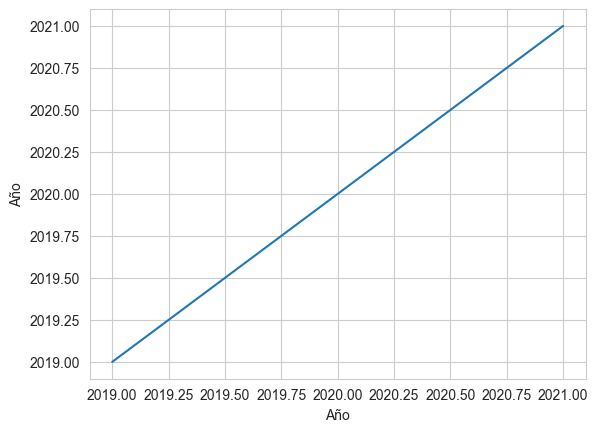

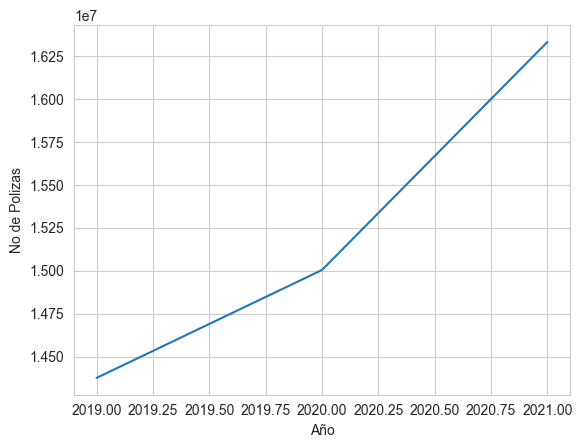

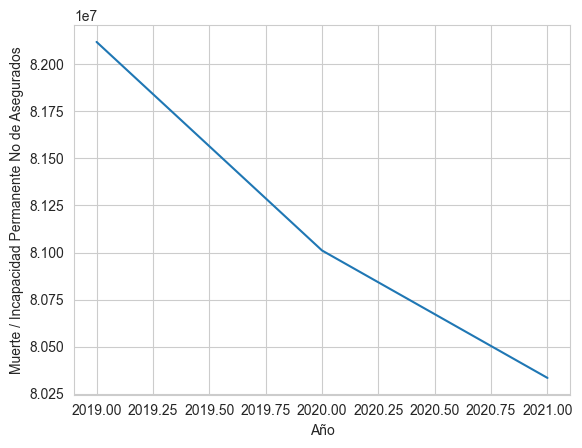

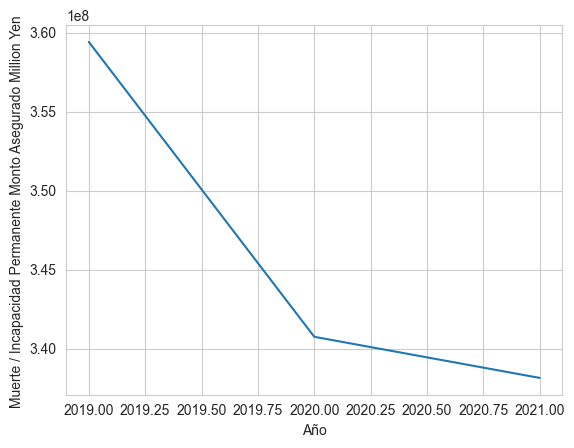

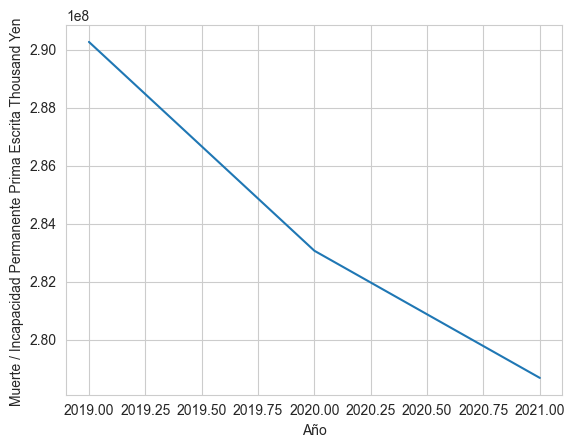

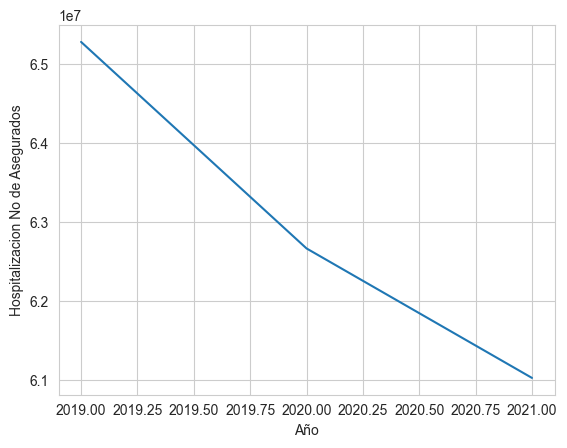

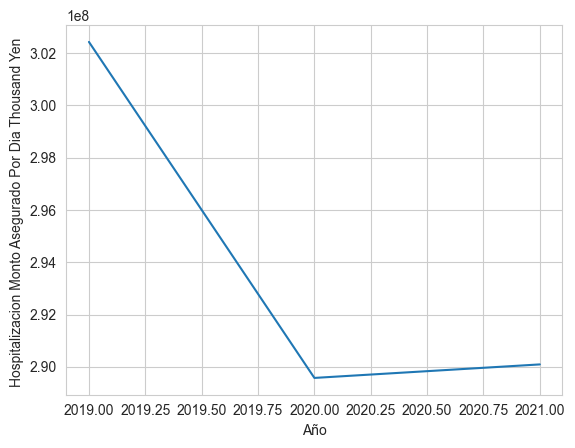

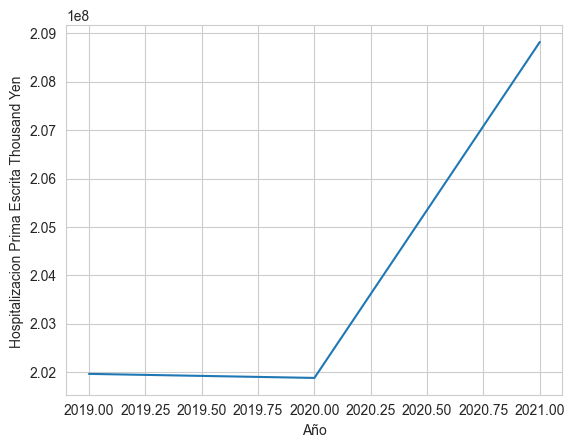

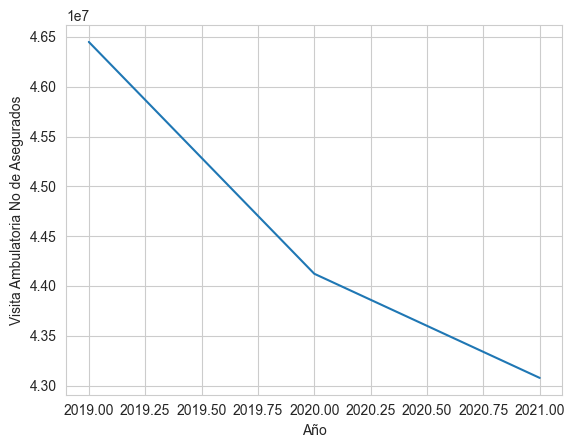

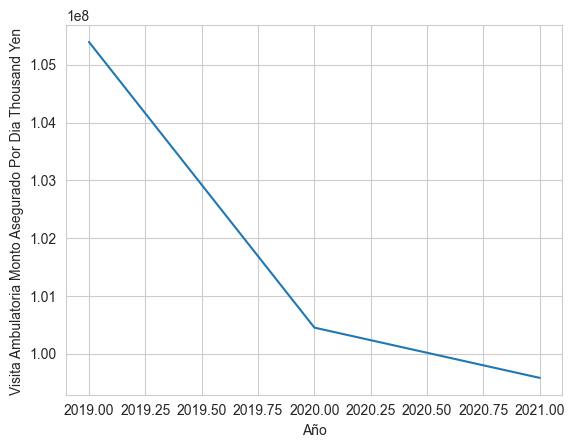

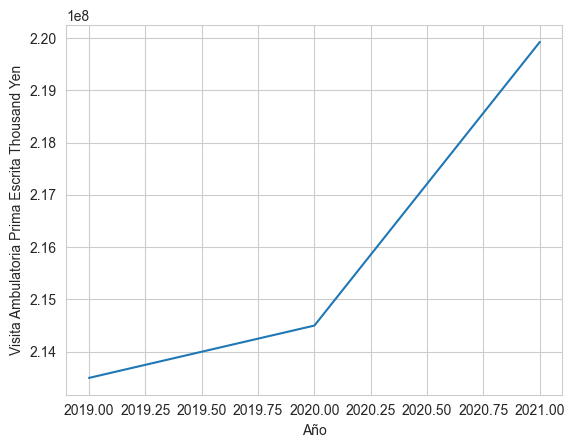

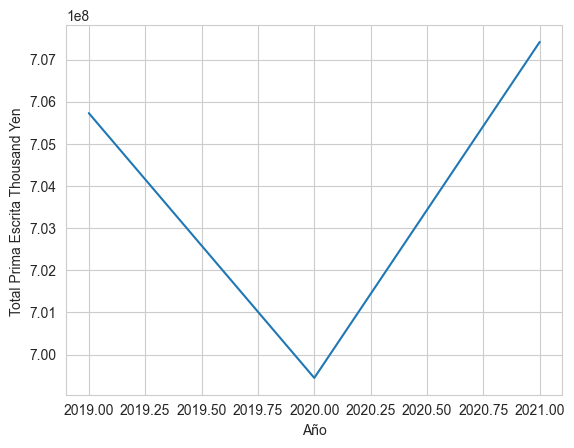

In [619]:
# Con respecto a estas graficas podemos ver cierto comportamiento alcista para el ultimo año con respecto a
# las referentes a las primas escritas, el resto en los montos asegurados hubo un frenado con respecto al año
# anterior

data_plot = df_kpi4_nuevos_contratos_ordinarios_descuento_cobertura_ocupacional[[
       'No de Polizas',
       'Muerte / Incapacidad Permanente No de Asegurados',
       'Muerte / Incapacidad Permanente Monto Asegurado Million Yen ',
       'Muerte / Incapacidad Permanente Prima Escrita Thousand Yen ',
       'Hospitalizacion No de Asegurados',
       'Hospitalizacion Monto Asegurado Por Dia Thousand Yen ',
       'Hospitalizacion Prima Escrita Thousand Yen ',
       'Visita Ambulatoria No de Asegurados',
       'Visita Ambulatoria Monto Asegurado Por Dia Thousand Yen ',
       'Visita Ambulatoria Prima Escrita Thousand Yen',
       'Total Prima Escrita Thousand Yen ', 'Año']].groupby('Año',as_index=False).agg(sum)

# Graficamos para cada columna con respecto al año
for i in data_plot.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel('Año')
    ax.set_ylabel(i)
    ax.plot(data_plot['Año'],data_plot[i])
data_plot

In [620]:
# Observemos el DataFrame Nro. 5
df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional = pd.read_csv('Datasets_csv/seguros_vida_japon5_(kpi4).csv',encoding='utf-8')

In [621]:
# En esta ocasion nos encontramos con los datos de reclamo para los seguros ordinarios con descuento ocupacional
df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional

Clase Ocupacional Reclamos  \
0                                             Class A   
1                                             Class A   
2                                             Class A   
3                                             Class B   
4                                             Class B   
5                                             Class B   
6                             tasa Promedio ponderado   
7                           Acuerdos aplicables, etc.   
8   Contrato al que se aplica la tasa promedio pon...   
9                                               Total   
10                                              Total   
11                                              Total   
12                                            Class A   
13                                            Class A   
14                                            Class A   
15                                            Class B   
16                                            Class B   
17                                            Class B   
18                            tasa Promedio ponderado   
19                          Acuerdos aplicables, etc.   
20  Contrato al que se aplica la tasa promedio pon...   
21                                              Total   
22                                              Total   
23                                              Total   
24                                            Class A   
25                                            Class A   
26                                            Class A   
27                                            Class B   
28                                            Class B   
29                                            Class B   
30                            tasa Promedio ponderado   
31                          Acuerdos aplicables, etc.   
32  Contrato al que se aplica la tasa promedio pon...   
33                                              Total   
34                                              Total   
35                                              Total   

   Descuento por cobertura de accidentes laborales  \
0                                           Aplica   
1                                        No Aplica   
2                                         Subtotal   
3                                           Aplica   
4                                        No Aplica   
5                                         Subtotal   
6                                           Aplica   
7                                        No Aplica   
8                                         Subtotal   
9                                           Aplica   
10                                       No Aplica   
11                                        Subtotal   
12                                          Aplica   
13                                       No Aplica   
14                                        Subtotal   
15                                          Aplica   
16                                       No Aplica   
17                                        Subtotal   
18                                          Aplica   
19                                       No Aplica   
20                                        Subtotal   
21                                          Aplica   
22                                       No Aplica   
23                                        Subtotal   
24                                          Aplica   
25                                       No Aplica   
26                                        Subtotal   
27                                          Aplica   
28                                       No Aplica   
29                                        Subtotal   
30                                          Aplica   
31                                       No Aplica   
32                                        Subtotal   
33                                          Aplica   
34                         

In [622]:
# Para poder observar la data mejor en graficas se debe transformala

# Cambiamos las "," por nada en lo valores numericos
# aux = 0
# for i in df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional.columns:
#     if aux ==2:
#         df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional[i] = df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional[i].str.replace(',' , '')
#     else:
#         aux += 1

# Exportamos
# df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional.to_csv('Datasets_csv/seguros_vida_japon5_(kpi4).csv', index=False)

In [623]:
df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional

Clase Ocupacional Reclamos  \
0                                             Class A   
1                                             Class A   
2                                             Class A   
3                                             Class B   
4                                             Class B   
5                                             Class B   
6                             tasa Promedio ponderado   
7                           Acuerdos aplicables, etc.   
8   Contrato al que se aplica la tasa promedio pon...   
9                                               Total   
10                                              Total   
11                                              Total   
12                                            Class A   
13                                            Class A   
14                                            Class A   
15                                            Class B   
16                                            Class B   
17                                            Class B   
18                            tasa Promedio ponderado   
19                          Acuerdos aplicables, etc.   
20  Contrato al que se aplica la tasa promedio pon...   
21                                              Total   
22                                              Total   
23                                              Total   
24                                            Class A   
25                                            Class A   
26                                            Class A   
27                                            Class B   
28                                            Class B   
29                                            Class B   
30                            tasa Promedio ponderado   
31                          Acuerdos aplicables, etc.   
32  Contrato al que se aplica la tasa promedio pon...   
33                                              Total   
34                                              Total   
35                                              Total   

   Descuento por cobertura de accidentes laborales  \
0                                           Aplica   
1                                        No Aplica   
2                                         Subtotal   
3                                           Aplica   
4                                        No Aplica   
5                                         Subtotal   
6                                           Aplica   
7                                        No Aplica   
8                                         Subtotal   
9                                           Aplica   
10                                       No Aplica   
11                                        Subtotal   
12                                          Aplica   
13                                       No Aplica   
14                                        Subtotal   
15                                          Aplica   
16                                       No Aplica   
17                                        Subtotal   
18                                          Aplica   
19                                       No Aplica   
20                                        Subtotal   
21                                          Aplica   
22                                       No Aplica   
23                                        Subtotal   
24                                          Aplica   
25                                       No Aplica   
26                                        Subtotal   
27                                          Aplica   
28                                       No Aplica   
29                                        Subtotal   
30                                          Aplica   
31                                       No Aplica   
32                                        Subtotal   
33                                          Aplica   
34                         

In [624]:
# Observamos un DataFrame limpio

df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Clase Ocupacional Reclamos                             36 non-null     object
 1   Descuento por cobertura de accidentes laborales        36 non-null     object
 2   No de Reclamos Pagados por Muerte                      36 non-null     int64 
 3   Reclamos pagados Por Muerte Thousand Yen               36 non-null     int64 
 4   Incapacidad Permanente No de Reclamos Pagados          36 non-null     int64 
 5   Incapacidad Permanente Reclamos Pagados Thousand Yen   36 non-null     int64 
 6   Hospitalizacion No de Reclamos Pagados                 36 non-null     int64 
 7   Hospitalizacion Reclamos Pagados Thousand Yen          36 non-null     int64 
 8   Cirugia No de Reclamos Pagados                         36 non-

In [625]:
# No se puede obtener algo relevante en esta ocasion, los maximos y minimos se ven en orden
df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional.describe()

No de Reclamos Pagados por Muerte  \
count                          36.000000   
mean                         1079.333333   
std                          1294.861338   
min                            21.000000   
25%                            51.000000   
50%                           333.000000   
75%                          2460.750000   
max                          3314.000000   

       Reclamos pagados Por Muerte Thousand Yen   \
count                               3.600000e+01   
mean                                3.764346e+06   
std                                 3.997268e+06   
min                                 9.690800e+04   
25%                                 4.868408e+05   
50%                                 1.972012e+06   
75%                                 7.464615e+06   
max                                 1.152065e+07   

       Incapacidad Permanente No de Reclamos Pagados  \
count                                      36.000000   
mean                                     5365.777778   
std                                      6029.699889   
min                                       225.000000   
25%                                       496.250000   
50%                                      2202.000000   
75%                                     11358.250000   
max                                     17454.000000   

       Incapacidad Permanente Reclamos Pagados Thousand Yen   \
count                                       3.600000e+01       
mean                                        5.667302e+06       
std                                         5.733369e+06       
min                                         3.899890e+05       
25%                                         8.796928e+05       
50%                                         3.220609e+06       
75%                                         1.011944e+07       
max                                         1.864897e+07       

       Hospitalizacion No de Reclamos Pagados  \
count                               36.000000   
mean                             34646.333333   
std                              40042.222155   
min                                749.000000   
25%                               2011.000000   
50%                              13520.000000   
75%                              74661.000000   
max                             106026.000000   

       Hospitalizacion Reclamos Pagados Thousand Yen   \
count                                    3.600000e+01   
mean                                     4.839337e+06   
std                                      5.581911e+06   
min                                      1.666980e+05   
25%                                      3.211738e+05   
50%                                      1.813822e+06   
75%                                      1.057496e+07   
max                                      1.490252e+07   

       Cirugia No de Reclamos Pagados  Cirugia Reclamos Pagados Thousand Yen   \
count                       36.000000                            3.600000e+01   
mean                     22974.555556                            1.243992e+06   
std                      26597.070555                            1.466954e+06   
min                        623.000000                            3.905500e+04   
25%                       1419.000000                            8.126325e+04   
50%                       8690.500000                            4.162885e+05   
75%                      50248.500000                            2.834912e+06   
max                      70660.000000                            3.800195e+06   

       Visita ambulatoria No de Reclamos Pagados  \
count                                  36.000000   
mean                               143346.000000   
std                                156213.806385   
min                                  3809.000000   
25%                                 10481.750000   
50%                                 74780.000000   
75%      

In [626]:
# En esta ocasion tenemos coherencia entre los distintos valores para cada columna
for i in df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional.columns:
    print(df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional[i].value_counts())

Class A                                                 9
Class B                                                 9
Total                                                   9
tasa Promedio ponderado                                 3
Acuerdos aplicables, etc.                               3
Contrato al que se aplica la tasa promedio ponderada    3
Name: Clase Ocupacional Reclamos, dtype: int64
Aplica       12
No Aplica    12
Subtotal     12
Name: Descuento por cobertura de accidentes laborales, dtype: int64
46      2
38      2
689     1
144     1
3024    1
3168    1
60      1
629     1
33      1
2403    1
71      1
48      1
2424    1
2472    1
141     1
3091    1
2457    1
54      1
522     1
80      1
42      1
631     1
579     1
52      1
3314    1
3186    1
128     1
2689    1
2643    1
57      1
21      1
36      1
568     1
3232    1
Name: No de Reclamos Pagados por Muerte, dtype: int64
356442      1
2251837     1
7563776     1
1692188     1
9800654     1
11492842    1
494076     

In [627]:
# Podemos observar que la correlacion entre la gran mayoria de columnas estan postivamente correlacionadas entre si

df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional.corr(numeric_only=True)

No de Reclamos Pagados por Muerte  \
No de Reclamos Pagados por Muerte                                            1.000000   
Reclamos pagados Por Muerte Thousand Yen                                     0.990550   
Incapacidad Permanente No de Reclamos Pagados                                0.988775   
Incapacidad Permanente Reclamos Pagados Thousan...                           0.974326   
Hospitalizacion No de Reclamos Pagados                                       0.996460   
Hospitalizacion Reclamos Pagados Thousand Yen                                0.997364   
Cirugia No de Reclamos Pagados                                               0.997334   
Cirugia Reclamos Pagados Thousand Yen                                        0.999054   
Visita ambulatoria No de Reclamos Pagados                                    0.974450   
Visita ambulatoria Reclamos Pagados Thousand Yen                             0.970982   
Total No de Reclamos Pagados                                                 0.984216   
Total Reclamos Pagados Thousand Yen                                          0.986452   
Año                                                                          0.008740   

                                                    Reclamos pagados Por Muerte Thousand Yen   \
No de Reclamos Pagados por Muerte                                                    0.990550   
Reclamos pagados Por Muerte Thousand Yen                                             1.000000   
Incapacidad Permanente No de Reclamos Pagados                                        0.995076   
Incapacidad Permanente Reclamos Pagados Thousan...                                   0.994141   
Hospitalizacion No de Reclamos Pagados                                               0.996231   
Hospitalizacion Reclamos Pagados Thousand Yen                                        0.996066   
Cirugia No de Reclamos Pagados                                                       0.996032   
Cirugia Reclamos Pagados Thousand Yen                                                0.993275   
Visita ambulatoria No de Reclamos Pagados                                            0.989493   
Visita ambulatoria Reclamos Pagados Thousand Yen                                     0.989169   
Total No de Reclamos Pagados                                                         0.994375   
Total Reclamos Pagados Thousand Yen                                                  0.997992   
Año                                                                                 -0.022616   

                                                    Incapacidad Permanente No de Reclamos Pagados  \
No de Reclamos Pagados por Muerte                                                        0.988775   
Reclamos pagados Por Muerte Thousand Yen                                                 0.995076   
Incapacidad Permanente No de Reclamos Pagados                                            1.000000   
Incapacidad Permanente Reclamos Pagados Thousan...                                       0.993006   
Hospitalizacion No de Reclamos Pagados                                                   0.995395   
Hospitalizacion Reclamos Pagados Thousand Yen                                            0.996303   
Cirugia No de Reclamos Pagados                                                           0.996074   
Cirugia Reclamos Pagados Thousand Yen                                                    0.993903   
Visita ambulatoria No de Reclamos Pagados                                                0.985718   
Visita ambulatoria Reclamos Pagados Thousand Yen                                         0.985705   
Total No de Reclamos Pagados                                                             0.991784   
Total Reclamos Pagados Thousand Yen                                                      0.995869   
Año                                                                                     -0.066675   

                               

C:\Users\Jose J\AppData\Local\Temp\ipykernel_20392\909515226.py:14: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  'Año']].groupby('Año',as_index=False).agg(sum)


Año  No de Reclamos Pagados por Muerte  \
0  2019                              12928   
1  2020                              12672   
2  2021                              13256   

   Reclamos pagados Por Muerte Thousand Yen   \
0                                   46082608   
1                                   45971364   
2                                   43462478   

   Incapacidad Permanente No de Reclamos Pagados  \
0                                          69816   
1                                          65188   
2                                          58164   

   Incapacidad Permanente Reclamos Pagados Thousand Yen   \
0                                           74595863       
1                                           67991495       
2                                           61435507       

   Hospitalizacion No de Reclamos Pagados  \
0                                  424104   
1                                  412644   
2                                  410520   

   Hospitalizacion Reclamos Pagados Thousand Yen   \
0                                        59610088   
1                                        58237490   
2                                        56368546   

   Cirugia No de Reclamos Pagados  Cirugia Reclamos Pagados Thousand Yen   \
0                          282640                                15200776   
1                          273608                                14830381   
2                          270836                                14752561   

   Visita ambulatoria No de Reclamos Pagados  \
0                                    1839844   
1                                    1651268   
2                                    1669344   

   Visita ambulatoria Reclamos Pagados Thousand Yen   \
0                                          103240081   
1                                           93742306   
2                                           91338959   

   Total No de Reclamos Pagados  Total Reclamos Pagados Thousand Yen   
0                       2629332                             298729439  
1                       2415380                             280773062  
2                       2422120                             267358076

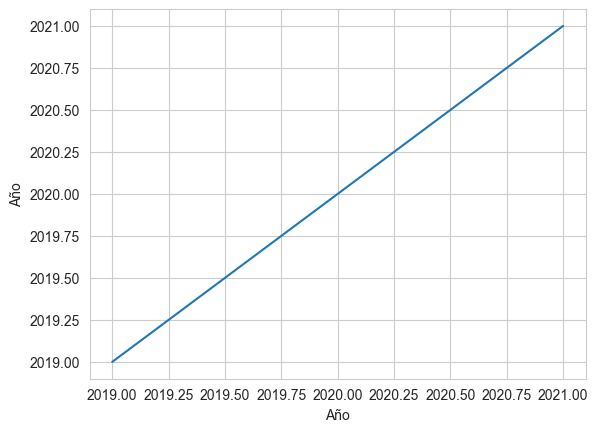

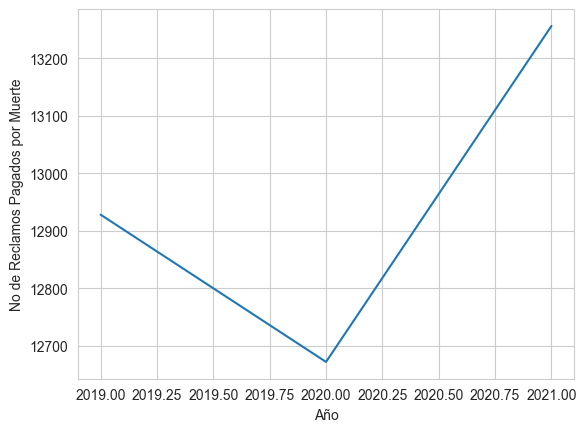

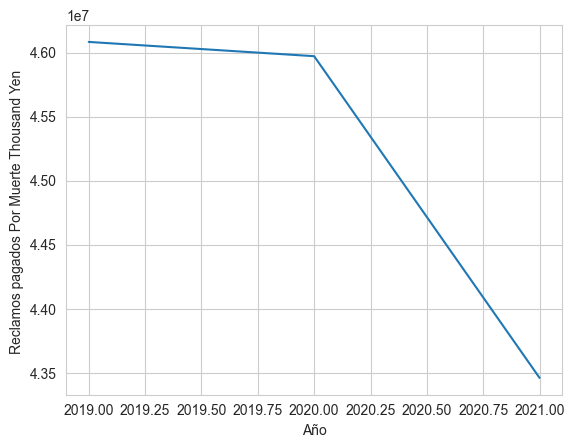

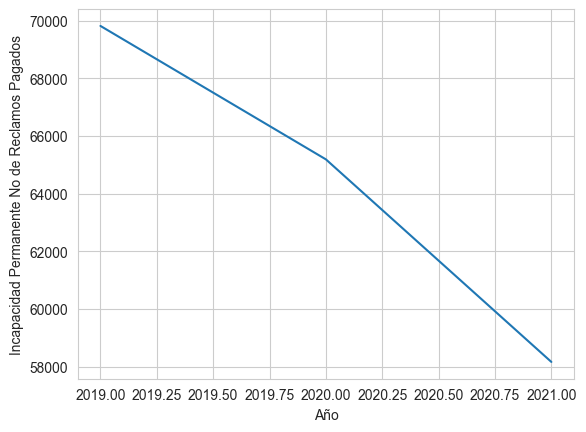

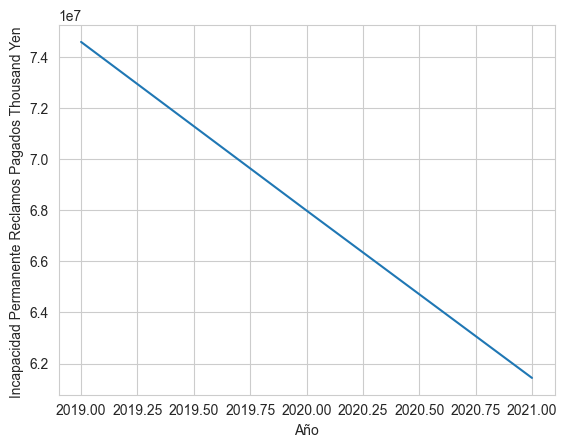

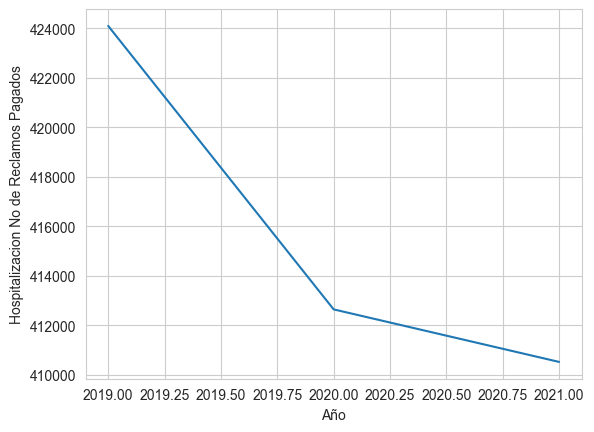

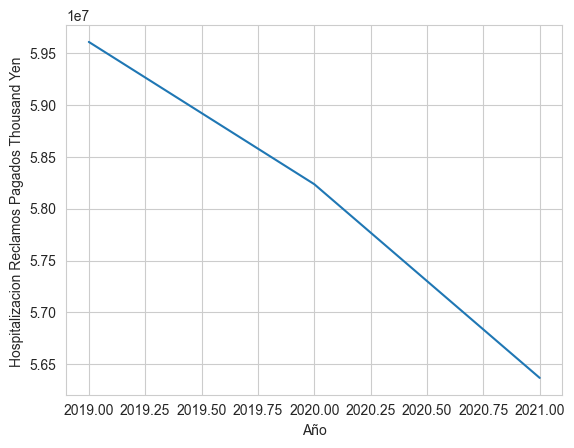

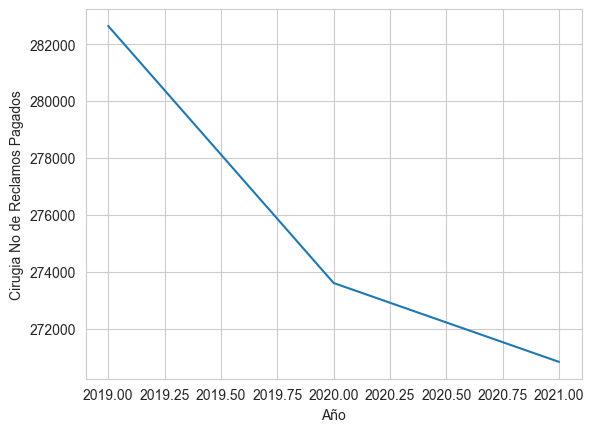

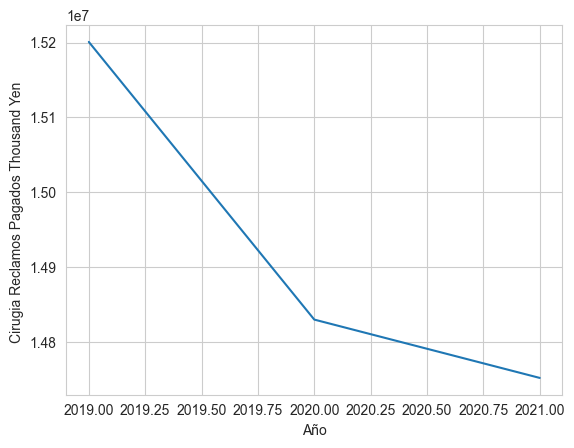

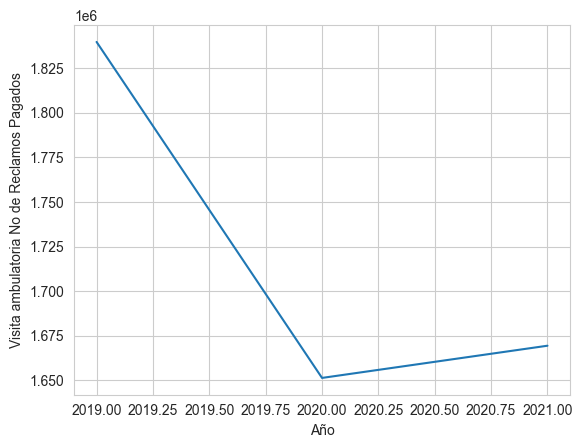

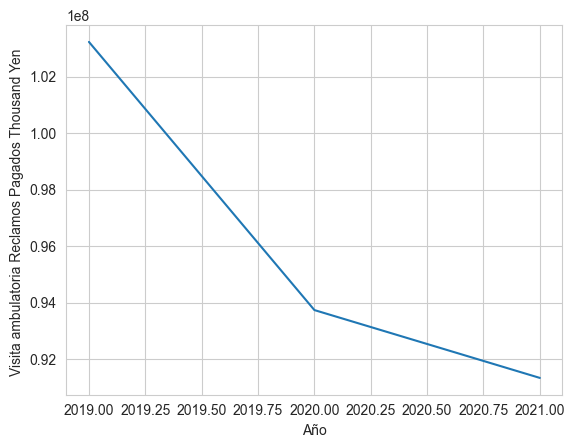

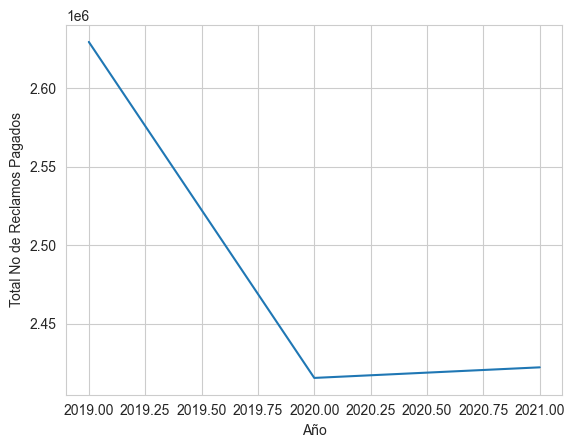

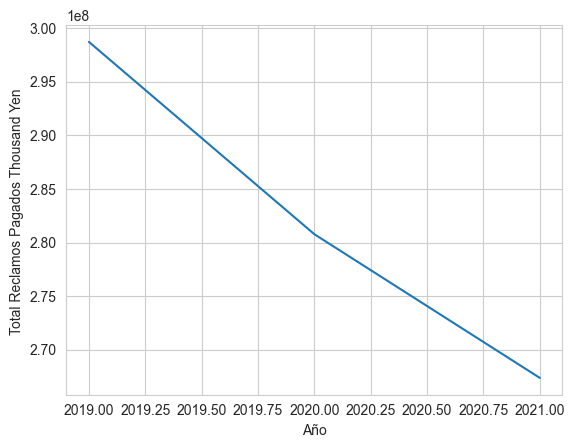

In [628]:
data_plot = df_kpi4_reclamos_ordinarios_descuento_cobertura_ocupacional[[
       'Descuento por cobertura de accidentes laborales',
       'No de Reclamos Pagados por Muerte',
       'Reclamos pagados Por Muerte Thousand Yen ',
       'Incapacidad Permanente No de Reclamos Pagados',
       'Incapacidad Permanente Reclamos Pagados Thousand Yen ',
       'Hospitalizacion No de Reclamos Pagados',
       'Hospitalizacion Reclamos Pagados Thousand Yen ',
       'Cirugia No de Reclamos Pagados',
       'Cirugia Reclamos Pagados Thousand Yen ',
       'Visita ambulatoria No de Reclamos Pagados',
       'Visita ambulatoria Reclamos Pagados Thousand Yen ',
       'Total No de Reclamos Pagados', 'Total Reclamos Pagados Thousand Yen ',
       'Año']].groupby('Año',as_index=False).agg(sum)

# Graficamos para cada columna con respecto al año
for i in data_plot.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel('Año')
    ax.set_ylabel(i)
    ax.plot(data_plot['Año'],data_plot[i])
data_plot

In [629]:
# Observemos el DataFrame Nro. 6
df_kpi4_nuevos_contratos_tipo_familiar = pd.read_csv('Datasets_csv/seguros_vida_japon6_(kpi4).csv')

In [630]:
df_kpi4_nuevos_contratos_tipo_familiar

Clase Ocupacional Nuevos Contratos No de Polizas  \
0                                             Clase A         37557   
1                                             Clase B          3795   
2   Contrato al que se aplica la tasa promedio pon...        298261   
3                Cobertura de accidentes no laborales           770   
4                                            Subtotal        340383   
5                                              Esposo     (283,935)   
6                                     Otros Parientes     (225,879)   
7                                               Total        340383   
8                                             Clase A         65490   
9                                             Clase B          6916   
10  Contrato al que se aplica la tasa promedio pon...        271084   
11               Cobertura de accidentes no laborales          1146   
12                                           Subtotal        344636   
13                                             Esposo      -297.101   
14                                    Otros Parientes      -232.372   
15                                              Total        344636   
16                                            Clase A         65612   
17                                            Clase B          7062   
18  Contrato al que se aplica la tasa promedio pon...        250527   
19               Cobertura de accidentes no laborales          1251   
20                                           Subtotal        324452   
21                                             Esposo       -279.57   
22                                    Otros Parientes      -210.131   
23                                              Total        324452   

    Muerte / Incapacidad Permanente No de Asegurados  \
0                                             610468   
1                                              12154   
2                                            1225936   
3                                              46211   
4                                            1894769   
5                                            1807592   
6                                            1241629   
7                                            1894769   
8                                             614507   
9                                              15205   
10                                           1263005   
11                                             38152   
12                                           1930869   
13                                           1858475   
14                                           1253553   
15                                           1930869   
16                                            654402   
17                                             16245   
18                                           1358947   
19                                             38084   
20                                           2067678   
21                                           1996212   
22                                           1371735   
23                                           2067678   

    Muerte / Incapacidad Permanente Monto Asegurado Million Yen   \
0                                             1984800              
1                                               44478              
2                                             4577957              
3                                               37019              
4                                             6644255              
5                                             4871263              
6                                             2592068              
7                                            14107587              
8                                             2204497              
9                                               58468              
10                                            4708343              
11                        

In [631]:
# DataFrame muy limpio, sin nulos y coherencia en la mayoria de Dtypes excepto No de polizas, debe de verificarse

df_kpi4_nuevos_contratos_tipo_familiar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Clase Ocupacional Nuevos Contratos                            24 non-null     object
 1   No de Polizas                                                 24 non-null     object
 2   Muerte / Incapacidad Permanente No de Asegurados              24 non-null     int64 
 3   Muerte / Incapacidad Permanente Monto Asegurado Million Yen   24 non-null     int64 
 4   Muerte / Incapacidad Permanente Prima Escrita Thousand Yen    24 non-null     int64 
 5   Hospitalizacion No de Asegurados                              24 non-null     int64 
 6   Hospitalizacion Monto Asegurado Por Dia Thousand Yen          24 non-null     int64 
 7   Hospitalizacion Prima Escrita Thousand Yen                    24 non-null     int6

In [632]:
# No aporta mucha informacion relevante, pero podemos observar que los minimo y maximos parecen coherentes
df_kpi4_nuevos_contratos_tipo_familiar.describe()

Muerte / Incapacidad Permanente No de Asegurados  \
count                                      2.400000e+01   
mean                                       1.133714e+06   
std                                        7.849100e+05   
min                                        1.215400e+04   
25%                                        4.694038e+05   
50%                                        1.258279e+06   
75%                                        1.894769e+06   
max                                        2.067678e+06   

       Muerte / Incapacidad Permanente Monto Asegurado Million Yen   \
count                                       2.400000e+01              
mean                                        4.700728e+06              
std                                         4.735518e+06              
min                                         3.701900e+04              
25%                                         1.504692e+06              
50%                                         3.741064e+06              
75%                                         5.978389e+06              
max                                         1.659062e+07              

       Muerte / Incapacidad Permanente Prima Escrita Thousand Yen   \
count                                       2.400000e+01             
mean                                        4.372199e+06             
std                                         4.372351e+06             
min                                         1.829600e+04             
25%                                         1.254951e+06             
50%                                         3.702662e+06             
75%                                         5.305003e+06             
max                                         1.528954e+07             

       Hospitalizacion No de Asegurados  \
count                      2.400000e+01   
mean                       9.578849e+05   
std                        6.690080e+05   
min                        6.322000e+03   
25%                        3.720325e+05   
50%                        1.090082e+06   
75%                        1.600474e+06   
max                        1.758147e+06   

       Hospitalizacion Monto Asegurado Por Dia Thousand Yen   \
count                                       2.400000e+01       
mean                                        5.624486e+06       
std                                         5.795363e+06       
min                                         2.886300e+04       
25%                                         1.362956e+06       
50%                                         4.875984e+06       
75%                                         7.247476e+06       
max                                         2.055683e+07       

       Hospitalizacion Prima Escrita Thousand Yen   \
count                                 2.400000e+01   
mean                                  3.841357e+06   
std                                   3.941412e+06   
min                                   1.034700e+04   
25%                                   9.038958e+05   
50%                                   3.598653e+06   
75%                                   4.842680e+06   
max                                   1.373346e+07   

       Visita Ambulatoria No de Asegurados  \
count                         2.400000e+01   
mean                          8.957210e+05   
std                           6.210734e+05   
min                           6.307000e+03   
25%                           3.697790e+05   
50%                           1.014017e+06   
75%                           1.497208e+06   
max                           1.635747e+06   

       Visita Ambulatoria Monto Asegurado Por Dia Thousand Yen   \
count                                       2.400000e+01          
mean                                        2.335126e+06          
std                                         2.366273e+06          
min                                         1.734000e+04          
25

In [633]:
# Podemos observar la mayoria de coherencia entre los datos de las columnas, pero en el caso de nro. polizas
# hay valores que deberian de retirarse como parenteris y negativos, ya que estos deberian estar normalizados y
# positivos.

for i in df_kpi4_nuevos_contratos_tipo_familiar.columns:
    print(df_kpi4_nuevos_contratos_tipo_familiar[i].value_counts())

Clase A                                                 3
Clase B                                                 3
Contrato al que se aplica la tasa promedio ponderada    3
Cobertura de accidentes no laborales                    3
Subtotal                                                3
Esposo                                                  3
Otros Parientes                                         3
  Total                                                 3
Name: Clase Ocupacional Nuevos Contratos, dtype: int64
344636       2
324452       2
340383       2
37557        1
-279.57      1
1251         1
250527       1
7062         1
65612        1
-232.372     1
-297.101     1
1146         1
3795         1
271084       1
6916         1
65490        1
(225,879)    1
(283,935)    1
770          1
298261       1
-210.131     1
Name: No de Polizas, dtype: int64
1930869    2
2067678    2
1894769    2
610468     1
1996212    1
38084      1
1358947    1
16245      1
654402     1
1253553    1
18

In [634]:
# Con esta matriz de correlacion podemos observar que estan muy correlacionados positivamente entre si
df_kpi4_nuevos_contratos_tipo_familiar.corr()

C:\Users\Jose J\AppData\Local\Temp\ipykernel_20392\1515146692.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_kpi4_nuevos_contratos_tipo_familiar.corr()


Muerte / Incapacidad Permanente No de Asegurados  \
Muerte / Incapacidad Permanente No de Asegurados                                            1.000000   
Muerte / Incapacidad Permanente Monto Asegurado...                                          0.795893   
Muerte / Incapacidad Permanente Prima Escrita T...                                          0.777830   
Hospitalizacion No de Asegurados                                                            0.999390   
Hospitalizacion Monto Asegurado Por Dia Thousan...                                          0.795735   
Hospitalizacion Prima Escrita Thousand Yen                                                  0.757267   
Visita Ambulatoria No de Asegurados                                                         0.999432   
Visita Ambulatoria Monto Asegurado Por Dia Thou...                                          0.789368   
Visita Ambulatoria Prima Escrita Thousand Yen                                               0.768832   
Total Prima Escrita Thousand Yen                                                            0.770622   
Año                                                                                        -0.055618   
idCountry                                                                                        NaN   

                                                    Muerte / Incapacidad Permanente Monto Asegurado Million Yen   \
Muerte / Incapacidad Permanente No de Asegurados                                             0.795893              
Muerte / Incapacidad Permanente Monto Asegurado...                                           1.000000              
Muerte / Incapacidad Permanente Prima Escrita T...                                           0.990080              
Hospitalizacion No de Asegurados                                                             0.793188              
Hospitalizacion Monto Asegurado Por Dia Thousan...                                           0.994405              
Hospitalizacion Prima Escrita Thousand Yen                                                   0.968700              
Visita Ambulatoria No de Asegurados                                                          0.790549              
Visita Ambulatoria Monto Asegurado Por Dia Thou...                                           0.994705              
Visita Ambulatoria Prima Escrita Thousand Yen                                                0.981913              
Total Prima Escrita Thousand Yen                                                             0.983613              
Año                                                                                         -0.068820              
idCountry                                                                                         NaN              

                                                    Muerte / Incapacidad Permanente Prima Escrita Thousand Yen   \
Muerte / Incapacidad Permanente No de Asegurados                                             0.777830             
Muerte / Incapacidad Permanente Monto Asegurado...                                           0.990080             
Muerte / Incapacidad Permanente Prima Escrita T...                                           1.000000             
Hospitalizacion No de Asegurados                                                             0.777738             
Hospitalizacion Monto Asegurado Por Dia Thousan...                                           0.985368             
Hospitalizacion Prima Escrita Thousand Yen                                                   0.988905             
Visita Ambulatoria No de Asegurados                                                          0.775043             
Visita Ambulatoria Monto Asegurado Por Dia Thou...                                           0.986236             
Visita Ambulatoria Prima Escrita Thousand Yen                                                0.989904             
Total Prima Escrita Thousand Yen        

Año  Muerte / Incapacidad Permanente No de Asegurados  \
0  2019                                           9570981   
1  2020                                           8904635   
2  2021                                           8733528   

   Muerte / Incapacidad Permanente Monto Asegurado Million Yen   \
0                                           41111258              
1                                           36846799              
2                                           34859427              

   Muerte / Incapacidad Permanente Prima Escrita Thousand Yen   \
0                                           37793112             
1                                           34624170             
2                                           32515501             

   Hospitalizacion No de Asegurados  \
0                           8154170   
1                           7443883   
2                           7391184   

   Hospitalizacion Monto Asegurado Por Dia Thousand Yen   \
0                                           49357669       
1                                           43725922       
2                                           41904084       

   Hospitalizacion Prima Escrita Thousand Yen   \
0                                     32748241   
1                                     30081902   
2                                     29362430   

   Visita Ambulatoria No de Asegurados  \
0                              7616105   
1                              6944533   
2                              6936665   

   Visita Ambulatoria Monto Asegurado Por Dia Thousand Yen   \
0                                           19683388          
1                                           18614579          
2                                           17745068          

   Visita Ambulatoria Prima Escrita Thousand Yen  \
0                                       49513339   
1                                       47670591   
2                                       46858741   

   Total Prima Escrita Thousand Yen   
0                          120054702  
1                          112376671  
2                          108736680

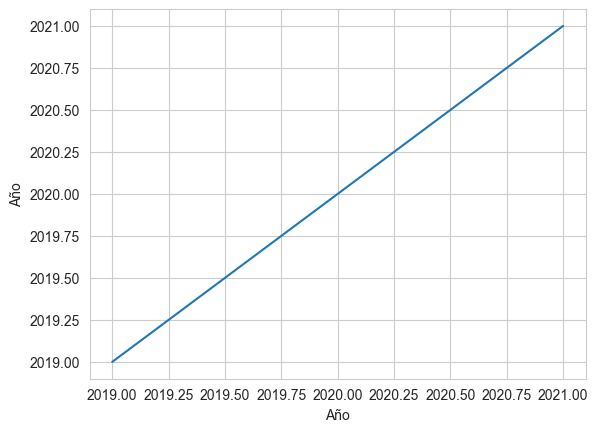

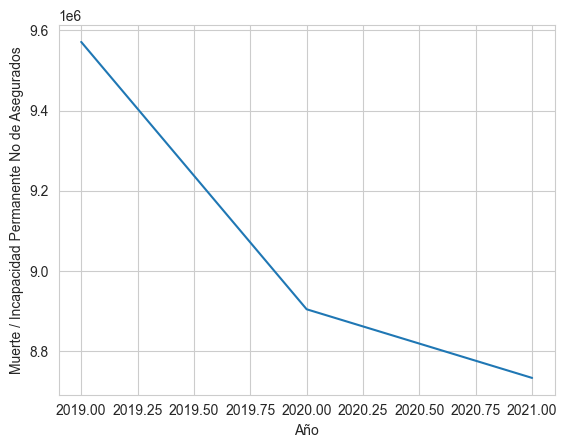

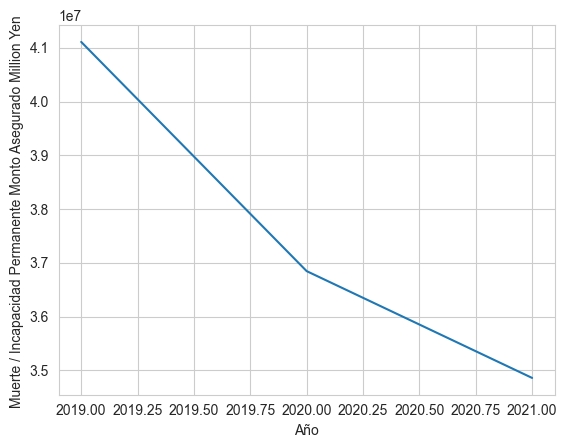

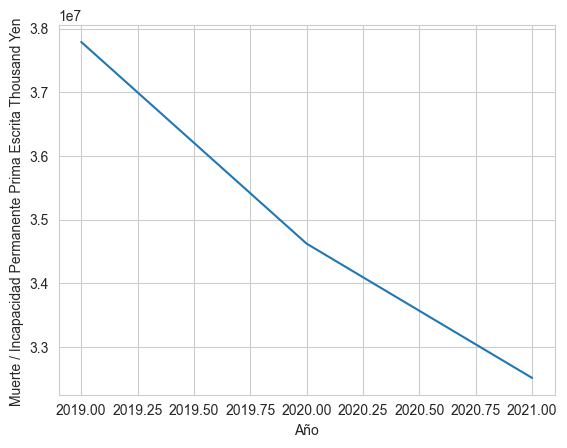

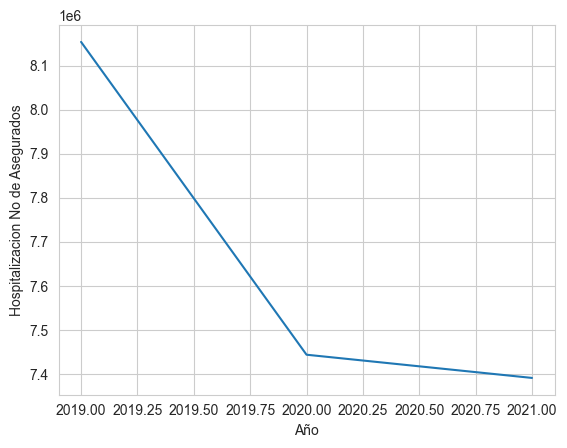

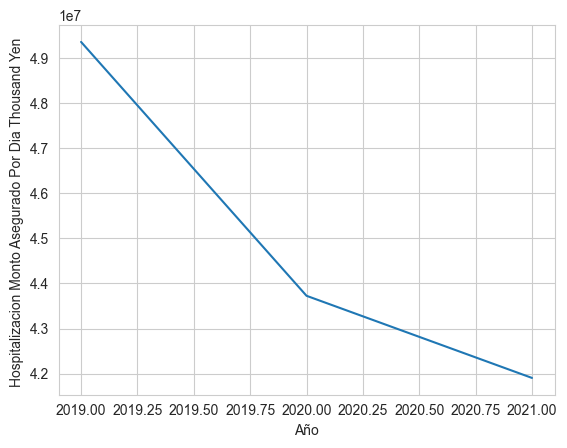

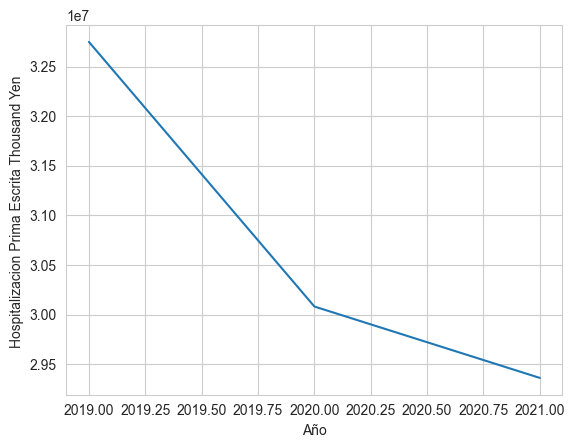

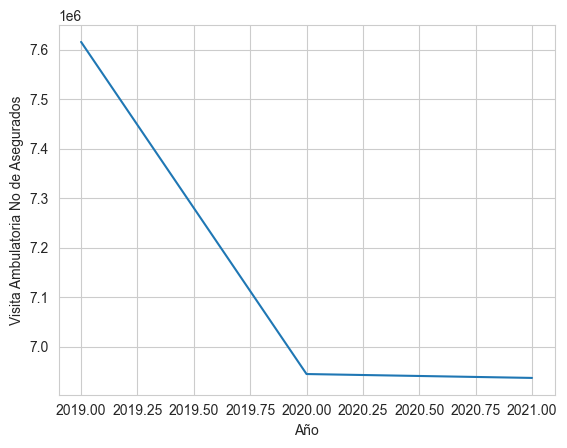

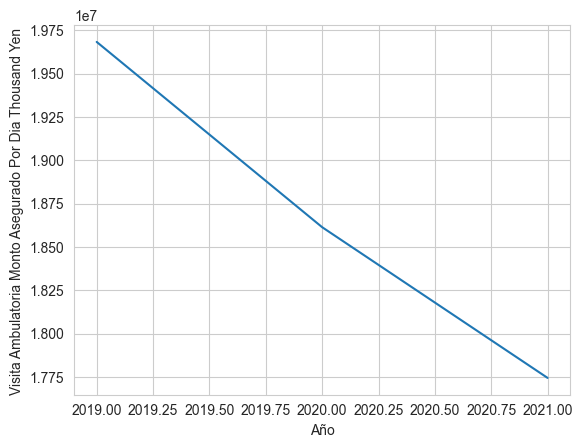

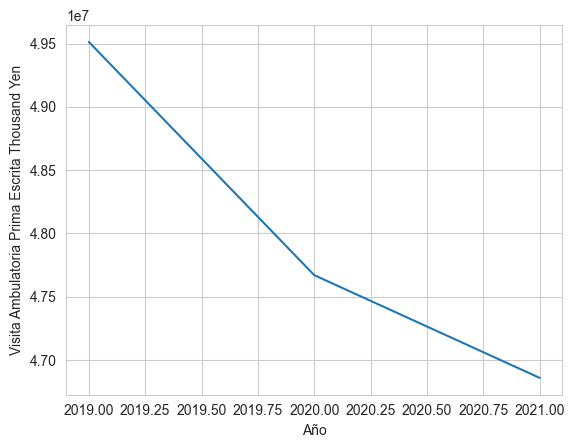

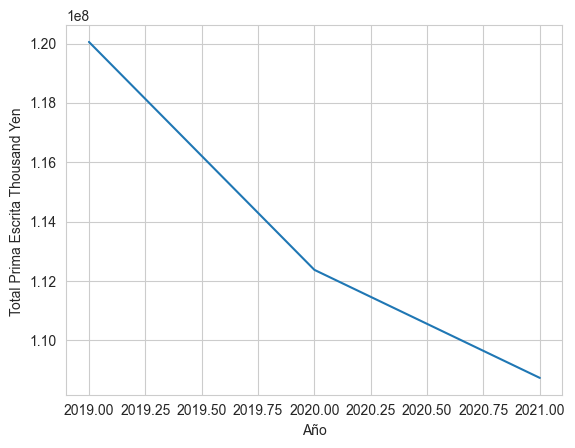

In [635]:
# El comportamiento que es igual para las columnas es bajista para el ultimo año

data_plot = df_kpi4_nuevos_contratos_tipo_familiar[[
       'Muerte / Incapacidad Permanente No de Asegurados',
       'Muerte / Incapacidad Permanente Monto Asegurado Million Yen ',
       'Muerte / Incapacidad Permanente Prima Escrita Thousand Yen ',
       'Hospitalizacion No de Asegurados',
       'Hospitalizacion Monto Asegurado Por Dia Thousand Yen ',
       'Hospitalizacion Prima Escrita Thousand Yen ',
       'Visita Ambulatoria No de Asegurados',
       'Visita Ambulatoria Monto Asegurado Por Dia Thousand Yen ',
       'Visita Ambulatoria Prima Escrita Thousand Yen',
       'Total Prima Escrita Thousand Yen ', 'Año']].groupby('Año',as_index=False).agg(sum)

# Graficamos para cada columna con respecto al año
for i in data_plot.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel('Año')
    ax.set_ylabel(i)
    ax.plot(data_plot['Año'],data_plot[i])
data_plot

In [636]:
# Observemos el DataFrame Nro. 7
df_kpi4_reclamos_tipo_familiar = pd.read_csv('Datasets_csv/seguros_vida_japon7_(kpi4).csv')

In [637]:
# Para esta ocasion tenemos los reclamos para los seguros de tipo familiar por cada tipo de situacion
df_kpi4_reclamos_tipo_familiar

Clase Ocupacional Reclamos  \
0                                             Clase A   
1                                             Clase B   
2   Contrato al que se aplica la tasa promedio pon...   
3                Cobertura de accidentes no laborales   
4                                            Subtotal   
5                                              Esposo   
6                                     Otros Parientes   
7                                               Total   
8                                             Clase A   
9                                             Clase B   
10  Contrato al que se aplica la tasa promedio pon...   
11               Cobertura de accidentes no laborales   
12                                           Subtotal   
13                                             Esposo   
14                                    Otros Parientes   
15                                              Total   
16                                            Clase A   
17                                            Clase B   
18  Contrato al que se aplica la tasa promedio pon...   
19               Cobertura de accidentes no laborales   
20                                           Subtotal   
21                                             Esposo   
22                                    Otros Parientes   
23                                              Total   

    No de Reclamos Pagados por Muerte  \
0                                  96   
1                                   4   
2                                 288   
3                                   0   
4                                 388   
5                                 201   
6                                 205   
7                                 794   
8                                 111   
9                                   2   
10                                259   
11                                  1   
12                                373   
13                                170   
14                                215   
15                                758   
16                                114   
17                                  4   
18                                279   
19                                  0   
20                                397   
21                                196   
22                                227   
23                                820   

    Reclamos pagados Por Muerte Thousand Yen   \
0                                      293727   
1                                       10523   
2                                      752675   
3                                          84   
4                                     1057010   
5                                      481411   
6                                      482319   
7                                     2020741   
8                                      396991   
9                                        4076   
10                                     778127   
11                                       5069   
12                                    1184264   
13                                     399664   
14                                     502123   
15                                    2086051   
16                                     409197   
17                                      45678   
18                                     878049   
19                                         95   
20                                    1333021   
21                                     428097   
22                                     536621   
23                                    2297740   

    Incapacidad Permanente No de Reclamos Pagados  \
0                                             563   
1                                              24   
2                                            1852   
3                                              45   
4                                            2484   
5                              

In [638]:
# Observamos que es dataframe esta totalmente limpio de nulos y tiene coherencia en los dtypes
df_kpi4_reclamos_tipo_familiar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Clase Ocupacional Reclamos                             24 non-null     object
 1   No de Reclamos Pagados por Muerte                      24 non-null     int64 
 2   Reclamos pagados Por Muerte Thousand Yen               24 non-null     int64 
 3   Incapacidad Permanente No de Reclamos Pagados          24 non-null     int64 
 4   Incapacidad Permanente Reclamos Pagados Thousand Yen   24 non-null     int64 
 5   Hospitalizacion No de Reclamos Pagados                 24 non-null     int64 
 6   Hospitalizacion Reclamos Pagados Thousand Yen          24 non-null     int64 
 7   Cirugia No de Reclamos Pagados                         24 non-null     int64 
 8   Cirugia Reclamos Pagados Thousand Yen                  24 non-

In [639]:
# Se ve que los diferentes maximos y minimos estan coherentes y que no se alejan mucho de los valores medios
df_kpi4_reclamos_tipo_familiar.describe()

No de Reclamos Pagados por Muerte  \
count                          24.000000   
mean                          245.916667   
std                           245.234035   
min                             0.000000   
25%                            73.000000   
50%                           203.000000   
75%                           309.250000   
max                           820.000000   

       Reclamos pagados Por Muerte Thousand Yen   \
count                               2.400000e+01   
mean                                6.826397e+05   
std                                 6.766731e+05   
min                                 8.400000e+01   
25%                                 2.317148e+05   
50%                                 4.818650e+05   
75%                                 9.227892e+05   
max                                 2.297740e+06   

       Incapacidad Permanente No de Reclamos Pagados  \
count                                      24.000000   
mean                                     1930.625000   
std                                      1966.096371   
min                                        24.000000   
25%                                       434.750000   
50%                                      1867.000000   
75%                                      2251.500000   
max                                      6843.000000   

       Incapacidad Permanente Reclamos Pagados Thousand Yen   \
count                                       2.400000e+01       
mean                                        1.435142e+06       
std                                         1.428595e+06       
min                                         1.060700e+04       
25%                                         4.167892e+05       
50%                                         1.170926e+06       
75%                                         1.793933e+06       
max                                         4.866369e+06       

       Hospitalizacion No de Reclamos Pagados  \
count                               24.000000   
mean                              9483.416667   
std                               9791.487225   
min                                 30.000000   
25%                               2504.750000   
50%                               8389.500000   
75%                              11300.750000   
max                              34418.000000   

       Hospitalizacion Reclamos Pagados Thousand Yen   \
count                                    2.400000e+01   
mean                                     1.428116e+06   
std                                      1.481435e+06   
min                                      2.514000e+03   
25%                                      3.374380e+05   
50%                                      1.309952e+06   
75%                                      1.674121e+06   
max                                      5.287170e+06   

       Cirugia No de Reclamos Pagados  Cirugia Reclamos Pagados Thousand Yen   \
count                       24.000000                            2.400000e+01   
mean                      6698.208333                            3.379271e+05   
std                       6902.852189                            3.436167e+05   
min                         25.000000                            1.075000e+03   
25%                       1574.500000                            8.663200e+04   
50%                       6081.500000                            3.150800e+05   
75%                       8236.000000                            3.889260e+05   
max                      24111.000000                            1.221363e+06   

       Visita ambulatoria No de Reclamos Pagados  \
count                                  24.000000   
mean                                74727.083333   
std                                 77967.913718   
min                                   346.000000   
25%                                 16336.750000   
50%                                 65639.000000   
75%      

In [640]:
# Revisando la iteracion de cada columna podemos observar que tiene datos coherentes y que no estan erroneos

for i in df_kpi4_reclamos_tipo_familiar.columns:
    print(df_kpi4_reclamos_tipo_familiar[i].value_counts())

Clase A                                                 3
Clase B                                                 3
Contrato al que se aplica la tasa promedio ponderada    3
Cobertura de accidentes no laborales                    3
Subtotal                                                3
Esposo                                                  3
Otros Parientes                                         3
  Total                                                 3
Name: Clase Ocupacional Reclamos, dtype: int64
0      2
4      2
96     1
373    1
227    1
196    1
397    1
279    1
114    1
758    1
215    1
170    1
1      1
259    1
2      1
111    1
794    1
205    1
201    1
388    1
288    1
820    1
Name: No de Reclamos Pagados por Muerte, dtype: int64
293727     1
10523      1
536621     1
428097     1
1333021    1
95         1
878049     1
45678      1
409197     1
2086051    1
502123     1
399664     1
1184264    1
5069       1
778127     1
4076       1
396991     1
2020741    1
482

In [641]:
# Igual que con muchos dataframes en este KPI podemos ver que tienen mucha correlacion positiva entre todas
# las columnas

df_kpi4_reclamos_tipo_familiar.corr(numeric_only=True)

No de Reclamos Pagados por Muerte  \
No de Reclamos Pagados por Muerte                                            1.000000   
Reclamos pagados Por Muerte Thousand Yen                                     0.990818   
Incapacidad Permanente No de Reclamos Pagados                                0.988617   
Incapacidad Permanente Reclamos Pagados Thousan...                           0.995467   
Hospitalizacion No de Reclamos Pagados                                       0.978503   
Hospitalizacion Reclamos Pagados Thousand Yen                                0.977259   
Cirugia No de Reclamos Pagados                                               0.983549   
Cirugia Reclamos Pagados Thousand Yen                                        0.990440   
Visita ambulatoria No de Reclamos Pagados                                    0.974878   
Visita ambulatoria Reclamos Pagados Thousand Yen                             0.994955   
Total No de Reclamos Pagados                                                 0.976776   
Total Reclamos Pagados Thousand Yen                                          0.995630   
año                                                                         -0.012967   
idCountry                                                                         NaN   

                                                    Reclamos pagados Por Muerte Thousand Yen   \
No de Reclamos Pagados por Muerte                                                    0.990818   
Reclamos pagados Por Muerte Thousand Yen                                             1.000000   
Incapacidad Permanente No de Reclamos Pagados                                        0.972024   
Incapacidad Permanente Reclamos Pagados Thousan...                                   0.989885   
Hospitalizacion No de Reclamos Pagados                                               0.954480   
Hospitalizacion Reclamos Pagados Thousand Yen                                        0.954229   
Cirugia No de Reclamos Pagados                                                       0.960369   
Cirugia Reclamos Pagados Thousand Yen                                                0.974574   
Visita ambulatoria No de Reclamos Pagados                                            0.950118   
Visita ambulatoria Reclamos Pagados Thousand Yen                                     0.985958   
Total No de Reclamos Pagados                                                         0.952394   
Total Reclamos Pagados Thousand Yen                                                  0.985737   
año                                                                                 -0.063941   
idCountry                                                                                 NaN   

                                                    Incapacidad Permanente No de Reclamos Pagados  \
No de Reclamos Pagados por Muerte                                                        0.988617   
Reclamos pagados Por Muerte Thousand Yen                                                 0.972024   
Incapacidad Permanente No de Reclamos Pagados                                            1.000000   
Incapacidad Permanente Reclamos Pagados Thousan...                                       0.989189   
Hospitalizacion No de Reclamos Pagados                                                   0.991176   
Hospitalizacion Reclamos Pagados Thousand Yen                                            0.993043   
Cirugia No de Reclamos Pagados                                                           0.994284   
Cirugia Reclamos Pagados Thousand Yen                                                    0.998796   
Visita ambulatoria No de Reclamos Pagados                                                0.985636   
Visita ambulatoria Reclamos Pagados Thousand Yen                                         0.996492   
Total No de Reclamos Pagados                                                             0.987690   
Total Reclamos Pagados Thousand Yen             

año  No de Reclamos Pagados por Muerte  \
0  2019                               2037   
1  2020                               1889   
2  2021                               1976   

   Reclamos pagados Por Muerte Thousand Yen   \
0                                    5928498   
1                                    5356365   
2                                    5098490   

   Incapacidad Permanente No de Reclamos Pagados  \
0                                          16544   
1                                          15381   
2                                          14410   

   Incapacidad Permanente Reclamos Pagados Thousand Yen   \
0                                           12122103       
1                                           11118204       
2                                           11203101       

   Hospitalizacion No de Reclamos Pagados  \
0                                   81685   
1                                   74042   
2                                   71875   

   Hospitalizacion Reclamos Pagados Thousand Yen   \
0                                        12509453   
1                                        11225035   
2                                        10540289   

   Cirugia No de Reclamos Pagados  Cirugia Reclamos Pagados Thousand Yen   \
0                           57543                                 2956655   
1                           51784                                 2611472   
2                           51430                                 2542124   

   Visita ambulatoria No de Reclamos Pagados  \
0                                     651796   
1                                     574212   
2                                     567442   

   Visita ambulatoria Reclamos Pagados Thousand Yen   \
0                                           27084786   
1                                           24097152   
2                                           23302640   

   Total No de Reclamos Pagados  Total Reclamos Pagados Thousand Yen   
0                        809605                              60601515  
1                        717308                              54408242  
2                        707133                              52686660

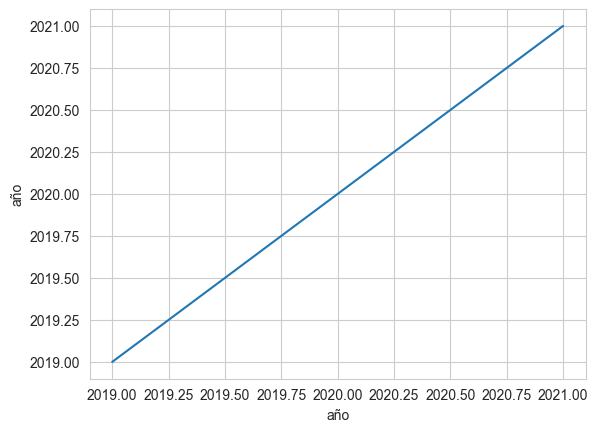

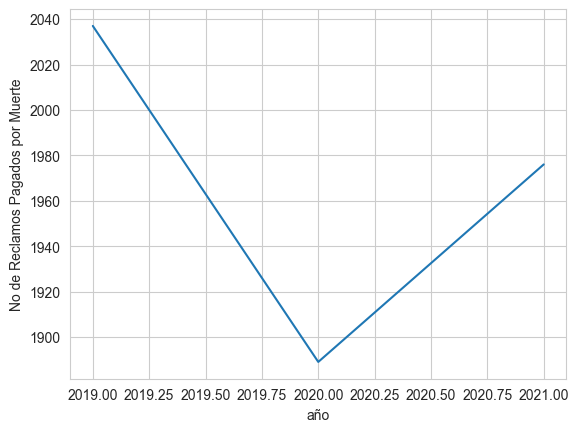

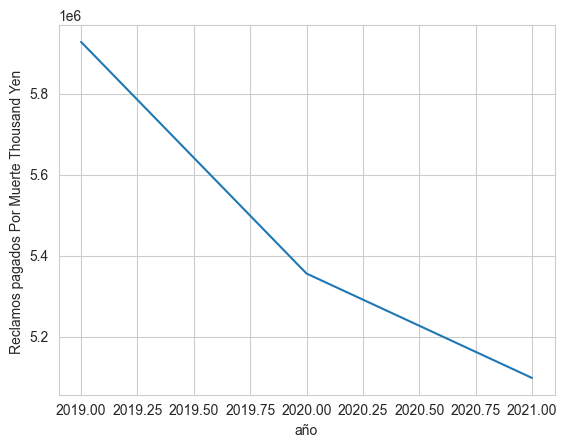

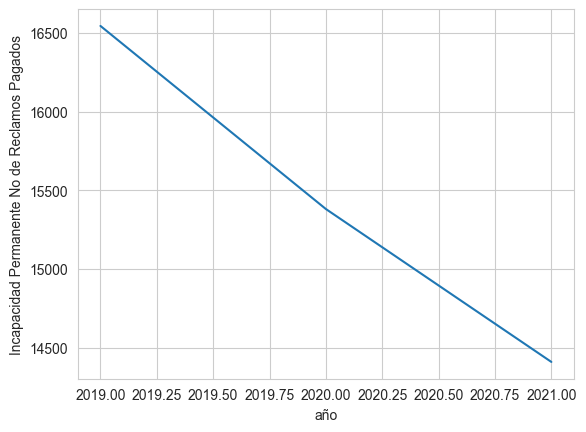

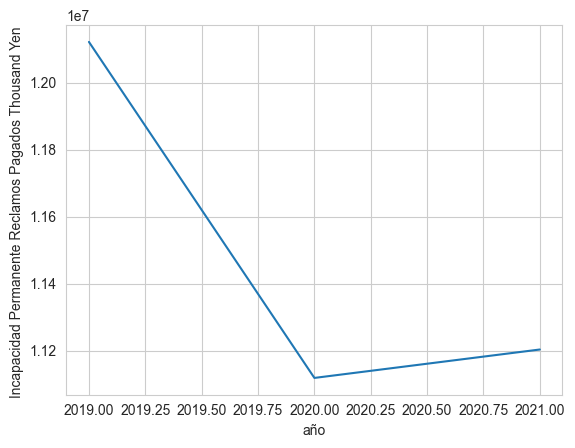

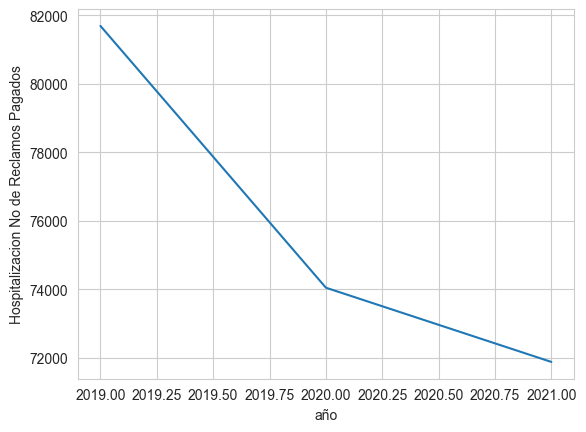

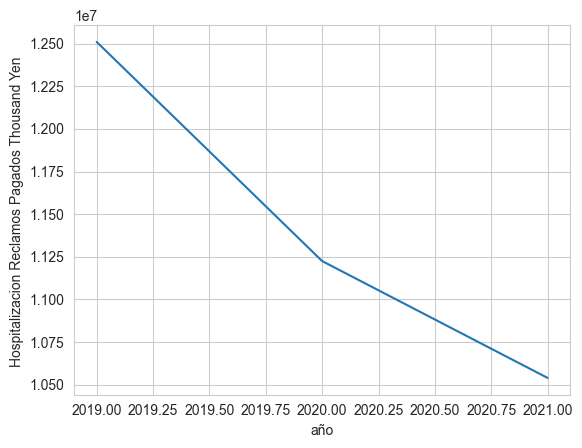

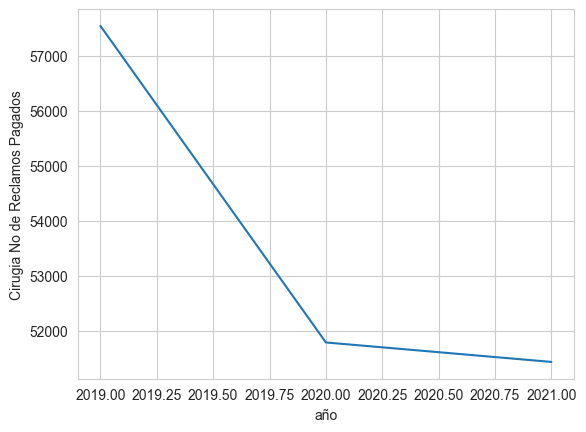

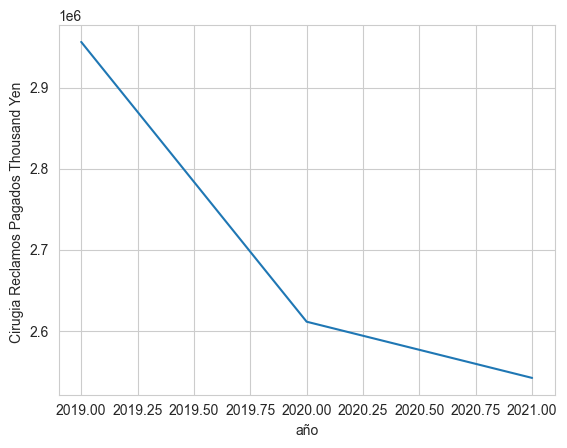

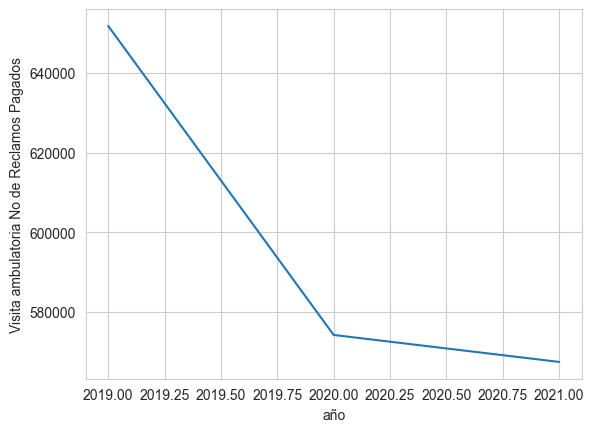

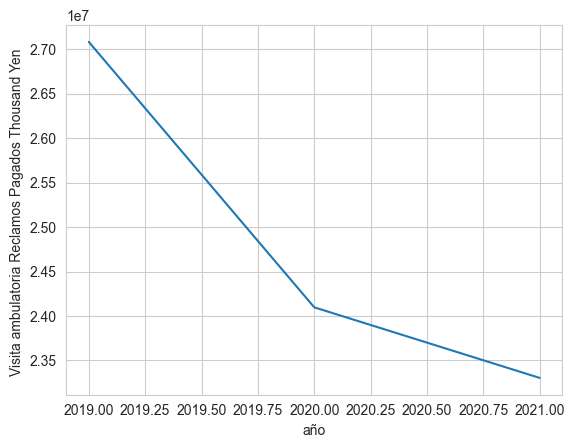

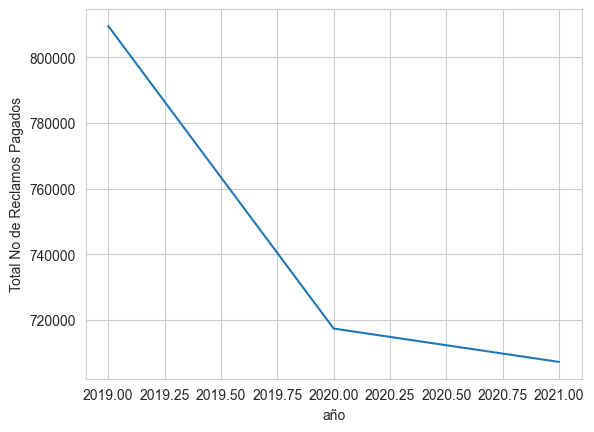

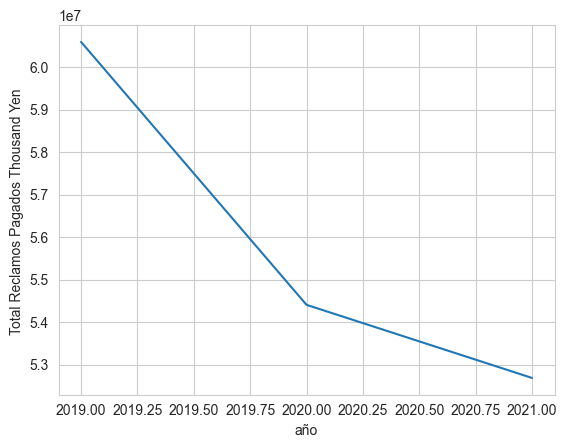

In [642]:
# Podemos observar que hubo un aumento en los reclamos por muerte en el ultimo año y en el resto hubo fue un frenado
# en la tendencia bajista

data_plot = df_kpi4_reclamos_tipo_familiar[[ 'No de Reclamos Pagados por Muerte',
       'Reclamos pagados Por Muerte Thousand Yen ',
       'Incapacidad Permanente No de Reclamos Pagados',
       'Incapacidad Permanente Reclamos Pagados Thousand Yen ',
       'Hospitalizacion No de Reclamos Pagados',
       'Hospitalizacion Reclamos Pagados Thousand Yen ',
       'Cirugia No de Reclamos Pagados',
       'Cirugia Reclamos Pagados Thousand Yen ',
       'Visita ambulatoria No de Reclamos Pagados',
       'Visita ambulatoria Reclamos Pagados Thousand Yen ',
       'Total No de Reclamos Pagados', 'Total Reclamos Pagados Thousand Yen ',
       'año']].groupby('año',as_index=False).agg(sum)

# Graficamos para cada columna con respecto al año
for i in data_plot.columns:
    fig, ax = plt.subplots()
    ax.set_xlabel('año')
    ax.set_ylabel(i)
    ax.plot(data_plot['año'],data_plot[i])
data_plot

# KPI 5 Reducir la pérdida de producto interno bruto frente a eventos sísmicos
Reducir en un 50% la pérdida de PIB en los próximos 35 años.

Tomando en cuenta las medidas preventivas contra la inflación y programas gubernamentales para manejar adecuadamente este tipo de eventos sísmicos, además, de fondos preparados que sirvan como fondo de emergencias para este tipo de eventos

Objetivo: reducir la pérdida de PIB Indicador: 50% Plazo: 35 años Meta: reducir 50% de las pérdidas del PIB en 35 años Monitoreo: con las bases de datos por país, se analiza y se comparan los datos en los próximos 35 años. Relevante: porque está alineado con el objetivo 2 de Implementar mecanismos de comunicación y alerta a la comunidad civil por que en la medida que se apliquen las acciones preventivas el daño en edificios será menor y se podrá reactivar la economía más rápidamente pues habría avisos previos que afectan las medidas de seguridad y no quedar tan afectados económicamente.

In [643]:
# KPI 5 Reducir la pérdida de producto interno bruto frente a eventos sísmicos
# Ingestamos el archivo json (GDP (1960 - 2021).json)
df_gdp = pd.read_json("Datasets/KPI 5/GDP (1960 - 2021).json")

# Observamos
df_gdp.sample(3)

idCountry code  year  gdp(current US$)
7            3  MEX  1962      1.520000e+10
43           3  MEX  1974      7.200000e+10
129          2  JPN  2003      4.519562e+12

In [644]:
# Observamos más en detalle
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idCountry         186 non-null    int64  
 1   code              186 non-null    object 
 2   year              186 non-null    int64  
 3   gdp(current US$)  186 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.3+ KB


In [645]:
# Observamos el comportamiento de las variables numéricas
df_gdp.describe

<bound method NDFrame.describe of      idCountry code  year  gdp(current US$)
0            2  JPN  1960      4.430734e+10
1            3  MEX  1960      1.304000e+10
2            1  USA  1960      5.433000e+11
3            2  JPN  1961      5.350862e+10
4            3  MEX  1961      1.416000e+10
..         ...  ...   ...               ...
181          3  MEX  2020      1.090515e+12
182          1  USA  2020      2.106047e+13
183          2  JPN  2021      4.940878e+12
184          3  MEX  2021      1.272839e+12
185          1  USA  2021      2.331508e+13

[186 rows x 4 columns]>

In [646]:
#las variables estan con el tipo de dato adecuado y no hay nulos, es apropiado para trabajar

<AxesSubplot: >

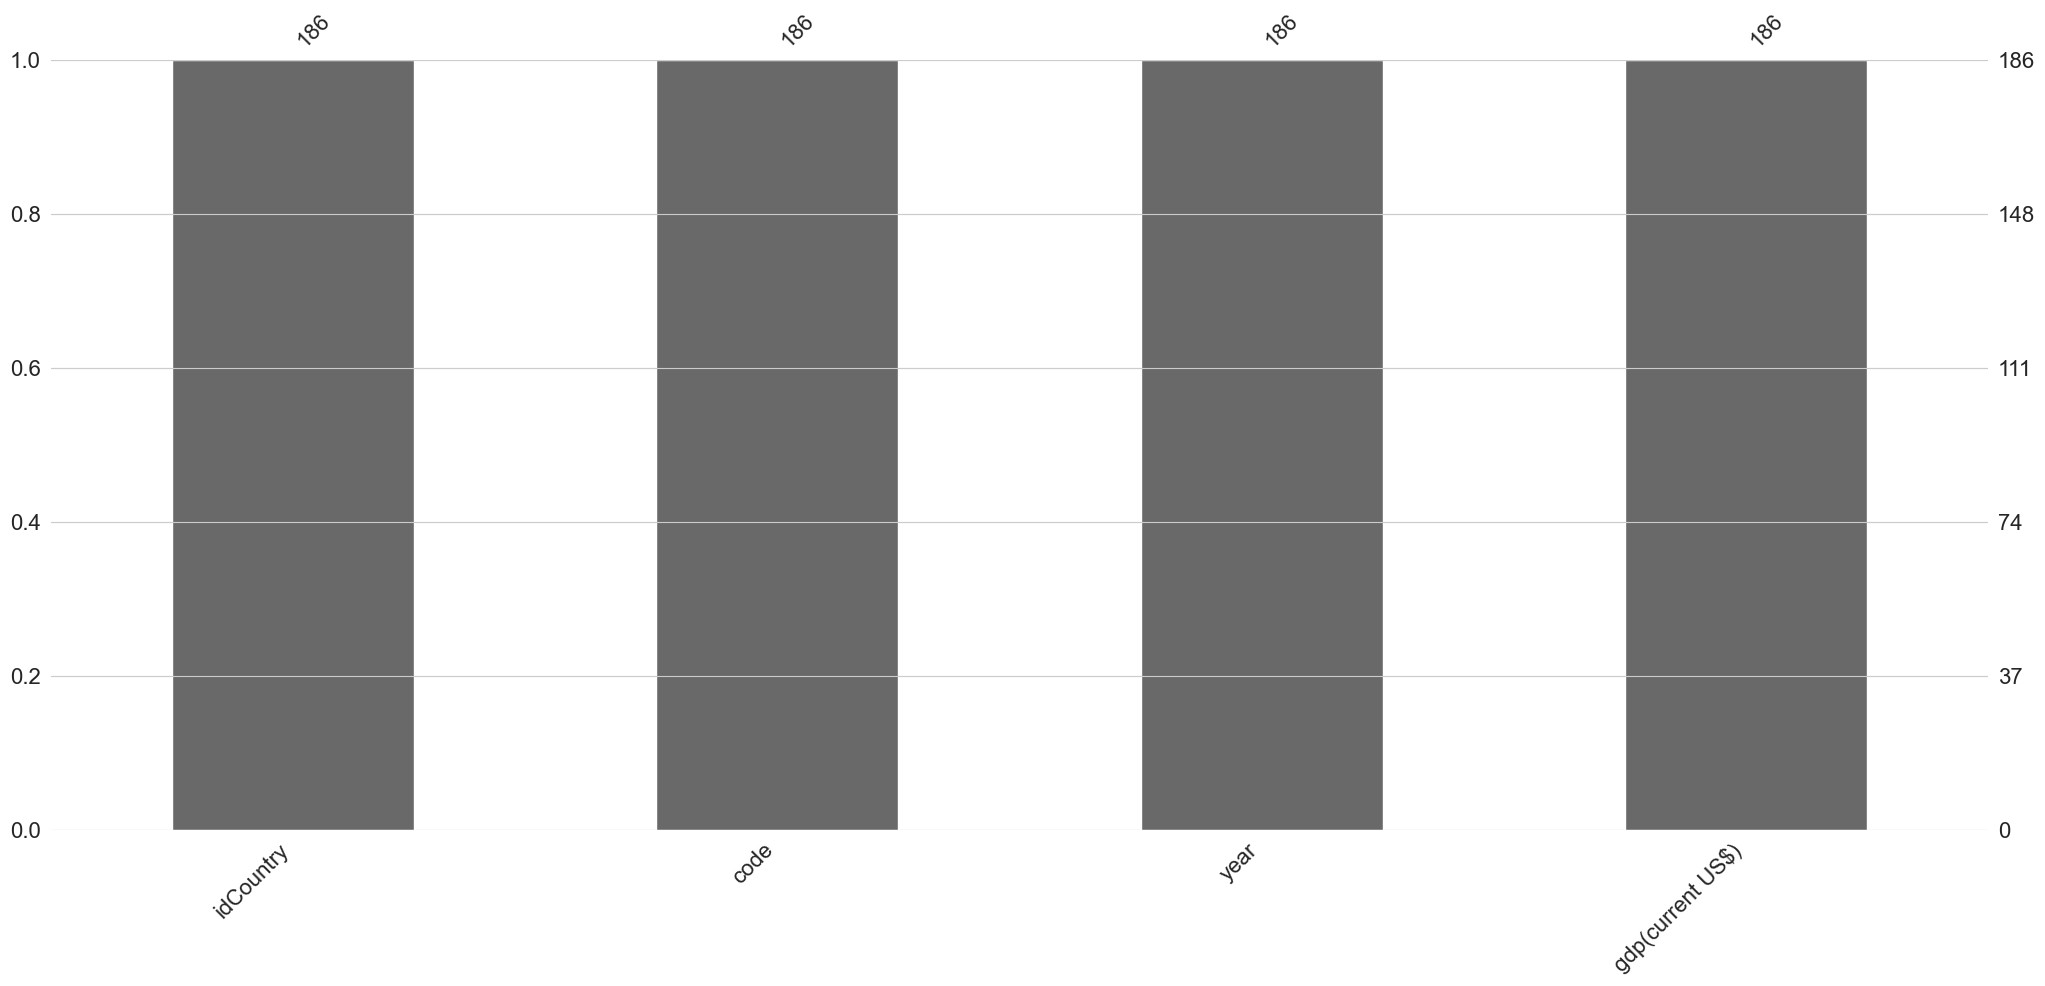

In [647]:
# Observemos los valores faltantes por columna
msno.bar(df_gdp)

In [648]:
# la información esta completa en todas las columnas
# Observamos si hay valores duplicados
df_gdp.duplicated().sum()

0

In [649]:
# no hay valores duplicados
# Observamos el pais con mas registros 
df_gdp["code"].value_counts().sort_values(ascending=False).head()

JPN    62
MEX    62
USA    62
Name: code, dtype: int64

In [650]:
#Todos los paises poseen la misma cantidad de registros

# Observamos el porcentaje de PIB en base al total (0 es negativo, 1 positivo)
df_gdp["gdp(current US$)"].value_counts(normalize=True) * 100

4.430734e+10    0.537634
7.721064e+11    0.537634
6.002329e+11    0.537634
9.631174e+12    0.537634
4.968359e+12    0.537634
                  ...   
2.639593e+11    0.537634
3.207041e+12    0.537634
1.134518e+12    0.537634
1.846092e+11    0.537634
2.331508e+13    0.537634
Name: gdp(current US$), Length: 186, dtype: float64

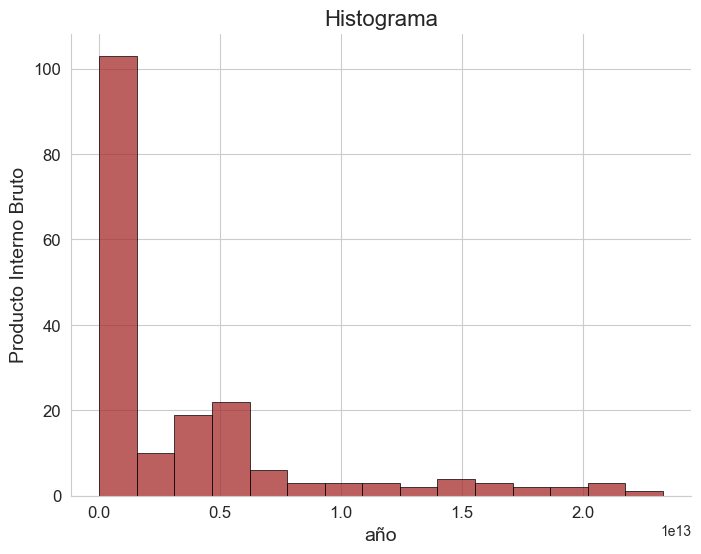

In [651]:
# Histograma del PIB (GDP)
plt.figure(figsize=(8,6))
sns.histplot(df_gdp["gdp(current US$)"] ,bins=15, edgecolor='black', linewidth=0.5, color = "brown")
plt.title("Histograma", fontsize=16)
plt.xlabel("año", fontsize=14)
plt.ylabel("Producto Interno Bruto", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

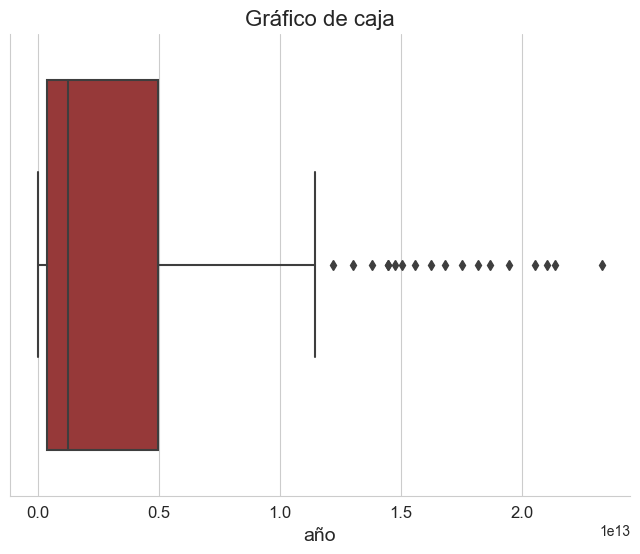

In [652]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_gdp["gdp(current US$)"], color="brown")
plt.title("Gráfico de caja", fontsize=16)
plt.xlabel("año", fontsize=14)
plt.xticks(fontsize=12)

sns.despine()
plt.show()

In [653]:
# Se observan muchos valores atipicos, pero es normal pues no se espera que los valores de PIB sea estable ( la economia es variable)

<AxesSubplot: xlabel='idCountry', ylabel='gdp(current US$)'>

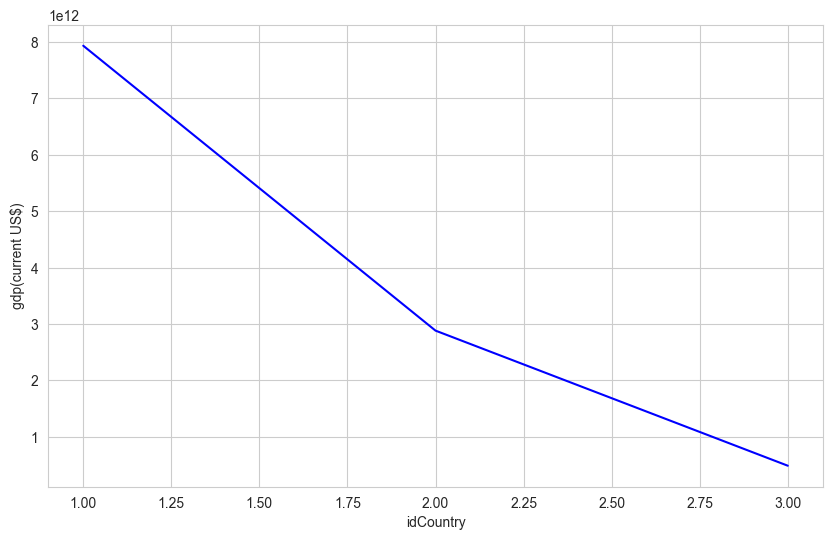

In [654]:
# Agrupamos los datos por año y calculamos la media de las magnitudes
df_grouped5 = df_gdp.groupby('idCountry')['gdp(current US$)'].mean()

# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped5, color='blue')

# se observa la diferencia de Estados Unidos idCountry=1 muy alto con respecto a Japon (idCountry=2) y mucho mas con Mexico(idCountry=3) en el cual este ultimo es muy bajo

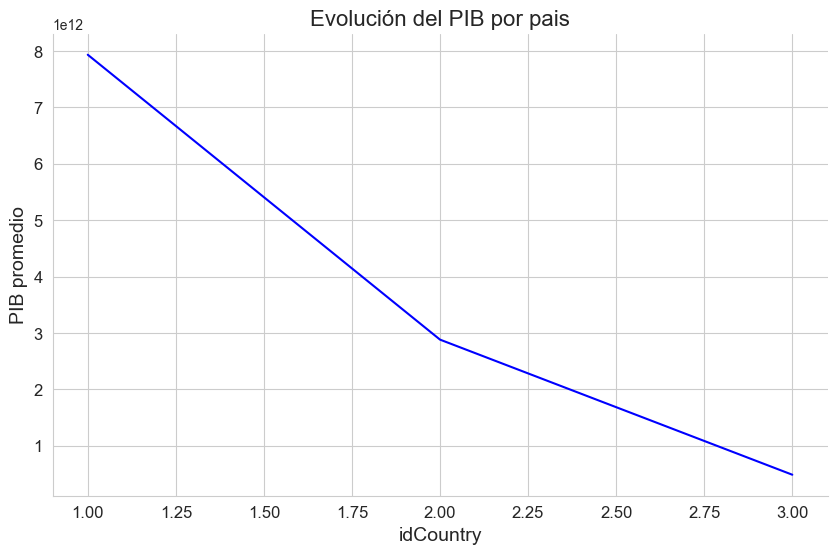

In [655]:
# Creamos el gráfico de líneas utilizando Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped5, color='blue')
plt.xlabel('idCountry', fontsize=14)
plt.ylabel('PIB promedio', fontsize=14)
plt.title('Evolución del PIB por pais', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()